In [1]:
# Master File for Offline Studies on Muon System LLP Decays (sans clustering)

# Coders: Nathan Suri, Caltech; Cristian Pena, Caltech/Fermilab
# Date: July 2019
# LPC LLP Group

# Description
# Meant for testing WH

# Action Plan
#

# Notes/Conclusions
# @nasurijr: Barrel acceptance (theoretical rationale, data supports acceptance trend)

In [2]:
# User specifics
# Setups pwd location for data files and imports of special ROOT utilities

work_location = input("Username: ")
if work_location == 'nasurijr':
    pwd = '/nfshome/nasurijr/LLP_analysis/delayed_jet_analyzer/'
    
    # Sets display width
    from IPython.core.display import display, HTML
    display(HTML("<style>.container { width:85% !important; }</style>"))
    
# elif work_location == '<Insert Tier2 username here>':
#     pwd = '/home/cms/delayed_jet_analyzer/'

Username: nasurijr


# Imports

In [3]:
# Imports necessary utilities and modules

import ROOT as rt
import root_numpy as rtnp
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial.distance import cdist
from collections import Counter 
import datetime
import pytz

# Graph/histo utilities from ROOT
# Contained within the delayed_jet_analyzer repository
import sys
sys.path.append(pwd+'lib')
from histo_utilities import create_TH1D, create_TH2D, create_TGraph, std_color_list

# Used for extracting the TTree structure from each datafile
import os
import uproot

# Used for creating user-readable tables
from prettytable import PrettyTable

# Imports jet clustering algorithm (FastJet)
from pyjet import cluster

donotdelete = []

Welcome to JupyROOT 6.18/00


# Read in and Extract TTrees from Datafiles

In [4]:
# Setups dictionaries for storing data from MC/data ntuples
fpath = {}
tree = {}
NEvents = {}

data_path = pwd+'data/'

# Background Samples

# ggH-comparable background: QCD
fpath['qcd'] = data_path +'jet_timing_studies_ntuple_RunIIFall17DRPremix_QCD_Pt_170to300_TuneCP5_13TeV_pythia8_1.root'

# Currently not needed for the analysis
# # Small subset of B samples for quick runs/tests
# fpath['zeroBias'] = data_path + 'jet_timing_studies_ZeroBias_Run2018B_112_dec.root'
# # # Complete set of A and B ZeroBias samples (time-intensive to run)
# fpath['zeroBias'] = data_path + 'jet_timing_studies_ZeroBias_Run2018AB_complete.root'

# WH-comparable background: WJetsToLNu
# # Small subset of WJetstoLNu (run interactively on jet_timing_studies)
# fpath['WJetsToLNu'] = data_path + 'jet_timing_studies_ntuple_RunIIFall17DRPremix_WJetsToLNu_TuneCP5_13TeV_setQ5_1.root'

# # Complete set run via CRAB on llp_ntupler
fpath['WJetsToLNu'] = data_path + 'WJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8.root'

# # Small subset of WJetstoLNu (run interactively on jet_timing_studies)
# fpath['WJetsToLNu'] = data_path + 'jet_timing_studies_ntuple_WJetsToLNu_inclusive_punch_test.root'


################################################################

# Signal Samples

# WH: bbbb
# mH = 125 GeV, mX = 15 GeV, ctau = 10 m
fpath['m15ct10000mm'] = data_path + 'WminusH_HToSSTobbbb_WToLNu_MH-125_MS-15_ctauS-10000_TuneCUETP8M1_13TeV.root'

# mH = 125 GeV, mX = 40 GeV, ctau = 10 m
fpath['m40ct10000mm'] = data_path + 'WminusH_HToSSTobbbb_WToLNu_MH-125_MS-40_ctauS-10000_TuneCUETP8M1_13TeV.root'

# mH = 125 GeV, mX = 55 GeV, ctau = 10 m, Wminus
fpath['m55ct10000mm_minus'] = data_path + 'WminusH_HToSSTobbbb_WToLNu_MH-125_MS-55_ctauS-10000_TuneCUETP8M1_13TeV.root'
# fpath['m55ct10000mm_minus'] = data_path + 'jet_timing_studies_ntuple_WMinus_mX55ct10m_jetMatch_test.root'

# mH = 125 GeV, mX = 55 GeV, ctau = 10 m, Wplus
fpath['m55ct10000mm_plus'] = data_path + 'WplusH_HToSSTobbbb_WToLNu_MH-125_MS-55_ctauS-10000_TuneCUETP8M1_13TeV.root'
# fpath['m55ct10000mm_plus'] = data_path + 'jet_timing_studies_ntuple_Wplus_mX55ct10m_jetMatch_test.root'


# # WH: MET+bb
# # mH = 125 GeV, mX = 50 GeV, ctau = 1 m
# fpath['m50ct1000mm'] = data_path + 'ntuple_RunIISummer16_bbmet_vh_mh125_mx50_pl1000.root'

# # mH = 125 GeV, mX = 50 GeV, ctau = 10 m
# fpath['m50ct10000mm'] = data_path+'ntuple_RunIISummer16_bbmet_vh_mh125_mx50_pl10000.root'

# # mH = 2000 GeV, mX = 975 GeV, ctau = 1 m
# fpath['m975ct1000mm'] = data_path+'ntuple_RunIISummer16_bbmet_vh_mh2000_mx975_pl1000.root'

# # mH = 2000 GeV, mX = 975 GeV, ctau = 10 m
# fpath['m975ct10000mm'] = data_path+'ntuple_RunIISummer16_bbmet_vh_mh2000_mx975_pl10000.root'

# ggH
# # mH = 125 GeV, mX = 50 GeV, ctau = 1 m
# fpath['m50ct1000mm'] = data_path+'jet_timing_studies_ntuple_metbb_ggh_ISR_mh125_mx50_pl1000_ev100000.root'

# # mH = 125 GeV, mX = 50 GeV, ctau = 10 m
# fpath['m50ct10000mm'] = data_path+'jet_timing_studies_ntuple_metbb_ggh_ISR_mh125_mx50_pl10000_ev100000.root'

# # mH = 2000 GeV, mX = 975 GeV, ctau = 1 m
# fpath['m975ct1000mm'] = data_path+'jet_timing_studies_ntuple_metbb_ggh_ISR_mh2000_mx975_pl1000_ev100000.root'

# # mH = 2000 GeV, mX = 975 GeV, ctau = 10 m
# fpath['m975ct10000mm'] = data_path+'jet_timing_studies_ntuple_metbb_ggh_ISR_mh2000_mx975_pl10000_ev100000.root'

# Iterates through each file and extracts the ROOT TTree structure from each
for k,v in fpath.items():
    print(str(datetime.datetime.now(pytz.timezone('US/Pacific'))))
    print(k, v)
    root_dir = uproot.open(v) 
    tree[k] = root_dir['ntuples']['llp']
    NEvents[k] = root_dir['ntuples']['NEvents'][1]
    # Accesses the array form of the jetPt branch
#     a = tree[k]["jetPt"].array()
#     print(a[:-1][0])

2019-08-16 15:31:42.115784-07:00
qcd /nfshome/nasurijr/LLP_analysis/delayed_jet_analyzer/data/jet_timing_studies_ntuple_RunIIFall17DRPremix_QCD_Pt_170to300_TuneCP5_13TeV_pythia8_1.root
2019-08-16 15:31:42.270860-07:00
WJetsToLNu /nfshome/nasurijr/LLP_analysis/delayed_jet_analyzer/data/WJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8.root
2019-08-16 15:31:45.276612-07:00
m15ct10000mm /nfshome/nasurijr/LLP_analysis/delayed_jet_analyzer/data/WminusH_HToSSTobbbb_WToLNu_MH-125_MS-15_ctauS-10000_TuneCUETP8M1_13TeV.root
2019-08-16 15:31:45.495351-07:00
m40ct10000mm /nfshome/nasurijr/LLP_analysis/delayed_jet_analyzer/data/WminusH_HToSSTobbbb_WToLNu_MH-125_MS-40_ctauS-10000_TuneCUETP8M1_13TeV.root
2019-08-16 15:31:45.688988-07:00
m55ct10000mm_minus /nfshome/nasurijr/LLP_analysis/delayed_jet_analyzer/data/WminusH_HToSSTobbbb_WToLNu_MH-125_MS-55_ctauS-10000_TuneCUETP8M1_13TeV.root
2019-08-16 15:31:45.898121-07:00
m55ct10000mm_plus /nfshome/nasurijr/LLP_analysis/delayed_jet_analyzer/data/WplusH_

## Name TTree Objects

In [5]:
# Bookkeeping: Defines the TTrees from the read datafiles
# Names displayed in README.md table

# T_m15_ct10 = tree['m15ct10000mm']
T_wjets = tree['WJetsToLNu']
# T_minBias = tree['zeroBias']
# T_m40_ct10 = tree['m40ct10000mm']
T_m55_ct10_minus = tree['m55ct10000mm_minus']
T_m55_ct10_plus = tree['m55ct10000mm_plus']

# T_wh = tree['wh_m50ct1000mm']
# T_bkg = tree['WJetsToLNu']

## Jet Pt Calculations

In [7]:
#get first jet pt per event
first_jet_pt = [x[0] if len(x) else -1 for x in T_m55_ct10_minus['jetPt'].array()]

#get max jet pt per event
max_jet_pt = [np.max(np.abs(x)) if len(x) else -1 for x in T_m55_ct10_minus['gLLP_decay_vertex_z'].array()]

#store jet-pt array per event in a list
first_jet_pt_arr = []
for x in T_m55_ct10_minus['jetPt'].array():
    if len(x) == 0:
        break
    first_jet_pt_arr.append(x[0])

# Define Variables and Name Datafiles 

In [8]:
# Variable Definitions
# Creates dictionaries for variables to be analyzed
# The dictionaries will contain the variable arrays for each datafile with a relevant key

# Boolean selections
sel_bool = {}

# CSC
nCsc = {}
csc_z = {}
csc_x = {}
csc_y = {}
csc_eta = {}
csc_phi = {}
csc_t = {}

# Gen Level
# gLLP_eta = {}
gLLP_r_0 = {}
gLLP_r_1 = {}
gLLP_decay_0 = {}
gLLP_decay_1 = {}

# Reco level
met_pt = {}
eventNum = {}
lumiNum = {}
jet_pt = {}
ele_pt = {}
mu_pt = {}
nJets = {}
nElectrons = {}
nMuons = {}
nCaloJets = {}
nFatJets = {}
nRechits_flag = {}

# Reco - jets
jetEta = {}
jetPhi = {}

In [9]:
# Bookkeeping: Creates a dictionary for iterating over all of the datafiles and 
#              converting the relevant branches to numpy arrays
# Names displayed in README.md table

# data_trees = {'m50ct1m': T, 'qcd': T_bkg, 'zeroBias':T_minBias, 'm50ct10m': T_low_ctau10, 'm975ct1m': T_high_ctau1, 'm975ct10m': T_high_ctau10, 'wh_m50ct1m': T_wh, 'WJetsToLNu': T_w_bkg}
# data_trees = {'m15ct10m_wh_bbbb': T_m15_ct10, 'm40ct10m_wh_bbbb': T_m40_ct10, 'm55ct10m_wh_bbbb_minus': T_m55_ct10_minus, 'm55ct10m_wh_bbbb_plus': T_m55_ct10_plus, 'WJetsToLNu': T_wjets}
data_trees = {'m55ct10m_wh_bbbb_minus': T_m55_ct10_minus, 'm55ct10m_wh_bbbb_plus': T_m55_ct10_plus, 'WJetsToLNu': T_wjets}

# Event Selection

In [10]:
# print(T_bkg['nCsc'].array())

# # for ev in range(len(T_wh['nCsc'].array())):
# gParticleMotherId = T_wh['gParticleMotherId'].array()
# gParticleId = T_wh['gParticleId'].array()
# gParticleStatus = T_wh['gParticleStatus'].array()
# # print(gParticleId)
# counter = 0
# # print(np.logical_and(np.logical_and(np.absolute(gParticleId) == 13, np.absolute(gParticleMotherId) == 24)))
# ele_sel = np.logical_and(np.logical_and(np.absolute(gParticleId) == 13, np.absolute(gParticleMotherId) == 24), gParticleStatus == 1 )
# mu_sel = np.logical_and(np.logical_and(np.absolute(gParticleId) == 11, np.absolute(gParticleMotherId) == 24), gParticleStatus == 1 )
# for ev in np.logical_or(ele_sel, mu_sel):
#     if ev.any():
#         counter +=1
# print(counter)
# print(len(gParticleId))
# print(np.logical_and(np.logical_and(np.absolute(gParticleId) == 13, np.absolute(gParticleMotherId) == 24), gParticleStatus == 1 ))

## TBranch -> np.array() Conversion

In [12]:
# Event Selection

print('Start: ' + str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

for species, arbor in data_trees.items():
    if 'wh' in species:
        ele_sel = np.logical_and(np.logical_and(np.absolute(arbor['gParticleId'].array()) == 11, np.absolute(arbor['gParticleMotherId'].array()) == 24), arbor['gParticleStatus'].array() == 1)
        mu_sel = np.logical_and(np.logical_and(np.absolute(arbor['gParticleId'].array()) == 13, np.absolute(arbor['gParticleMotherId'].array()) == 24), arbor['gParticleStatus'].array() == 1)
        sel_lepton = []
        time_counter = 0
#         for ev in np.logical_or(ele_sel, mu_sel):
        for ev in ele_sel:
            time_counter += 1
            if (time_counter % 100000) == 0:
                print(str(time_counter) + ': '+  str(datetime.datetime.now(pytz.timezone('US/Pacific'))))
            if ev.any():
                sel_lepton.append(True)
            else:
                sel_lepton.append(False)
                
    if 'wh' not in species:
        sel_lepton = np.ones(len(arbor), dtype=bool)
                
    if 'metbb' in species or 'bbmet' in species:
        gLLP_r_0[species] = np.sqrt((arbor['gLLP_decay_vertex_x'].array()[:,0])**2+(arbor['gLLP_decay_vertex_y'].array()[:,0])**2)
        gLLP_decay_0[species] = np.sqrt((arbor['gLLP_decay_vertex_x'].array()[:,0])**2+(arbor['gLLP_decay_vertex_y'].array()[:,0])**2 + (arbor['gLLP_decay_vertex_z'].array()[:,0])**2)

        sel_dis_0 = np.logical_and(np.absolute(arbor['gLLP_decay_vertex_z'].array()[:,0]) > 568 , np.absolute(arbor['gLLP_decay_vertex_z'].array()[:,0]) < 1100)
#         sel_dis_0 = np.logical_and(sel_dis_0, np.absolute(arbor['gLLP_eta'].array()[:,0])<2.4)
#         sel_dis_0 = np.logical_and(sel_dis_0, np.absolute(arbor['gLLP_eta'].array()[:,0])>0.9)
        sel_dis_0 = np.logical_and(sel_dis_0, np.absolute(gLLP_r_0[species])<695.5)
        sel_dis_0 = np.logical_and(sel_dis_0, np.absolute(gLLP_r_0[species])>100)
        
        sel_signal = np.logical_and(sel_dis_1, sel_lepton)
        sel_bool[species] = sel_signal 
        
    if 'bbbb' in species:
        gLLP_r_0[species] = np.sqrt((arbor['gLLP_decay_vertex_x'].array()[:,0])**2+(arbor['gLLP_decay_vertex_y'].array()[:,0])**2)
        gLLP_r_1[species] = np.sqrt((arbor['gLLP_decay_vertex_x'].array()[:,1])**2+(arbor['gLLP_decay_vertex_y'].array()[:,1])**2)

        
        sel_dis_0 = np.logical_and(np.absolute(arbor['gLLP_decay_vertex_z'].array()[:,0]) > 568 , np.absolute(arbor['gLLP_decay_vertex_z'].array()[:,0]) < 1100)
#         sel_dis_0 = np.logical_and(sel_dis_0, np.absolute(arbor['gLLP_eta'].array()[:,0])<2.4)
#         sel_dis_0 = np.logical_and(sel_dis_0, np.absolute(arbor['gLLP_eta'].array()[:,0])>0.9)
        sel_dis_0 = np.logical_and(sel_dis_0, np.absolute(gLLP_r_0[species])<695.5)
        sel_dis_0 = np.logical_and(sel_dis_0, np.absolute(gLLP_r_0[species])>100)
        
        sel_dis_1 = np.logical_and(np.absolute(arbor['gLLP_decay_vertex_z'].array()[:,1]) > 568 , np.absolute(arbor['gLLP_decay_vertex_z'].array()[:,1]) < 1100)
#         sel_dis_1 = np.logical_and(sel_dis_1, np.absolute(arbor['gLLP_eta'].array()[:,1])<2.4)
#         sel_dis_1 = np.logical_and(sel_dis_1, np.absolute(arbor['gLLP_eta'].array()[:,1])>0.9)
        sel_dis_1 = np.logical_and(sel_dis_1, np.absolute(gLLP_r_1[species])<695.5)
        sel_dis_1 = np.logical_and(sel_dis_1, np.absolute(gLLP_r_1[species])>100)
        
        sel_signal = np.logical_or(sel_dis_0, sel_dis_1)
        sel_signal = np.logical_and(sel_signal, sel_lepton)
        sel_bool[species] = sel_signal 
        
    else:
#         sel_bkg = [True if np.any(x > 50) else False for x in arbor['jetPt'].array()]
#         sel_bkg = np.logical_and(sel_bkg, sel_lepton)
#         sel_bool[species] = sel_bkg
        sel_bool[species] = np.ones(len(arbor['nCsc'].array()), dtype=bool)
        
    print(species + ': ' +str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

Start: 2019-08-16 15:34:16.703286-07:00
m55ct10m_wh_bbbb_minus: 2019-08-16 15:34:17.414194-07:00
m55ct10m_wh_bbbb_plus: 2019-08-16 15:34:18.137229-07:00
WJetsToLNu: 2019-08-16 15:34:52.010137-07:00


In [15]:
# Application of event selection to variables

print('Start: ' + str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

for species, arbor in data_trees.items():
    # Endcap: CSCs
    nCsc[species] = arbor['nCsc'].array()[sel_bool[species]]
    csc_z[species] = arbor['cscZ'].array()[sel_bool[species]]
    csc_x[species] = arbor['cscX'].array()[sel_bool[species]]
    csc_y[species] = arbor['cscY'].array()[sel_bool[species]]
    csc_t[species] = arbor['cscT'].array()[sel_bool[species]]
    csc_eta[species] = arbor['cscEta'].array()[sel_bool[species]]
    csc_phi[species] = arbor['cscPhi'].array()[sel_bool[species]]

    # Reco-level
    eventNum[species] = arbor['eventNum'].array()[sel_bool[species]]
    lumiNum[species] = arbor['lumiNum'].array()[sel_bool[species]]
#     met_pt[species] = arbor['pfMetPt'].array()[sel_bool[species]]
    
    jet_pt[species] = arbor['jetPt'].array()[sel_bool[species]]
#     ele_pt[species] = arbor['elePt'].array()[sel_bool[species]]
#     mu_pt[species] = arbor['muonPt'].array()[sel_bool[species]]
    nJets[species] = arbor['nJets'].array()[sel_bool[species]]
#     nElectrons[species] = arbor['nElectrons'].array()[sel_bool[species]]
#     nMuons[species] = arbor['nMuons'].array()[sel_bool[species]]
    
#     nCaloJets[species] = arbor['nCaloJets'].array()[sel_bool[species]]
#     nFatJets[species] = arbor['nFatJets'].array()[sel_bool[species]]
#     nRechits_flag[species] = (arbor['cscNRecHits_flag'].array())[sel_bool[species]]
    
    
    jetEta[species] = arbor['jetEta'].array()[sel_bool[species]]
    jetPhi[species] = arbor['jetPhi'].array()[sel_bool[species]]
    
    print(species + ': ' +str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

Start: 2019-08-16 15:37:30.290475-07:00
m55ct10m_wh_bbbb_minus: 2019-08-16 15:37:30.430392-07:00
m55ct10m_wh_bbbb_plus: 2019-08-16 15:37:30.575138-07:00
WJetsToLNu: 2019-08-16 15:41:26.772284-07:00


In [16]:
# Extracted variables
lead_jet_pt = {}
max_jet_pt = {}
avg_jet_pt = {}

# lead_mu_pt = {}
# max_mu_pt = {}
# avg_mu_pt = {}

# lead_ele_pt = {}
# max_ele_pt = {}
# avg_ele_pt = {}

for species in data_trees.keys():
    lead_jet_pt[species] = [x[0] if len(x) else -1 for x in jet_pt[species]]
    max_jet_pt[species] = [np.max(np.abs(x)) if len(x) else -1 for x in jet_pt[species]]
    avg_jet_pt[species] = [np.mean(np.abs(x)) if len(x) else -1 for x in jet_pt[species]]
    
#     lead_mu_pt[species] = [x[0] if len(x) else -1 for x in mu_pt[species]]
#     max_mu_pt[species] = [np.max(np.abs(x)) if len(x) else -1 for x in mu_pt[species]]
#     avg_mu_pt[species] = [np.mean(np.abs(x)) if len(x) else -1 for x in mu_pt[species]]
    
#     lead_ele_pt[species] = [x[0] if len(x) else -1 for x in ele_pt[species]]
#     max_ele_pt[species] = [np.max(np.abs(x)) if len(x) else -1 for x in ele_pt[species]]
#     avg_ele_pt[species] = [np.mean(np.abs(x)) if len(x) else -1 for x in ele_pt[species]]
    
    print(species + ': ' +str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

m55ct10m_wh_bbbb_minus: 2019-08-16 15:41:26.819913-07:00
m55ct10m_wh_bbbb_plus: 2019-08-16 15:41:26.849148-07:00
WJetsToLNu: 2019-08-16 15:45:38.424816-07:00


In [17]:
# Endcap: CSCs
nCsc['m55ct10m_wh_bbbb'] = np.concatenate([nCsc['m55ct10m_wh_bbbb_minus'], nCsc['m55ct10m_wh_bbbb_plus']])
csc_z['m55ct10m_wh_bbbb'] = np.concatenate([csc_z['m55ct10m_wh_bbbb_minus'], csc_z['m55ct10m_wh_bbbb_plus']])
csc_x['m55ct10m_wh_bbbb'] = np.concatenate([csc_x['m55ct10m_wh_bbbb_minus'], csc_x['m55ct10m_wh_bbbb_plus']])
csc_y['m55ct10m_wh_bbbb'] = np.concatenate([csc_y['m55ct10m_wh_bbbb_minus'], csc_y['m55ct10m_wh_bbbb_plus']])
csc_t['m55ct10m_wh_bbbb'] = np.concatenate([csc_t['m55ct10m_wh_bbbb_minus'], csc_t['m55ct10m_wh_bbbb_plus']])
csc_eta['m55ct10m_wh_bbbb'] = np.concatenate([csc_eta['m55ct10m_wh_bbbb_minus'], csc_eta['m55ct10m_wh_bbbb_plus']])
csc_phi['m55ct10m_wh_bbbb'] = np.concatenate([csc_phi['m55ct10m_wh_bbbb_minus'], csc_phi['m55ct10m_wh_bbbb_plus']])

# Reco-level
eventNum['m55ct10m_wh_bbbb'] = np.concatenate([eventNum['m55ct10m_wh_bbbb_minus'], eventNum['m55ct10m_wh_bbbb_plus']])
lumiNum['m55ct10m_wh_bbbb'] = np.concatenate([lumiNum['m55ct10m_wh_bbbb_minus'], lumiNum['m55ct10m_wh_bbbb_plus']])
# met_pt['m55ct10m_wh_bbbb'] = np.concatenate([met_pt['m55ct10m_wh_bbbb_minus'], met_pt['m55ct10m_wh_bbbb_plus']])

jet_pt['m55ct10m_wh_bbbb'] = np.concatenate([jet_pt['m55ct10m_wh_bbbb_minus'], jet_pt['m55ct10m_wh_bbbb_plus']])
# ele_pt['m55ct10m_wh_bbbb'] = np.concatenate([ele_pt['m55ct10m_wh_bbbb_minus'], ele_pt['m55ct10m_wh_bbbb_plus']])
# mu_pt['m55ct10m_wh_bbbb'] = np.concatenate([mu_pt['m55ct10m_wh_bbbb_minus'], mu_pt['m55ct10m_wh_bbbb_plus']])
nJets['m55ct10m_wh_bbbb'] = np.concatenate([nJets['m55ct10m_wh_bbbb_minus'], nJets['m55ct10m_wh_bbbb_plus']])
# nElectrons['m55ct10m_wh_bbbb'] = np.concatenate([nElectrons['m55ct10m_wh_bbbb_minus'], nElectrons['m55ct10m_wh_bbbb_plus']])
# nMuons['m55ct10m_wh_bbbb'] = np.concatenate([nMuons['m55ct10m_wh_bbbb_minus'], nMuons['m55ct10m_wh_bbbb_plus']])

jetEta['m55ct10m_wh_bbbb'] = np.concatenate([jetEta['m55ct10m_wh_bbbb_minus'], jetEta['m55ct10m_wh_bbbb_plus']])
jetPhi['m55ct10m_wh_bbbb'] = np.concatenate([jetPhi['m55ct10m_wh_bbbb_minus'], jetPhi['m55ct10m_wh_bbbb_plus']])
# nRechits_flag['m55ct10m_wh_bbbb'] = np.concatenate([nRechits_flag['m55ct10m_wh_bbbb_minus'], nRechits_flag['m55ct10m_wh_bbbb_plus']])

# Extracted
lead_jet_pt['m55ct10m_wh_bbbb'] = np.concatenate([lead_jet_pt['m55ct10m_wh_bbbb_minus'], lead_jet_pt['m55ct10m_wh_bbbb_plus']])
max_jet_pt['m55ct10m_wh_bbbb'] = np.concatenate([max_jet_pt['m55ct10m_wh_bbbb_minus'], max_jet_pt['m55ct10m_wh_bbbb_plus']])
avg_jet_pt['m55ct10m_wh_bbbb'] = np.concatenate([avg_jet_pt['m55ct10m_wh_bbbb_minus'], avg_jet_pt['m55ct10m_wh_bbbb_plus']])

# lead_mu_pt['m55ct10m_wh_bbbb'] = np.concatenate([lead_mu_pt['m55ct10m_wh_bbbb_minus'], lead_mu_pt['m55ct10m_wh_bbbb_plus']])
# max_mu_pt['m55ct10m_wh_bbbb'] = np.concatenate([max_mu_pt['m55ct10m_wh_bbbb_minus'], max_mu_pt['m55ct10m_wh_bbbb_plus']])
# avg_mu_pt['m55ct10m_wh_bbbb'] = np.concatenate([avg_mu_pt['m55ct10m_wh_bbbb_minus'], avg_mu_pt['m55ct10m_wh_bbbb_plus']])

# lead_ele_pt['m55ct10m_wh_bbbb'] = np.concatenate([lead_ele_pt['m55ct10m_wh_bbbb_minus'], lead_ele_pt['m55ct10m_wh_bbbb_plus']])
# max_ele_pt['m55ct10m_wh_bbbb'] = np.concatenate([max_ele_pt['m55ct10m_wh_bbbb_minus'], max_ele_pt['m55ct10m_wh_bbbb_plus']])
# avg_ele_pt['m55ct10m_wh_bbbb'] = np.concatenate([avg_ele_pt['m55ct10m_wh_bbbb_minus'], avg_ele_pt['m55ct10m_wh_bbbb_plus']])

## Endcap Hit Removal

In [18]:
# Hit Removal
# For both the endcap and barrel regions (overlap to be determined), the closest stations to the beamspot are the noisiest.
# Thus, we remove the hits that land in these stations for each event in each datafile.

# Endcap
nCsc_station = {}
nCsc_removal = {}

# Loops over every datafile
for files in data_trees.keys():
    # Endcap
    nCsc_station[files] = {}
    nCsc_station[files]['ME_11'] = []
    nCsc_station[files]['ME_12'] = []
    nCsc_station[files]['ME_13'] = []
    
    # Loops over every event in each datafile
    for pos_bool in range(len(csc_z[files])):
        csc_r = np.sqrt(csc_x[files][pos_bool]**2+csc_y[files][pos_bool]**2)
        z_pos_bool = csc_z[files][pos_bool]
        
        counter_me11 = 0
        counter_me12 = 0
        counter_me13 = 0
        
        # Loops over every hit in each event
        for z_ind in range(len(z_pos_bool)):
            z_bool = np.absolute(z_pos_bool[z_ind])
            # ME 1/1 Constraints
            if z_bool > 568 and z_bool < 632:
                counter_me11 += 1
                
            if z_bool > 663 and z_bool < 724:
                # ME 1/2 Constraints
                if csc_r[z_ind] < 465 and csc_r[z_ind] > 275:
                    counter_me12 += 1
                # ME 1/3 Constraints
                if csc_r[z_ind] < 695.5 and csc_r[z_ind] > 505.5:
                    counter_me13 += 1
                    
        nCsc_station[files]['ME_11'].append(counter_me11)
        nCsc_station[files]['ME_12'].append(counter_me12)
        nCsc_station[files]['ME_13'].append(counter_me13)
        
        if (pos_bool % 1000) == 0:
            print(str(pos_bool) + ': '+  str(datetime.datetime.now(pytz.timezone('US/Pacific'))))
    
    # nCsc dictionaries containing hits removed labelled by removed stations
    nCsc_removal[files] = {}
    nCsc_removal[files]['ME_11'] = np.array(nCsc[files]) - np.array(nCsc_station[files]['ME_11'])
    nCsc_removal[files]['ME_112'] = np.array(nCsc[files]) - (np.array(nCsc_station[files]['ME_11']) + np.array(nCsc_station[files]['ME_12']))
    nCsc_removal[files]['ME_1123'] = np.array(nCsc[files]) - (np.array(nCsc_station[files]['ME_11']) + np.array(nCsc_station[files]['ME_12']) + np.array(nCsc_station[files]['ME_13']))
    
    print(files + ': ' +str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

0: 2019-08-16 15:45:39.045339-07:00
1000: 2019-08-16 15:45:39.665961-07:00
m55ct10m_wh_bbbb_minus: 2019-08-16 15:45:39.832879-07:00
0: 2019-08-16 15:45:39.833389-07:00
1000: 2019-08-16 15:45:40.474347-07:00
m55ct10m_wh_bbbb_plus: 2019-08-16 15:45:40.609937-07:00
0: 2019-08-16 15:45:40.610107-07:00
1000: 2019-08-16 15:45:40.728882-07:00
2000: 2019-08-16 15:45:40.852187-07:00
3000: 2019-08-16 15:45:40.972237-07:00
4000: 2019-08-16 15:45:41.093260-07:00
5000: 2019-08-16 15:45:41.214752-07:00
6000: 2019-08-16 15:45:41.333948-07:00
7000: 2019-08-16 15:45:41.456973-07:00
8000: 2019-08-16 15:45:41.576302-07:00
9000: 2019-08-16 15:45:41.696313-07:00
10000: 2019-08-16 15:45:41.816374-07:00
11000: 2019-08-16 15:45:41.932986-07:00
12000: 2019-08-16 15:45:42.054665-07:00
13000: 2019-08-16 15:45:42.175476-07:00
14000: 2019-08-16 15:45:42.295022-07:00
15000: 2019-08-16 15:45:42.415733-07:00
16000: 2019-08-16 15:45:42.539669-07:00
17000: 2019-08-16 15:45:42.660327-07:00
18000: 2019-08-16 15:45:42.865

197000: 2019-08-16 15:46:05.832297-07:00
198000: 2019-08-16 15:46:05.954364-07:00
199000: 2019-08-16 15:46:06.072479-07:00
200000: 2019-08-16 15:46:06.194432-07:00
201000: 2019-08-16 15:46:06.317343-07:00
202000: 2019-08-16 15:46:06.437462-07:00
203000: 2019-08-16 15:46:06.559498-07:00
204000: 2019-08-16 15:46:06.680704-07:00
205000: 2019-08-16 15:46:06.802457-07:00
206000: 2019-08-16 15:46:06.924307-07:00
207000: 2019-08-16 15:46:07.045175-07:00
208000: 2019-08-16 15:46:07.165276-07:00
209000: 2019-08-16 15:46:07.287108-07:00
210000: 2019-08-16 15:46:07.411048-07:00
211000: 2019-08-16 15:46:07.529764-07:00
212000: 2019-08-16 15:46:07.647954-07:00
213000: 2019-08-16 15:46:07.772077-07:00
214000: 2019-08-16 15:46:07.892643-07:00
215000: 2019-08-16 15:46:08.011433-07:00
216000: 2019-08-16 15:46:08.135731-07:00
217000: 2019-08-16 15:46:08.259513-07:00
218000: 2019-08-16 15:46:08.381815-07:00
219000: 2019-08-16 15:46:08.505376-07:00
220000: 2019-08-16 15:46:08.628016-07:00
221000: 2019-08-

399000: 2019-08-16 15:46:30.583423-07:00
400000: 2019-08-16 15:46:30.699933-07:00
401000: 2019-08-16 15:46:30.812515-07:00
402000: 2019-08-16 15:46:30.934042-07:00
403000: 2019-08-16 15:46:31.055121-07:00
404000: 2019-08-16 15:46:31.173341-07:00
405000: 2019-08-16 15:46:31.291142-07:00
406000: 2019-08-16 15:46:31.408747-07:00
407000: 2019-08-16 15:46:31.531981-07:00
408000: 2019-08-16 15:46:31.649581-07:00
409000: 2019-08-16 15:46:31.770277-07:00
410000: 2019-08-16 15:46:31.894663-07:00
411000: 2019-08-16 15:46:32.014261-07:00
412000: 2019-08-16 15:46:32.137171-07:00
413000: 2019-08-16 15:46:32.254757-07:00
414000: 2019-08-16 15:46:32.373414-07:00
415000: 2019-08-16 15:46:32.492484-07:00
416000: 2019-08-16 15:46:32.613048-07:00
417000: 2019-08-16 15:46:32.735470-07:00
418000: 2019-08-16 15:46:32.855795-07:00
419000: 2019-08-16 15:46:32.973930-07:00
420000: 2019-08-16 15:46:33.097329-07:00
421000: 2019-08-16 15:46:33.215630-07:00
422000: 2019-08-16 15:46:33.331331-07:00
423000: 2019-08-

599000: 2019-08-16 15:46:54.653583-07:00
600000: 2019-08-16 15:46:54.774270-07:00
601000: 2019-08-16 15:46:54.891884-07:00
602000: 2019-08-16 15:46:55.011147-07:00
603000: 2019-08-16 15:46:55.131519-07:00
604000: 2019-08-16 15:46:55.250435-07:00
605000: 2019-08-16 15:46:55.415493-07:00
606000: 2019-08-16 15:46:55.584284-07:00
607000: 2019-08-16 15:46:55.705655-07:00
608000: 2019-08-16 15:46:55.825468-07:00
609000: 2019-08-16 15:46:55.948210-07:00
610000: 2019-08-16 15:46:56.070489-07:00
611000: 2019-08-16 15:46:56.192044-07:00
612000: 2019-08-16 15:46:56.311442-07:00
613000: 2019-08-16 15:46:56.431995-07:00
614000: 2019-08-16 15:46:56.554029-07:00
615000: 2019-08-16 15:46:56.679628-07:00
616000: 2019-08-16 15:46:56.800196-07:00
617000: 2019-08-16 15:46:56.921716-07:00
618000: 2019-08-16 15:46:57.043211-07:00
619000: 2019-08-16 15:46:57.162629-07:00
620000: 2019-08-16 15:46:57.281090-07:00
621000: 2019-08-16 15:46:57.396766-07:00
622000: 2019-08-16 15:46:57.518232-07:00
623000: 2019-08-

799000: 2019-08-16 15:47:19.086198-07:00
800000: 2019-08-16 15:47:19.204294-07:00
801000: 2019-08-16 15:47:19.323255-07:00
802000: 2019-08-16 15:47:19.438539-07:00
803000: 2019-08-16 15:47:19.558938-07:00
804000: 2019-08-16 15:47:19.678959-07:00
805000: 2019-08-16 15:47:19.797999-07:00
806000: 2019-08-16 15:47:19.920826-07:00
807000: 2019-08-16 15:47:20.043934-07:00
808000: 2019-08-16 15:47:20.173574-07:00
809000: 2019-08-16 15:47:20.295896-07:00
810000: 2019-08-16 15:47:20.416179-07:00
811000: 2019-08-16 15:47:20.535371-07:00
812000: 2019-08-16 15:47:20.655118-07:00
813000: 2019-08-16 15:47:20.779257-07:00
814000: 2019-08-16 15:47:20.900084-07:00
815000: 2019-08-16 15:47:21.018463-07:00
816000: 2019-08-16 15:47:21.138459-07:00
817000: 2019-08-16 15:47:21.265095-07:00
818000: 2019-08-16 15:47:21.385486-07:00
819000: 2019-08-16 15:47:21.512439-07:00
820000: 2019-08-16 15:47:21.632554-07:00
821000: 2019-08-16 15:47:21.753714-07:00
822000: 2019-08-16 15:47:21.871096-07:00
823000: 2019-08-

999000: 2019-08-16 15:47:43.238472-07:00
1000000: 2019-08-16 15:47:43.363135-07:00
1001000: 2019-08-16 15:47:43.483833-07:00
1002000: 2019-08-16 15:47:43.605943-07:00
1003000: 2019-08-16 15:47:43.724091-07:00
1004000: 2019-08-16 15:47:43.844757-07:00
1005000: 2019-08-16 15:47:43.968081-07:00
1006000: 2019-08-16 15:47:44.090518-07:00
1007000: 2019-08-16 15:47:44.211659-07:00
1008000: 2019-08-16 15:47:44.331942-07:00
1009000: 2019-08-16 15:47:44.452720-07:00
1010000: 2019-08-16 15:47:44.577002-07:00
1011000: 2019-08-16 15:47:44.702212-07:00
1012000: 2019-08-16 15:47:44.823670-07:00
1013000: 2019-08-16 15:47:44.946159-07:00
1014000: 2019-08-16 15:47:45.068261-07:00
1015000: 2019-08-16 15:47:45.188771-07:00
1016000: 2019-08-16 15:47:45.313048-07:00
1017000: 2019-08-16 15:47:45.433128-07:00
1018000: 2019-08-16 15:47:45.555389-07:00
1019000: 2019-08-16 15:47:45.675009-07:00
1020000: 2019-08-16 15:47:45.796450-07:00
1021000: 2019-08-16 15:47:45.917660-07:00
1022000: 2019-08-16 15:47:46.038597

1196000: 2019-08-16 15:48:07.904134-07:00
1197000: 2019-08-16 15:48:08.024816-07:00
1198000: 2019-08-16 15:48:08.144352-07:00
1199000: 2019-08-16 15:48:08.264153-07:00
1200000: 2019-08-16 15:48:08.382217-07:00
1201000: 2019-08-16 15:48:08.499027-07:00
1202000: 2019-08-16 15:48:08.616218-07:00
1203000: 2019-08-16 15:48:08.736278-07:00
1204000: 2019-08-16 15:48:08.857883-07:00
1205000: 2019-08-16 15:48:08.975090-07:00
1206000: 2019-08-16 15:48:09.093038-07:00
1207000: 2019-08-16 15:48:09.212451-07:00
1208000: 2019-08-16 15:48:09.329899-07:00
1209000: 2019-08-16 15:48:09.448500-07:00
1210000: 2019-08-16 15:48:09.568557-07:00
1211000: 2019-08-16 15:48:09.686673-07:00
1212000: 2019-08-16 15:48:09.809595-07:00
1213000: 2019-08-16 15:48:09.926513-07:00
1214000: 2019-08-16 15:48:10.057475-07:00
1215000: 2019-08-16 15:48:10.172688-07:00
1216000: 2019-08-16 15:48:10.291876-07:00
1217000: 2019-08-16 15:48:10.411874-07:00
1218000: 2019-08-16 15:48:10.530224-07:00
1219000: 2019-08-16 15:48:10.65044

1392000: 2019-08-16 15:48:32.669691-07:00
1393000: 2019-08-16 15:48:32.872917-07:00
1394000: 2019-08-16 15:48:33.074463-07:00
1395000: 2019-08-16 15:48:33.199366-07:00
1396000: 2019-08-16 15:48:33.321341-07:00
1397000: 2019-08-16 15:48:33.441237-07:00
1398000: 2019-08-16 15:48:33.561684-07:00
1399000: 2019-08-16 15:48:33.678453-07:00
1400000: 2019-08-16 15:48:33.798224-07:00
1401000: 2019-08-16 15:48:33.917000-07:00
1402000: 2019-08-16 15:48:34.035908-07:00
1403000: 2019-08-16 15:48:34.155891-07:00
1404000: 2019-08-16 15:48:34.277457-07:00
1405000: 2019-08-16 15:48:34.397422-07:00
1406000: 2019-08-16 15:48:34.516892-07:00
1407000: 2019-08-16 15:48:34.653404-07:00
1408000: 2019-08-16 15:48:34.856285-07:00
1409000: 2019-08-16 15:48:35.062763-07:00
1410000: 2019-08-16 15:48:35.226412-07:00
1411000: 2019-08-16 15:48:35.341834-07:00
1412000: 2019-08-16 15:48:35.461012-07:00
1413000: 2019-08-16 15:48:35.585612-07:00
1414000: 2019-08-16 15:48:35.706871-07:00
1415000: 2019-08-16 15:48:35.85250

1589000: 2019-08-16 15:48:57.528453-07:00
1590000: 2019-08-16 15:48:57.651238-07:00
1591000: 2019-08-16 15:48:57.773807-07:00
1592000: 2019-08-16 15:48:57.891589-07:00
1593000: 2019-08-16 15:48:58.009682-07:00
1594000: 2019-08-16 15:48:58.133745-07:00
1595000: 2019-08-16 15:48:58.255768-07:00
1596000: 2019-08-16 15:48:58.441269-07:00
1597000: 2019-08-16 15:48:58.564303-07:00
1598000: 2019-08-16 15:48:58.686022-07:00
1599000: 2019-08-16 15:48:58.805896-07:00
1600000: 2019-08-16 15:48:58.930453-07:00
1601000: 2019-08-16 15:48:59.050372-07:00
1602000: 2019-08-16 15:48:59.171313-07:00
1603000: 2019-08-16 15:48:59.290639-07:00
1604000: 2019-08-16 15:48:59.409927-07:00
1605000: 2019-08-16 15:48:59.534923-07:00
1606000: 2019-08-16 15:48:59.652669-07:00
1607000: 2019-08-16 15:48:59.771540-07:00
1608000: 2019-08-16 15:48:59.892102-07:00
1609000: 2019-08-16 15:49:00.024001-07:00
1610000: 2019-08-16 15:49:00.148141-07:00
1611000: 2019-08-16 15:49:00.271752-07:00
1612000: 2019-08-16 15:49:00.39174

1785000: 2019-08-16 15:49:21.467998-07:00
1786000: 2019-08-16 15:49:21.587503-07:00
1787000: 2019-08-16 15:49:21.705209-07:00
1788000: 2019-08-16 15:49:21.834295-07:00
1789000: 2019-08-16 15:49:21.953274-07:00
1790000: 2019-08-16 15:49:22.077431-07:00
1791000: 2019-08-16 15:49:22.195850-07:00
1792000: 2019-08-16 15:49:22.315307-07:00
1793000: 2019-08-16 15:49:22.439630-07:00
1794000: 2019-08-16 15:49:22.559736-07:00
1795000: 2019-08-16 15:49:22.685256-07:00
1796000: 2019-08-16 15:49:22.803164-07:00
1797000: 2019-08-16 15:49:22.921911-07:00
1798000: 2019-08-16 15:49:23.040954-07:00
1799000: 2019-08-16 15:49:23.160490-07:00
1800000: 2019-08-16 15:49:23.278374-07:00
1801000: 2019-08-16 15:49:23.396071-07:00
1802000: 2019-08-16 15:49:23.513875-07:00
1803000: 2019-08-16 15:49:23.636136-07:00
1804000: 2019-08-16 15:49:23.754331-07:00
1805000: 2019-08-16 15:49:23.891620-07:00
1806000: 2019-08-16 15:49:24.011662-07:00
1807000: 2019-08-16 15:49:24.133705-07:00
1808000: 2019-08-16 15:49:24.25458

1981000: 2019-08-16 15:49:45.008688-07:00
1982000: 2019-08-16 15:49:45.133860-07:00
1983000: 2019-08-16 15:49:45.253947-07:00
1984000: 2019-08-16 15:49:45.376800-07:00
1985000: 2019-08-16 15:49:45.496690-07:00
1986000: 2019-08-16 15:49:45.617655-07:00
1987000: 2019-08-16 15:49:45.739414-07:00
1988000: 2019-08-16 15:49:45.859246-07:00
1989000: 2019-08-16 15:49:45.977631-07:00
1990000: 2019-08-16 15:49:46.096572-07:00
1991000: 2019-08-16 15:49:46.218115-07:00
1992000: 2019-08-16 15:49:46.341012-07:00
1993000: 2019-08-16 15:49:46.460203-07:00
1994000: 2019-08-16 15:49:46.583135-07:00
1995000: 2019-08-16 15:49:46.704320-07:00
1996000: 2019-08-16 15:49:46.823583-07:00
1997000: 2019-08-16 15:49:46.947092-07:00
1998000: 2019-08-16 15:49:47.069219-07:00
1999000: 2019-08-16 15:49:47.185779-07:00
2000000: 2019-08-16 15:49:47.307084-07:00
2001000: 2019-08-16 15:49:47.428091-07:00
2002000: 2019-08-16 15:49:47.551026-07:00
2003000: 2019-08-16 15:49:47.670009-07:00
2004000: 2019-08-16 15:49:47.79397

2179000: 2019-08-16 15:50:09.369524-07:00
2180000: 2019-08-16 15:50:09.495250-07:00
2181000: 2019-08-16 15:50:09.614140-07:00
2182000: 2019-08-16 15:50:09.732393-07:00
2183000: 2019-08-16 15:50:09.855996-07:00
2184000: 2019-08-16 15:50:09.979458-07:00
2185000: 2019-08-16 15:50:10.102227-07:00
2186000: 2019-08-16 15:50:10.227105-07:00
2187000: 2019-08-16 15:50:10.345659-07:00
2188000: 2019-08-16 15:50:10.469199-07:00
2189000: 2019-08-16 15:50:10.593154-07:00
2190000: 2019-08-16 15:50:10.714597-07:00
2191000: 2019-08-16 15:50:10.837593-07:00
2192000: 2019-08-16 15:50:10.954093-07:00
2193000: 2019-08-16 15:50:11.075061-07:00
2194000: 2019-08-16 15:50:11.194374-07:00
2195000: 2019-08-16 15:50:11.317801-07:00
2196000: 2019-08-16 15:50:11.438896-07:00
2197000: 2019-08-16 15:50:11.563354-07:00
2198000: 2019-08-16 15:50:11.685328-07:00
2199000: 2019-08-16 15:50:11.803148-07:00
2200000: 2019-08-16 15:50:11.923401-07:00
2201000: 2019-08-16 15:50:12.046617-07:00
2202000: 2019-08-16 15:50:12.17108

2376000: 2019-08-16 15:50:33.692677-07:00
2377000: 2019-08-16 15:50:33.817207-07:00
2378000: 2019-08-16 15:50:33.937763-07:00
2379000: 2019-08-16 15:50:34.059853-07:00
2380000: 2019-08-16 15:50:34.182240-07:00
2381000: 2019-08-16 15:50:34.305148-07:00
2382000: 2019-08-16 15:50:34.423512-07:00
2383000: 2019-08-16 15:50:34.543952-07:00
2384000: 2019-08-16 15:50:34.662199-07:00
2385000: 2019-08-16 15:50:34.780453-07:00
2386000: 2019-08-16 15:50:34.901865-07:00
2387000: 2019-08-16 15:50:35.022813-07:00
2388000: 2019-08-16 15:50:35.145064-07:00
2389000: 2019-08-16 15:50:35.269244-07:00
2390000: 2019-08-16 15:50:35.392813-07:00
2391000: 2019-08-16 15:50:35.515456-07:00
2392000: 2019-08-16 15:50:35.636642-07:00
2393000: 2019-08-16 15:50:35.755563-07:00
2394000: 2019-08-16 15:50:35.875625-07:00
2395000: 2019-08-16 15:50:36.001480-07:00
2396000: 2019-08-16 15:50:36.119625-07:00
2397000: 2019-08-16 15:50:36.239285-07:00
2398000: 2019-08-16 15:50:36.362544-07:00
2399000: 2019-08-16 15:50:36.48705

2573000: 2019-08-16 15:50:57.599483-07:00
2574000: 2019-08-16 15:50:57.718890-07:00
2575000: 2019-08-16 15:50:57.839844-07:00
2576000: 2019-08-16 15:50:57.963075-07:00
2577000: 2019-08-16 15:50:58.086999-07:00
2578000: 2019-08-16 15:50:58.211826-07:00
2579000: 2019-08-16 15:50:58.337512-07:00
2580000: 2019-08-16 15:50:58.454610-07:00
2581000: 2019-08-16 15:50:58.574193-07:00
2582000: 2019-08-16 15:50:58.699299-07:00
2583000: 2019-08-16 15:50:58.817255-07:00
2584000: 2019-08-16 15:50:58.936677-07:00
2585000: 2019-08-16 15:50:59.055388-07:00
2586000: 2019-08-16 15:50:59.175369-07:00
2587000: 2019-08-16 15:50:59.298950-07:00
2588000: 2019-08-16 15:50:59.417280-07:00
2589000: 2019-08-16 15:50:59.541776-07:00
2590000: 2019-08-16 15:50:59.660515-07:00
2591000: 2019-08-16 15:50:59.778645-07:00
2592000: 2019-08-16 15:50:59.900652-07:00
2593000: 2019-08-16 15:51:00.024867-07:00
2594000: 2019-08-16 15:51:00.147747-07:00
2595000: 2019-08-16 15:51:00.266688-07:00
2596000: 2019-08-16 15:51:00.38806

2770000: 2019-08-16 15:51:21.511998-07:00
2771000: 2019-08-16 15:51:21.635151-07:00
2772000: 2019-08-16 15:51:21.754475-07:00
2773000: 2019-08-16 15:51:21.878258-07:00
2774000: 2019-08-16 15:51:21.996033-07:00
2775000: 2019-08-16 15:51:22.116915-07:00
2776000: 2019-08-16 15:51:22.242330-07:00
2777000: 2019-08-16 15:51:22.364957-07:00
2778000: 2019-08-16 15:51:22.484747-07:00
2779000: 2019-08-16 15:51:22.605876-07:00
2780000: 2019-08-16 15:51:22.725391-07:00
2781000: 2019-08-16 15:51:22.846959-07:00
2782000: 2019-08-16 15:51:22.973721-07:00
2783000: 2019-08-16 15:51:23.094605-07:00
2784000: 2019-08-16 15:51:23.218024-07:00
2785000: 2019-08-16 15:51:23.340306-07:00
2786000: 2019-08-16 15:51:23.461681-07:00
2787000: 2019-08-16 15:51:23.583116-07:00
2788000: 2019-08-16 15:51:23.703822-07:00
2789000: 2019-08-16 15:51:23.830751-07:00
2790000: 2019-08-16 15:51:23.952419-07:00
2791000: 2019-08-16 15:51:24.073131-07:00
2792000: 2019-08-16 15:51:24.190051-07:00
2793000: 2019-08-16 15:51:24.31185

2966000: 2019-08-16 15:51:45.298916-07:00
2967000: 2019-08-16 15:51:45.418288-07:00
2968000: 2019-08-16 15:51:45.539410-07:00
2969000: 2019-08-16 15:51:45.658959-07:00
2970000: 2019-08-16 15:51:45.780392-07:00
2971000: 2019-08-16 15:51:45.900357-07:00
2972000: 2019-08-16 15:51:46.018344-07:00
2973000: 2019-08-16 15:51:46.135174-07:00
2974000: 2019-08-16 15:51:46.257283-07:00
2975000: 2019-08-16 15:51:46.381481-07:00
2976000: 2019-08-16 15:51:46.505756-07:00
2977000: 2019-08-16 15:51:46.630270-07:00
2978000: 2019-08-16 15:51:46.752407-07:00
2979000: 2019-08-16 15:51:46.874302-07:00
2980000: 2019-08-16 15:51:46.996163-07:00
2981000: 2019-08-16 15:51:47.115903-07:00
2982000: 2019-08-16 15:51:47.235809-07:00
2983000: 2019-08-16 15:51:47.359490-07:00
2984000: 2019-08-16 15:51:47.481418-07:00
2985000: 2019-08-16 15:51:47.596979-07:00
2986000: 2019-08-16 15:51:47.719869-07:00
2987000: 2019-08-16 15:51:47.841091-07:00
2988000: 2019-08-16 15:51:47.962517-07:00
2989000: 2019-08-16 15:51:48.08345

3164000: 2019-08-16 15:52:09.740812-07:00
3165000: 2019-08-16 15:52:09.863582-07:00
3166000: 2019-08-16 15:52:09.983539-07:00
3167000: 2019-08-16 15:52:10.102519-07:00
3168000: 2019-08-16 15:52:10.226741-07:00
3169000: 2019-08-16 15:52:10.349149-07:00
3170000: 2019-08-16 15:52:10.467060-07:00
3171000: 2019-08-16 15:52:10.589894-07:00
3172000: 2019-08-16 15:52:10.714252-07:00
3173000: 2019-08-16 15:52:10.834310-07:00
3174000: 2019-08-16 15:52:10.952544-07:00
3175000: 2019-08-16 15:52:11.074143-07:00
3176000: 2019-08-16 15:52:11.192826-07:00
3177000: 2019-08-16 15:52:11.309366-07:00
3178000: 2019-08-16 15:52:11.429859-07:00
3179000: 2019-08-16 15:52:11.549153-07:00
3180000: 2019-08-16 15:52:11.668252-07:00
3181000: 2019-08-16 15:52:11.786222-07:00
3182000: 2019-08-16 15:52:11.903892-07:00
3183000: 2019-08-16 15:52:12.021831-07:00
3184000: 2019-08-16 15:52:12.145941-07:00
3185000: 2019-08-16 15:52:12.268048-07:00
3186000: 2019-08-16 15:52:12.384348-07:00
3187000: 2019-08-16 15:52:12.50617

3361000: 2019-08-16 15:52:33.888433-07:00
3362000: 2019-08-16 15:52:34.007098-07:00
3363000: 2019-08-16 15:52:34.123171-07:00
3364000: 2019-08-16 15:52:34.244404-07:00
3365000: 2019-08-16 15:52:34.366457-07:00
3366000: 2019-08-16 15:52:34.488030-07:00
3367000: 2019-08-16 15:52:34.607587-07:00
3368000: 2019-08-16 15:52:34.729121-07:00
3369000: 2019-08-16 15:52:34.854132-07:00
3370000: 2019-08-16 15:52:34.973333-07:00
3371000: 2019-08-16 15:52:35.093436-07:00
3372000: 2019-08-16 15:52:35.211508-07:00
3373000: 2019-08-16 15:52:35.334209-07:00
3374000: 2019-08-16 15:52:35.452520-07:00
3375000: 2019-08-16 15:52:35.580540-07:00
3376000: 2019-08-16 15:52:35.703256-07:00
3377000: 2019-08-16 15:52:35.822016-07:00
3378000: 2019-08-16 15:52:35.940944-07:00
3379000: 2019-08-16 15:52:36.061723-07:00
3380000: 2019-08-16 15:52:36.181441-07:00
3381000: 2019-08-16 15:52:36.300206-07:00
3382000: 2019-08-16 15:52:36.421976-07:00
3383000: 2019-08-16 15:52:36.539050-07:00
3384000: 2019-08-16 15:52:36.68752

3558000: 2019-08-16 15:52:57.795984-07:00
3559000: 2019-08-16 15:52:57.920302-07:00
3560000: 2019-08-16 15:52:58.042474-07:00
3561000: 2019-08-16 15:52:58.161408-07:00
3562000: 2019-08-16 15:52:58.282828-07:00
3563000: 2019-08-16 15:52:58.403537-07:00
3564000: 2019-08-16 15:52:58.524007-07:00
3565000: 2019-08-16 15:52:58.645309-07:00
3566000: 2019-08-16 15:52:58.767181-07:00
3567000: 2019-08-16 15:52:58.889507-07:00
3568000: 2019-08-16 15:52:59.015232-07:00
3569000: 2019-08-16 15:52:59.226747-07:00
3570000: 2019-08-16 15:52:59.429454-07:00
3571000: 2019-08-16 15:52:59.646132-07:00
3572000: 2019-08-16 15:52:59.853008-07:00
3573000: 2019-08-16 15:53:00.020828-07:00
3574000: 2019-08-16 15:53:00.216589-07:00
3575000: 2019-08-16 15:53:00.334868-07:00
3576000: 2019-08-16 15:53:00.456371-07:00
3577000: 2019-08-16 15:53:00.574700-07:00
3578000: 2019-08-16 15:53:00.689903-07:00
3579000: 2019-08-16 15:53:00.812335-07:00
3580000: 2019-08-16 15:53:00.936949-07:00
3581000: 2019-08-16 15:53:01.05970

3754000: 2019-08-16 15:53:22.040444-07:00
3755000: 2019-08-16 15:53:22.159938-07:00
3756000: 2019-08-16 15:53:22.279046-07:00
3757000: 2019-08-16 15:53:22.398290-07:00
3758000: 2019-08-16 15:53:22.513993-07:00
3759000: 2019-08-16 15:53:22.632892-07:00
3760000: 2019-08-16 15:53:22.752784-07:00
3761000: 2019-08-16 15:53:22.873193-07:00
3762000: 2019-08-16 15:53:22.993024-07:00
3763000: 2019-08-16 15:53:23.114337-07:00
3764000: 2019-08-16 15:53:23.233965-07:00
3765000: 2019-08-16 15:53:23.352389-07:00
3766000: 2019-08-16 15:53:23.472609-07:00
3767000: 2019-08-16 15:53:23.591088-07:00
3768000: 2019-08-16 15:53:23.707413-07:00
3769000: 2019-08-16 15:53:23.826208-07:00
3770000: 2019-08-16 15:53:23.944980-07:00
3771000: 2019-08-16 15:53:24.065244-07:00
3772000: 2019-08-16 15:53:24.186055-07:00
3773000: 2019-08-16 15:53:24.304677-07:00
3774000: 2019-08-16 15:53:24.425015-07:00
3775000: 2019-08-16 15:53:24.546069-07:00
3776000: 2019-08-16 15:53:24.664773-07:00
3777000: 2019-08-16 15:53:24.78605

3951000: 2019-08-16 15:53:45.660813-07:00
3952000: 2019-08-16 15:53:45.780541-07:00
3953000: 2019-08-16 15:53:45.899681-07:00
3954000: 2019-08-16 15:53:46.016243-07:00
3955000: 2019-08-16 15:53:46.137481-07:00
3956000: 2019-08-16 15:53:46.262240-07:00
3957000: 2019-08-16 15:53:46.380733-07:00
3958000: 2019-08-16 15:53:46.500195-07:00
3959000: 2019-08-16 15:53:46.618741-07:00
3960000: 2019-08-16 15:53:46.742957-07:00
3961000: 2019-08-16 15:53:46.861703-07:00
3962000: 2019-08-16 15:53:46.981744-07:00
3963000: 2019-08-16 15:53:47.102698-07:00
3964000: 2019-08-16 15:53:47.224726-07:00
3965000: 2019-08-16 15:53:47.347215-07:00
3966000: 2019-08-16 15:53:47.470576-07:00
3967000: 2019-08-16 15:53:47.589771-07:00
3968000: 2019-08-16 15:53:47.712313-07:00
3969000: 2019-08-16 15:53:47.836187-07:00
3970000: 2019-08-16 15:53:47.957210-07:00
3971000: 2019-08-16 15:53:48.082681-07:00
3972000: 2019-08-16 15:53:48.210521-07:00
3973000: 2019-08-16 15:53:48.332131-07:00
3974000: 2019-08-16 15:53:48.45606

4148000: 2019-08-16 15:54:09.414012-07:00
4149000: 2019-08-16 15:54:09.533473-07:00
4150000: 2019-08-16 15:54:09.652169-07:00
4151000: 2019-08-16 15:54:09.772840-07:00
4152000: 2019-08-16 15:54:09.895144-07:00
4153000: 2019-08-16 15:54:10.010700-07:00
4154000: 2019-08-16 15:54:10.129369-07:00
4155000: 2019-08-16 15:54:10.248030-07:00
4156000: 2019-08-16 15:54:10.365120-07:00
4157000: 2019-08-16 15:54:10.480560-07:00
4158000: 2019-08-16 15:54:10.603051-07:00
4159000: 2019-08-16 15:54:10.721481-07:00
4160000: 2019-08-16 15:54:10.840818-07:00
4161000: 2019-08-16 15:54:10.961307-07:00
4162000: 2019-08-16 15:54:11.079911-07:00
4163000: 2019-08-16 15:54:11.201460-07:00
4164000: 2019-08-16 15:54:11.323053-07:00
4165000: 2019-08-16 15:54:11.443244-07:00
4166000: 2019-08-16 15:54:11.564805-07:00
4167000: 2019-08-16 15:54:11.683523-07:00
4168000: 2019-08-16 15:54:11.804378-07:00
4169000: 2019-08-16 15:54:11.923711-07:00
4170000: 2019-08-16 15:54:12.047757-07:00
4171000: 2019-08-16 15:54:12.16828

4344000: 2019-08-16 15:54:32.881700-07:00
4345000: 2019-08-16 15:54:33.004225-07:00
4346000: 2019-08-16 15:54:33.123003-07:00
4347000: 2019-08-16 15:54:33.242709-07:00
4348000: 2019-08-16 15:54:33.363773-07:00
4349000: 2019-08-16 15:54:33.483410-07:00
4350000: 2019-08-16 15:54:33.601256-07:00
4351000: 2019-08-16 15:54:33.722060-07:00
4352000: 2019-08-16 15:54:33.840122-07:00
4353000: 2019-08-16 15:54:33.954101-07:00
4354000: 2019-08-16 15:54:34.087655-07:00
4355000: 2019-08-16 15:54:34.209902-07:00
4356000: 2019-08-16 15:54:34.328089-07:00
4357000: 2019-08-16 15:54:34.447394-07:00
4358000: 2019-08-16 15:54:34.565763-07:00
4359000: 2019-08-16 15:54:34.683517-07:00
4360000: 2019-08-16 15:54:34.806541-07:00
4361000: 2019-08-16 15:54:34.928740-07:00
4362000: 2019-08-16 15:54:35.079460-07:00
4363000: 2019-08-16 15:54:35.196218-07:00
4364000: 2019-08-16 15:54:35.314024-07:00
4365000: 2019-08-16 15:54:35.435873-07:00
4366000: 2019-08-16 15:54:35.553325-07:00
4367000: 2019-08-16 15:54:35.67457

4541000: 2019-08-16 15:54:56.532218-07:00
4542000: 2019-08-16 15:54:56.656885-07:00
4543000: 2019-08-16 15:54:56.776146-07:00
4544000: 2019-08-16 15:54:56.891843-07:00
4545000: 2019-08-16 15:54:57.016196-07:00
4546000: 2019-08-16 15:54:57.137307-07:00
4547000: 2019-08-16 15:54:57.256465-07:00
4548000: 2019-08-16 15:54:57.375162-07:00
4549000: 2019-08-16 15:54:57.492186-07:00
4550000: 2019-08-16 15:54:57.613737-07:00
4551000: 2019-08-16 15:54:57.730743-07:00
4552000: 2019-08-16 15:54:57.845797-07:00
4553000: 2019-08-16 15:54:57.965907-07:00
4554000: 2019-08-16 15:54:58.086932-07:00
4555000: 2019-08-16 15:54:58.210888-07:00
4556000: 2019-08-16 15:54:58.328760-07:00
4557000: 2019-08-16 15:54:58.446477-07:00
4558000: 2019-08-16 15:54:58.563718-07:00
4559000: 2019-08-16 15:54:58.687828-07:00
4560000: 2019-08-16 15:54:58.806974-07:00
4561000: 2019-08-16 15:54:58.922517-07:00
4562000: 2019-08-16 15:54:59.041807-07:00
4563000: 2019-08-16 15:54:59.159984-07:00
4564000: 2019-08-16 15:54:59.28590

4738000: 2019-08-16 15:55:20.158124-07:00
4739000: 2019-08-16 15:55:20.280778-07:00
4740000: 2019-08-16 15:55:20.399069-07:00
4741000: 2019-08-16 15:55:20.518649-07:00
4742000: 2019-08-16 15:55:20.641841-07:00
4743000: 2019-08-16 15:55:20.764412-07:00
4744000: 2019-08-16 15:55:20.883522-07:00
4745000: 2019-08-16 15:55:21.007184-07:00
4746000: 2019-08-16 15:55:21.128281-07:00
4747000: 2019-08-16 15:55:21.250643-07:00
4748000: 2019-08-16 15:55:21.375766-07:00
4749000: 2019-08-16 15:55:21.500009-07:00
4750000: 2019-08-16 15:55:21.623922-07:00
4751000: 2019-08-16 15:55:21.743062-07:00
4752000: 2019-08-16 15:55:21.862606-07:00
4753000: 2019-08-16 15:55:21.984239-07:00
4754000: 2019-08-16 15:55:22.105538-07:00
4755000: 2019-08-16 15:55:22.227100-07:00
4756000: 2019-08-16 15:55:22.346002-07:00
4757000: 2019-08-16 15:55:22.465112-07:00
4758000: 2019-08-16 15:55:22.584794-07:00
4759000: 2019-08-16 15:55:22.703684-07:00
4760000: 2019-08-16 15:55:22.827928-07:00
4761000: 2019-08-16 15:55:22.95025

4934000: 2019-08-16 15:55:43.955011-07:00
4935000: 2019-08-16 15:55:44.100606-07:00
4936000: 2019-08-16 15:55:44.222533-07:00
4937000: 2019-08-16 15:55:44.347491-07:00
4938000: 2019-08-16 15:55:44.468480-07:00
4939000: 2019-08-16 15:55:44.590132-07:00
4940000: 2019-08-16 15:55:44.709388-07:00
4941000: 2019-08-16 15:55:44.834885-07:00
4942000: 2019-08-16 15:55:44.953956-07:00
4943000: 2019-08-16 15:55:45.075353-07:00
4944000: 2019-08-16 15:55:45.199740-07:00
4945000: 2019-08-16 15:55:45.323750-07:00
4946000: 2019-08-16 15:55:45.444197-07:00
4947000: 2019-08-16 15:55:45.567373-07:00
4948000: 2019-08-16 15:55:45.687505-07:00
4949000: 2019-08-16 15:55:45.804670-07:00
4950000: 2019-08-16 15:55:45.926115-07:00
4951000: 2019-08-16 15:55:46.048377-07:00
4952000: 2019-08-16 15:55:46.170019-07:00
4953000: 2019-08-16 15:55:46.294040-07:00
4954000: 2019-08-16 15:55:46.415374-07:00
4955000: 2019-08-16 15:55:46.537988-07:00
4956000: 2019-08-16 15:55:46.656857-07:00
4957000: 2019-08-16 15:55:46.78614

5131000: 2019-08-16 15:56:07.856279-07:00
5132000: 2019-08-16 15:56:07.979445-07:00
5133000: 2019-08-16 15:56:08.100681-07:00
5134000: 2019-08-16 15:56:08.222593-07:00
5135000: 2019-08-16 15:56:08.340211-07:00
5136000: 2019-08-16 15:56:08.460418-07:00
5137000: 2019-08-16 15:56:08.646293-07:00
5138000: 2019-08-16 15:56:08.766939-07:00
5139000: 2019-08-16 15:56:08.886069-07:00
5140000: 2019-08-16 15:56:09.008724-07:00
5141000: 2019-08-16 15:56:09.127020-07:00
5142000: 2019-08-16 15:56:09.248678-07:00
5143000: 2019-08-16 15:56:09.369473-07:00
5144000: 2019-08-16 15:56:09.499424-07:00
5145000: 2019-08-16 15:56:09.630267-07:00
5146000: 2019-08-16 15:56:09.752396-07:00
5147000: 2019-08-16 15:56:09.871870-07:00
5148000: 2019-08-16 15:56:09.991664-07:00
5149000: 2019-08-16 15:56:10.113882-07:00
5150000: 2019-08-16 15:56:10.231907-07:00
5151000: 2019-08-16 15:56:10.350111-07:00
5152000: 2019-08-16 15:56:10.468460-07:00
5153000: 2019-08-16 15:56:10.588828-07:00
5154000: 2019-08-16 15:56:10.70801

5327000: 2019-08-16 15:56:31.351642-07:00
5328000: 2019-08-16 15:56:31.472444-07:00
5329000: 2019-08-16 15:56:31.590853-07:00
5330000: 2019-08-16 15:56:31.708979-07:00
5331000: 2019-08-16 15:56:31.827588-07:00
5332000: 2019-08-16 15:56:31.944560-07:00
5333000: 2019-08-16 15:56:32.066366-07:00
5334000: 2019-08-16 15:56:32.185325-07:00
5335000: 2019-08-16 15:56:32.307173-07:00
5336000: 2019-08-16 15:56:32.428168-07:00
5337000: 2019-08-16 15:56:32.548899-07:00
5338000: 2019-08-16 15:56:32.669301-07:00
5339000: 2019-08-16 15:56:32.787432-07:00
5340000: 2019-08-16 15:56:32.906985-07:00
5341000: 2019-08-16 15:56:33.025808-07:00
5342000: 2019-08-16 15:56:33.144073-07:00
5343000: 2019-08-16 15:56:33.264440-07:00
5344000: 2019-08-16 15:56:33.380780-07:00
5345000: 2019-08-16 15:56:33.498793-07:00
5346000: 2019-08-16 15:56:33.618028-07:00
5347000: 2019-08-16 15:56:33.736772-07:00
5348000: 2019-08-16 15:56:33.855448-07:00
5349000: 2019-08-16 15:56:33.974031-07:00
5350000: 2019-08-16 15:56:34.08913

5523000: 2019-08-16 15:56:54.751959-07:00
5524000: 2019-08-16 15:56:54.872252-07:00
5525000: 2019-08-16 15:56:54.991537-07:00
5526000: 2019-08-16 15:56:55.112336-07:00
5527000: 2019-08-16 15:56:55.232420-07:00
5528000: 2019-08-16 15:56:55.352545-07:00
5529000: 2019-08-16 15:56:55.471619-07:00
5530000: 2019-08-16 15:56:55.590123-07:00
5531000: 2019-08-16 15:56:55.713609-07:00
5532000: 2019-08-16 15:56:55.832730-07:00
5533000: 2019-08-16 15:56:55.951521-07:00
5534000: 2019-08-16 15:56:56.072234-07:00
5535000: 2019-08-16 15:56:56.193615-07:00
5536000: 2019-08-16 15:56:56.315121-07:00
5537000: 2019-08-16 15:56:56.435007-07:00
5538000: 2019-08-16 15:56:56.554996-07:00
5539000: 2019-08-16 15:56:56.672575-07:00
5540000: 2019-08-16 15:56:56.792571-07:00
5541000: 2019-08-16 15:56:56.909763-07:00
5542000: 2019-08-16 15:56:57.030689-07:00
5543000: 2019-08-16 15:56:57.148993-07:00
5544000: 2019-08-16 15:56:57.269262-07:00
5545000: 2019-08-16 15:56:57.386438-07:00
5546000: 2019-08-16 15:56:57.50242

5719000: 2019-08-16 15:57:18.172850-07:00
5720000: 2019-08-16 15:57:18.292606-07:00
5721000: 2019-08-16 15:57:18.411690-07:00
5722000: 2019-08-16 15:57:18.532801-07:00
5723000: 2019-08-16 15:57:18.653667-07:00
5724000: 2019-08-16 15:57:18.771493-07:00
5725000: 2019-08-16 15:57:18.892499-07:00
5726000: 2019-08-16 15:57:19.008711-07:00
5727000: 2019-08-16 15:57:19.127230-07:00
5728000: 2019-08-16 15:57:19.248386-07:00
5729000: 2019-08-16 15:57:19.365649-07:00
5730000: 2019-08-16 15:57:19.482869-07:00
5731000: 2019-08-16 15:57:19.598254-07:00
5732000: 2019-08-16 15:57:19.720808-07:00
5733000: 2019-08-16 15:57:19.842871-07:00
5734000: 2019-08-16 15:57:19.965322-07:00
5735000: 2019-08-16 15:57:20.082816-07:00
5736000: 2019-08-16 15:57:20.203071-07:00
5737000: 2019-08-16 15:57:20.324092-07:00
5738000: 2019-08-16 15:57:20.446218-07:00
5739000: 2019-08-16 15:57:20.565477-07:00
5740000: 2019-08-16 15:57:20.682945-07:00
5741000: 2019-08-16 15:57:20.800509-07:00
5742000: 2019-08-16 15:57:20.91654

5915000: 2019-08-16 15:57:41.619825-07:00
5916000: 2019-08-16 15:57:41.740916-07:00
5917000: 2019-08-16 15:57:41.862778-07:00
5918000: 2019-08-16 15:57:41.981033-07:00
5919000: 2019-08-16 15:57:42.102282-07:00
5920000: 2019-08-16 15:57:42.227670-07:00
5921000: 2019-08-16 15:57:42.349631-07:00
5922000: 2019-08-16 15:57:42.469371-07:00
5923000: 2019-08-16 15:57:42.588756-07:00
5924000: 2019-08-16 15:57:42.710468-07:00
5925000: 2019-08-16 15:57:42.831839-07:00
5926000: 2019-08-16 15:57:42.950505-07:00
5927000: 2019-08-16 15:57:43.071494-07:00
5928000: 2019-08-16 15:57:43.189648-07:00
5929000: 2019-08-16 15:57:43.310791-07:00
5930000: 2019-08-16 15:57:43.431278-07:00
5931000: 2019-08-16 15:57:43.553324-07:00
5932000: 2019-08-16 15:57:43.678161-07:00
5933000: 2019-08-16 15:57:43.797283-07:00
5934000: 2019-08-16 15:57:43.918646-07:00
5935000: 2019-08-16 15:57:44.041786-07:00
5936000: 2019-08-16 15:57:44.161556-07:00
5937000: 2019-08-16 15:57:44.282454-07:00
5938000: 2019-08-16 15:57:44.40283

6111000: 2019-08-16 15:58:05.392075-07:00
6112000: 2019-08-16 15:58:05.509783-07:00
6113000: 2019-08-16 15:58:05.630520-07:00
6114000: 2019-08-16 15:58:05.749322-07:00
6115000: 2019-08-16 15:58:05.865913-07:00
6116000: 2019-08-16 15:58:05.990643-07:00
6117000: 2019-08-16 15:58:06.111836-07:00
6118000: 2019-08-16 15:58:06.230300-07:00
6119000: 2019-08-16 15:58:06.348871-07:00
6120000: 2019-08-16 15:58:06.474735-07:00
6121000: 2019-08-16 15:58:06.595093-07:00
6122000: 2019-08-16 15:58:06.721374-07:00
6123000: 2019-08-16 15:58:06.842789-07:00
6124000: 2019-08-16 15:58:06.965697-07:00
6125000: 2019-08-16 15:58:07.088027-07:00
6126000: 2019-08-16 15:58:07.206727-07:00
6127000: 2019-08-16 15:58:07.325279-07:00
6128000: 2019-08-16 15:58:07.445421-07:00
6129000: 2019-08-16 15:58:07.568970-07:00
6130000: 2019-08-16 15:58:07.689275-07:00
6131000: 2019-08-16 15:58:07.812762-07:00
6132000: 2019-08-16 15:58:07.933603-07:00
6133000: 2019-08-16 15:58:08.056447-07:00
6134000: 2019-08-16 15:58:08.17865

6308000: 2019-08-16 15:58:29.295327-07:00
6309000: 2019-08-16 15:58:29.420206-07:00
6310000: 2019-08-16 15:58:29.541441-07:00
6311000: 2019-08-16 15:58:29.665022-07:00
6312000: 2019-08-16 15:58:29.784001-07:00
6313000: 2019-08-16 15:58:29.903180-07:00
6314000: 2019-08-16 15:58:30.024327-07:00
6315000: 2019-08-16 15:58:30.153828-07:00
6316000: 2019-08-16 15:58:30.274966-07:00
6317000: 2019-08-16 15:58:30.396465-07:00
6318000: 2019-08-16 15:58:30.518177-07:00
6319000: 2019-08-16 15:58:30.639248-07:00
6320000: 2019-08-16 15:58:30.758920-07:00
6321000: 2019-08-16 15:58:30.875850-07:00
6322000: 2019-08-16 15:58:30.996490-07:00
6323000: 2019-08-16 15:58:31.118672-07:00
6324000: 2019-08-16 15:58:31.238228-07:00
6325000: 2019-08-16 15:58:31.360501-07:00
6326000: 2019-08-16 15:58:31.481658-07:00
6327000: 2019-08-16 15:58:31.606139-07:00
6328000: 2019-08-16 15:58:31.727559-07:00
6329000: 2019-08-16 15:58:31.847911-07:00
6330000: 2019-08-16 15:58:31.972790-07:00
6331000: 2019-08-16 15:58:32.09595

6504000: 2019-08-16 15:58:53.095957-07:00
6505000: 2019-08-16 15:58:53.216742-07:00
6506000: 2019-08-16 15:58:53.342409-07:00
6507000: 2019-08-16 15:58:53.461962-07:00
6508000: 2019-08-16 15:58:53.578368-07:00
6509000: 2019-08-16 15:58:53.696750-07:00
6510000: 2019-08-16 15:58:53.815218-07:00
6511000: 2019-08-16 15:58:53.939567-07:00
6512000: 2019-08-16 15:58:54.062840-07:00
6513000: 2019-08-16 15:58:54.186024-07:00
6514000: 2019-08-16 15:58:54.310900-07:00
6515000: 2019-08-16 15:58:54.426681-07:00
6516000: 2019-08-16 15:58:54.549763-07:00
6517000: 2019-08-16 15:58:54.670058-07:00
6518000: 2019-08-16 15:58:54.789735-07:00
6519000: 2019-08-16 15:58:54.912249-07:00
6520000: 2019-08-16 15:58:55.038667-07:00
6521000: 2019-08-16 15:58:55.159480-07:00
6522000: 2019-08-16 15:58:55.280332-07:00
6523000: 2019-08-16 15:58:55.399185-07:00
6524000: 2019-08-16 15:58:55.516058-07:00
6525000: 2019-08-16 15:58:55.635671-07:00
6526000: 2019-08-16 15:58:55.754373-07:00
6527000: 2019-08-16 15:58:55.87418

6702000: 2019-08-16 15:59:17.033761-07:00
6703000: 2019-08-16 15:59:17.156346-07:00
6704000: 2019-08-16 15:59:17.282342-07:00
6705000: 2019-08-16 15:59:17.403764-07:00
6706000: 2019-08-16 15:59:17.526053-07:00
6707000: 2019-08-16 15:59:17.647818-07:00
6708000: 2019-08-16 15:59:17.765284-07:00
6709000: 2019-08-16 15:59:17.885644-07:00
6710000: 2019-08-16 15:59:18.007202-07:00
6711000: 2019-08-16 15:59:18.124863-07:00
6712000: 2019-08-16 15:59:18.244262-07:00
6713000: 2019-08-16 15:59:18.367665-07:00
6714000: 2019-08-16 15:59:18.486928-07:00
6715000: 2019-08-16 15:59:18.604318-07:00
6716000: 2019-08-16 15:59:18.728596-07:00
6717000: 2019-08-16 15:59:18.849832-07:00
6718000: 2019-08-16 15:59:18.970018-07:00
6719000: 2019-08-16 15:59:19.093164-07:00
6720000: 2019-08-16 15:59:19.212300-07:00
6721000: 2019-08-16 15:59:19.332782-07:00
6722000: 2019-08-16 15:59:19.455579-07:00
6723000: 2019-08-16 15:59:19.572406-07:00
6724000: 2019-08-16 15:59:19.690961-07:00
6725000: 2019-08-16 15:59:19.81112

6899000: 2019-08-16 15:59:40.922699-07:00
6900000: 2019-08-16 15:59:41.042606-07:00
6901000: 2019-08-16 15:59:41.161964-07:00
6902000: 2019-08-16 15:59:41.282745-07:00
6903000: 2019-08-16 15:59:41.403193-07:00
6904000: 2019-08-16 15:59:41.527789-07:00
6905000: 2019-08-16 15:59:41.651048-07:00
6906000: 2019-08-16 15:59:41.772200-07:00
6907000: 2019-08-16 15:59:41.893284-07:00
6908000: 2019-08-16 15:59:42.013833-07:00
6909000: 2019-08-16 15:59:42.134529-07:00
6910000: 2019-08-16 15:59:42.260925-07:00
6911000: 2019-08-16 15:59:42.382056-07:00
6912000: 2019-08-16 15:59:42.501720-07:00
6913000: 2019-08-16 15:59:42.621379-07:00
6914000: 2019-08-16 15:59:42.745355-07:00
6915000: 2019-08-16 15:59:42.860671-07:00
6916000: 2019-08-16 15:59:42.985681-07:00
6917000: 2019-08-16 15:59:43.108365-07:00
6918000: 2019-08-16 15:59:43.230800-07:00
6919000: 2019-08-16 15:59:43.355639-07:00
6920000: 2019-08-16 15:59:43.475242-07:00
6921000: 2019-08-16 15:59:43.593850-07:00
6922000: 2019-08-16 15:59:43.71394

7095000: 2019-08-16 16:00:04.669506-07:00
7096000: 2019-08-16 16:00:04.788010-07:00
7097000: 2019-08-16 16:00:04.907264-07:00
7098000: 2019-08-16 16:00:05.024974-07:00
7099000: 2019-08-16 16:00:05.146240-07:00
7100000: 2019-08-16 16:00:05.269140-07:00
7101000: 2019-08-16 16:00:05.385203-07:00
7102000: 2019-08-16 16:00:05.508157-07:00
7103000: 2019-08-16 16:00:05.628234-07:00
7104000: 2019-08-16 16:00:05.747967-07:00
7105000: 2019-08-16 16:00:05.868791-07:00
7106000: 2019-08-16 16:00:05.987531-07:00
7107000: 2019-08-16 16:00:06.108325-07:00
7108000: 2019-08-16 16:00:06.230081-07:00
7109000: 2019-08-16 16:00:06.349495-07:00
7110000: 2019-08-16 16:00:06.470701-07:00
7111000: 2019-08-16 16:00:06.591880-07:00
7112000: 2019-08-16 16:00:06.709113-07:00
7113000: 2019-08-16 16:00:06.830360-07:00
7114000: 2019-08-16 16:00:06.950467-07:00
7115000: 2019-08-16 16:00:07.069759-07:00
7116000: 2019-08-16 16:00:07.190049-07:00
7117000: 2019-08-16 16:00:07.308277-07:00
7118000: 2019-08-16 16:00:07.42706

7291000: 2019-08-16 16:00:28.102578-07:00
7292000: 2019-08-16 16:00:28.222818-07:00
7293000: 2019-08-16 16:00:28.344117-07:00
7294000: 2019-08-16 16:00:28.461705-07:00
7295000: 2019-08-16 16:00:28.582231-07:00
7296000: 2019-08-16 16:00:28.702564-07:00
7297000: 2019-08-16 16:00:28.822519-07:00
7298000: 2019-08-16 16:00:28.943123-07:00
7299000: 2019-08-16 16:00:29.061376-07:00
7300000: 2019-08-16 16:00:29.178410-07:00
7301000: 2019-08-16 16:00:29.302474-07:00
7302000: 2019-08-16 16:00:29.425059-07:00
7303000: 2019-08-16 16:00:29.544377-07:00
7304000: 2019-08-16 16:00:29.660080-07:00
7305000: 2019-08-16 16:00:29.781473-07:00
7306000: 2019-08-16 16:00:29.899103-07:00
7307000: 2019-08-16 16:00:30.019998-07:00
7308000: 2019-08-16 16:00:30.138997-07:00
7309000: 2019-08-16 16:00:30.263786-07:00
7310000: 2019-08-16 16:00:30.384016-07:00
7311000: 2019-08-16 16:00:30.504389-07:00
7312000: 2019-08-16 16:00:30.627069-07:00
7313000: 2019-08-16 16:00:30.748753-07:00
7314000: 2019-08-16 16:00:30.86752

7488000: 2019-08-16 16:00:51.870645-07:00
7489000: 2019-08-16 16:00:51.991735-07:00
7490000: 2019-08-16 16:00:52.115538-07:00
7491000: 2019-08-16 16:00:52.234456-07:00
7492000: 2019-08-16 16:00:52.358339-07:00
7493000: 2019-08-16 16:00:52.479303-07:00
7494000: 2019-08-16 16:00:52.600219-07:00
7495000: 2019-08-16 16:00:52.718776-07:00
7496000: 2019-08-16 16:00:52.839354-07:00
7497000: 2019-08-16 16:00:52.959497-07:00
7498000: 2019-08-16 16:00:53.079157-07:00
7499000: 2019-08-16 16:00:53.195712-07:00
7500000: 2019-08-16 16:00:53.318026-07:00
7501000: 2019-08-16 16:00:53.434193-07:00
7502000: 2019-08-16 16:00:53.555927-07:00
7503000: 2019-08-16 16:00:53.677831-07:00
7504000: 2019-08-16 16:00:53.799175-07:00
7505000: 2019-08-16 16:00:53.922422-07:00
7506000: 2019-08-16 16:00:54.049595-07:00
7507000: 2019-08-16 16:00:54.170843-07:00
7508000: 2019-08-16 16:00:54.293085-07:00
7509000: 2019-08-16 16:00:54.414220-07:00
7510000: 2019-08-16 16:00:54.532791-07:00
7511000: 2019-08-16 16:00:54.65467

7686000: 2019-08-16 16:01:15.599851-07:00
7687000: 2019-08-16 16:01:15.720665-07:00
7688000: 2019-08-16 16:01:15.841232-07:00
7689000: 2019-08-16 16:01:15.958268-07:00
7690000: 2019-08-16 16:01:16.078119-07:00
7691000: 2019-08-16 16:01:16.200189-07:00
7692000: 2019-08-16 16:01:16.320704-07:00
7693000: 2019-08-16 16:01:16.444720-07:00
7694000: 2019-08-16 16:01:16.564435-07:00
7695000: 2019-08-16 16:01:16.685897-07:00
7696000: 2019-08-16 16:01:16.804609-07:00
7697000: 2019-08-16 16:01:16.927649-07:00
7698000: 2019-08-16 16:01:17.051114-07:00
7699000: 2019-08-16 16:01:17.172166-07:00
7700000: 2019-08-16 16:01:17.288849-07:00
7701000: 2019-08-16 16:01:17.408163-07:00
7702000: 2019-08-16 16:01:17.529406-07:00
7703000: 2019-08-16 16:01:17.647688-07:00
7704000: 2019-08-16 16:01:17.769144-07:00
7705000: 2019-08-16 16:01:17.887537-07:00
7706000: 2019-08-16 16:01:18.006341-07:00
7707000: 2019-08-16 16:01:18.128089-07:00
7708000: 2019-08-16 16:01:18.245341-07:00
7709000: 2019-08-16 16:01:18.36743

7882000: 2019-08-16 16:01:39.036862-07:00
7883000: 2019-08-16 16:01:39.156868-07:00
7884000: 2019-08-16 16:01:39.279746-07:00
7885000: 2019-08-16 16:01:39.397244-07:00
7886000: 2019-08-16 16:01:39.513884-07:00
7887000: 2019-08-16 16:01:39.631670-07:00
7888000: 2019-08-16 16:01:39.750784-07:00
7889000: 2019-08-16 16:01:39.870259-07:00
7890000: 2019-08-16 16:01:39.990757-07:00
7891000: 2019-08-16 16:01:40.114739-07:00
7892000: 2019-08-16 16:01:40.235061-07:00
7893000: 2019-08-16 16:01:40.353945-07:00
7894000: 2019-08-16 16:01:40.475398-07:00
7895000: 2019-08-16 16:01:40.592652-07:00
7896000: 2019-08-16 16:01:40.714894-07:00
7897000: 2019-08-16 16:01:40.834175-07:00
7898000: 2019-08-16 16:01:40.948561-07:00
7899000: 2019-08-16 16:01:41.067651-07:00
7900000: 2019-08-16 16:01:41.187953-07:00
7901000: 2019-08-16 16:01:41.313113-07:00
7902000: 2019-08-16 16:01:41.427708-07:00
7903000: 2019-08-16 16:01:41.548962-07:00
7904000: 2019-08-16 16:01:41.667581-07:00
7905000: 2019-08-16 16:01:41.78452

8079000: 2019-08-16 16:02:02.532345-07:00
8080000: 2019-08-16 16:02:02.649012-07:00
8081000: 2019-08-16 16:02:02.768509-07:00
8082000: 2019-08-16 16:02:02.889046-07:00
8083000: 2019-08-16 16:02:03.007522-07:00
8084000: 2019-08-16 16:02:03.128114-07:00
8085000: 2019-08-16 16:02:03.250305-07:00
8086000: 2019-08-16 16:02:03.371541-07:00
8087000: 2019-08-16 16:02:03.487898-07:00
8088000: 2019-08-16 16:02:03.604784-07:00
8089000: 2019-08-16 16:02:03.725515-07:00
8090000: 2019-08-16 16:02:03.844072-07:00
8091000: 2019-08-16 16:02:03.964874-07:00
8092000: 2019-08-16 16:02:04.085017-07:00
8093000: 2019-08-16 16:02:04.203696-07:00
8094000: 2019-08-16 16:02:04.325579-07:00
8095000: 2019-08-16 16:02:04.443229-07:00
8096000: 2019-08-16 16:02:04.562557-07:00
8097000: 2019-08-16 16:02:04.684115-07:00
8098000: 2019-08-16 16:02:04.802759-07:00
8099000: 2019-08-16 16:02:04.923794-07:00
8100000: 2019-08-16 16:02:05.044516-07:00
8101000: 2019-08-16 16:02:05.166366-07:00
8102000: 2019-08-16 16:02:05.28530

8275000: 2019-08-16 16:02:25.972134-07:00
8276000: 2019-08-16 16:02:26.092789-07:00
8277000: 2019-08-16 16:02:26.215176-07:00
8278000: 2019-08-16 16:02:26.334398-07:00
8279000: 2019-08-16 16:02:26.456790-07:00
8280000: 2019-08-16 16:02:26.575153-07:00
8281000: 2019-08-16 16:02:26.694956-07:00
8282000: 2019-08-16 16:02:26.814214-07:00
8283000: 2019-08-16 16:02:26.934045-07:00
8284000: 2019-08-16 16:02:27.055819-07:00
8285000: 2019-08-16 16:02:27.180109-07:00
8286000: 2019-08-16 16:02:27.299205-07:00
8287000: 2019-08-16 16:02:27.418702-07:00
8288000: 2019-08-16 16:02:27.542457-07:00
8289000: 2019-08-16 16:02:27.661710-07:00
8290000: 2019-08-16 16:02:27.784812-07:00
8291000: 2019-08-16 16:02:27.908971-07:00
8292000: 2019-08-16 16:02:28.030153-07:00
8293000: 2019-08-16 16:02:28.153578-07:00
8294000: 2019-08-16 16:02:28.271972-07:00
8295000: 2019-08-16 16:02:28.391742-07:00
8296000: 2019-08-16 16:02:28.511034-07:00
8297000: 2019-08-16 16:02:28.633560-07:00
8298000: 2019-08-16 16:02:28.75326

8471000: 2019-08-16 16:02:49.588820-07:00
8472000: 2019-08-16 16:02:49.706953-07:00
8473000: 2019-08-16 16:02:49.828172-07:00
8474000: 2019-08-16 16:02:49.944021-07:00
8475000: 2019-08-16 16:02:50.063620-07:00
8476000: 2019-08-16 16:02:50.184438-07:00
8477000: 2019-08-16 16:02:50.299448-07:00
8478000: 2019-08-16 16:02:50.419505-07:00
8479000: 2019-08-16 16:02:50.536599-07:00
8480000: 2019-08-16 16:02:50.658285-07:00
8481000: 2019-08-16 16:02:50.776908-07:00
8482000: 2019-08-16 16:02:50.898785-07:00
8483000: 2019-08-16 16:02:51.017734-07:00
8484000: 2019-08-16 16:02:51.138656-07:00
8485000: 2019-08-16 16:02:51.261476-07:00
8486000: 2019-08-16 16:02:51.381091-07:00
8487000: 2019-08-16 16:02:51.502096-07:00
8488000: 2019-08-16 16:02:51.623757-07:00
8489000: 2019-08-16 16:02:51.742657-07:00
8490000: 2019-08-16 16:02:51.860020-07:00
8491000: 2019-08-16 16:02:51.983412-07:00
8492000: 2019-08-16 16:02:52.103752-07:00
8493000: 2019-08-16 16:02:52.225884-07:00
8494000: 2019-08-16 16:02:52.34393

8669000: 2019-08-16 16:03:13.528519-07:00
8670000: 2019-08-16 16:03:13.647869-07:00
8671000: 2019-08-16 16:03:13.768128-07:00
8672000: 2019-08-16 16:03:13.889195-07:00
8673000: 2019-08-16 16:03:14.008620-07:00
8674000: 2019-08-16 16:03:14.127631-07:00
8675000: 2019-08-16 16:03:14.250857-07:00
8676000: 2019-08-16 16:03:14.377033-07:00
8677000: 2019-08-16 16:03:14.495076-07:00
8678000: 2019-08-16 16:03:14.612414-07:00
8679000: 2019-08-16 16:03:14.732193-07:00
8680000: 2019-08-16 16:03:14.855544-07:00
8681000: 2019-08-16 16:03:14.979005-07:00
8682000: 2019-08-16 16:03:15.099496-07:00
8683000: 2019-08-16 16:03:15.278182-07:00
8684000: 2019-08-16 16:03:15.396708-07:00
8685000: 2019-08-16 16:03:15.520496-07:00
8686000: 2019-08-16 16:03:15.643375-07:00
8687000: 2019-08-16 16:03:15.762272-07:00
8688000: 2019-08-16 16:03:15.888432-07:00
8689000: 2019-08-16 16:03:16.011981-07:00
8690000: 2019-08-16 16:03:16.133426-07:00
8691000: 2019-08-16 16:03:16.257567-07:00
8692000: 2019-08-16 16:03:16.37777

8866000: 2019-08-16 16:03:37.333458-07:00
8867000: 2019-08-16 16:03:37.453595-07:00
8868000: 2019-08-16 16:03:37.571941-07:00
8869000: 2019-08-16 16:03:37.687086-07:00
8870000: 2019-08-16 16:03:37.803844-07:00
8871000: 2019-08-16 16:03:37.920597-07:00
8872000: 2019-08-16 16:03:38.040684-07:00
8873000: 2019-08-16 16:03:38.156703-07:00
8874000: 2019-08-16 16:03:38.275230-07:00
8875000: 2019-08-16 16:03:38.392878-07:00
8876000: 2019-08-16 16:03:38.510579-07:00
8877000: 2019-08-16 16:03:38.633985-07:00
8878000: 2019-08-16 16:03:38.754625-07:00
8879000: 2019-08-16 16:03:38.872186-07:00
8880000: 2019-08-16 16:03:38.988392-07:00
8881000: 2019-08-16 16:03:39.105837-07:00
8882000: 2019-08-16 16:03:39.226882-07:00
8883000: 2019-08-16 16:03:39.348928-07:00
8884000: 2019-08-16 16:03:39.465499-07:00
8885000: 2019-08-16 16:03:39.583934-07:00
8886000: 2019-08-16 16:03:39.704722-07:00
8887000: 2019-08-16 16:03:39.827875-07:00
8888000: 2019-08-16 16:03:39.943512-07:00
8889000: 2019-08-16 16:03:40.06340

9063000: 2019-08-16 16:04:00.886799-07:00
9064000: 2019-08-16 16:04:01.005311-07:00
9065000: 2019-08-16 16:04:01.128221-07:00
9066000: 2019-08-16 16:04:01.247826-07:00
9067000: 2019-08-16 16:04:01.363577-07:00
9068000: 2019-08-16 16:04:01.486407-07:00
9069000: 2019-08-16 16:04:01.606001-07:00
9070000: 2019-08-16 16:04:01.725028-07:00
9071000: 2019-08-16 16:04:01.842098-07:00
9072000: 2019-08-16 16:04:01.959429-07:00
9073000: 2019-08-16 16:04:02.079799-07:00
9074000: 2019-08-16 16:04:02.201536-07:00
9075000: 2019-08-16 16:04:02.320621-07:00
9076000: 2019-08-16 16:04:02.444542-07:00
9077000: 2019-08-16 16:04:02.567584-07:00
9078000: 2019-08-16 16:04:02.686539-07:00
9079000: 2019-08-16 16:04:02.805549-07:00
9080000: 2019-08-16 16:04:02.922443-07:00
9081000: 2019-08-16 16:04:03.041473-07:00
9082000: 2019-08-16 16:04:03.162277-07:00
9083000: 2019-08-16 16:04:03.280882-07:00
9084000: 2019-08-16 16:04:03.397119-07:00
9085000: 2019-08-16 16:04:03.518482-07:00
9086000: 2019-08-16 16:04:03.63742

9260000: 2019-08-16 16:04:24.600419-07:00
9261000: 2019-08-16 16:04:24.716652-07:00
9262000: 2019-08-16 16:04:24.833984-07:00
9263000: 2019-08-16 16:04:24.953355-07:00
9264000: 2019-08-16 16:04:25.068252-07:00
9265000: 2019-08-16 16:04:25.192820-07:00
9266000: 2019-08-16 16:04:25.311974-07:00
9267000: 2019-08-16 16:04:25.428122-07:00
9268000: 2019-08-16 16:04:25.547750-07:00
9269000: 2019-08-16 16:04:25.675134-07:00
9270000: 2019-08-16 16:04:25.794968-07:00
9271000: 2019-08-16 16:04:25.911139-07:00
9272000: 2019-08-16 16:04:26.036012-07:00
9273000: 2019-08-16 16:04:26.155523-07:00
9274000: 2019-08-16 16:04:26.276114-07:00
9275000: 2019-08-16 16:04:26.400837-07:00
9276000: 2019-08-16 16:04:26.523175-07:00
9277000: 2019-08-16 16:04:26.642579-07:00
9278000: 2019-08-16 16:04:26.763220-07:00
9279000: 2019-08-16 16:04:26.884561-07:00
9280000: 2019-08-16 16:04:27.007481-07:00
9281000: 2019-08-16 16:04:27.127870-07:00
9282000: 2019-08-16 16:04:27.248137-07:00
9283000: 2019-08-16 16:04:27.36640

9456000: 2019-08-16 16:04:48.111494-07:00
9457000: 2019-08-16 16:04:48.233515-07:00
9458000: 2019-08-16 16:04:48.357330-07:00
9459000: 2019-08-16 16:04:48.475866-07:00
9460000: 2019-08-16 16:04:48.594630-07:00
9461000: 2019-08-16 16:04:48.714021-07:00
9462000: 2019-08-16 16:04:48.832780-07:00
9463000: 2019-08-16 16:04:48.950656-07:00
9464000: 2019-08-16 16:04:49.069932-07:00
9465000: 2019-08-16 16:04:49.189716-07:00
9466000: 2019-08-16 16:04:49.312727-07:00
9467000: 2019-08-16 16:04:49.433234-07:00
9468000: 2019-08-16 16:04:49.556820-07:00
9469000: 2019-08-16 16:04:49.677570-07:00
9470000: 2019-08-16 16:04:49.794394-07:00
9471000: 2019-08-16 16:04:49.913266-07:00
9472000: 2019-08-16 16:04:50.031240-07:00
9473000: 2019-08-16 16:04:50.154826-07:00
9474000: 2019-08-16 16:04:50.277044-07:00
9475000: 2019-08-16 16:04:50.397580-07:00
9476000: 2019-08-16 16:04:50.516223-07:00
9477000: 2019-08-16 16:04:50.635696-07:00
9478000: 2019-08-16 16:04:50.757893-07:00
9479000: 2019-08-16 16:04:50.87972

9652000: 2019-08-16 16:05:11.537347-07:00
9653000: 2019-08-16 16:05:11.661002-07:00
9654000: 2019-08-16 16:05:11.781869-07:00
9655000: 2019-08-16 16:05:11.902754-07:00
9656000: 2019-08-16 16:05:12.027124-07:00
9657000: 2019-08-16 16:05:12.144977-07:00
9658000: 2019-08-16 16:05:12.271349-07:00
9659000: 2019-08-16 16:05:12.391130-07:00
9660000: 2019-08-16 16:05:12.512814-07:00
9661000: 2019-08-16 16:05:12.636396-07:00
9662000: 2019-08-16 16:05:12.756647-07:00
9663000: 2019-08-16 16:05:12.874151-07:00
9664000: 2019-08-16 16:05:12.989831-07:00
9665000: 2019-08-16 16:05:13.110686-07:00
9666000: 2019-08-16 16:05:13.231117-07:00
9667000: 2019-08-16 16:05:13.351540-07:00
9668000: 2019-08-16 16:05:13.473467-07:00
9669000: 2019-08-16 16:05:13.592415-07:00
9670000: 2019-08-16 16:05:13.713695-07:00
9671000: 2019-08-16 16:05:13.834608-07:00
9672000: 2019-08-16 16:05:13.952293-07:00
9673000: 2019-08-16 16:05:14.070627-07:00
9674000: 2019-08-16 16:05:14.190576-07:00
9675000: 2019-08-16 16:05:14.31090

9848000: 2019-08-16 16:05:34.991468-07:00
9849000: 2019-08-16 16:05:35.112973-07:00
9850000: 2019-08-16 16:05:35.231760-07:00
9851000: 2019-08-16 16:05:35.350501-07:00
9852000: 2019-08-16 16:05:35.470772-07:00
9853000: 2019-08-16 16:05:35.591150-07:00
9854000: 2019-08-16 16:05:35.708538-07:00
9855000: 2019-08-16 16:05:35.830284-07:00
9856000: 2019-08-16 16:05:35.949073-07:00
9857000: 2019-08-16 16:05:36.069447-07:00
9858000: 2019-08-16 16:05:36.188277-07:00
9859000: 2019-08-16 16:05:36.308866-07:00
9860000: 2019-08-16 16:05:36.429154-07:00
9861000: 2019-08-16 16:05:36.546929-07:00
9862000: 2019-08-16 16:05:36.663868-07:00
9863000: 2019-08-16 16:05:36.782265-07:00
9864000: 2019-08-16 16:05:36.902820-07:00
9865000: 2019-08-16 16:05:37.023649-07:00
9866000: 2019-08-16 16:05:37.144578-07:00
9867000: 2019-08-16 16:05:37.261598-07:00
9868000: 2019-08-16 16:05:37.379236-07:00
9869000: 2019-08-16 16:05:37.500647-07:00
9870000: 2019-08-16 16:05:37.619439-07:00
9871000: 2019-08-16 16:05:37.74261

10044000: 2019-08-16 16:05:58.372627-07:00
10045000: 2019-08-16 16:05:58.490507-07:00
10046000: 2019-08-16 16:05:58.610316-07:00
10047000: 2019-08-16 16:05:58.731267-07:00
10048000: 2019-08-16 16:05:58.850812-07:00
10049000: 2019-08-16 16:05:58.970241-07:00
10050000: 2019-08-16 16:05:59.088724-07:00
10051000: 2019-08-16 16:05:59.211738-07:00
10052000: 2019-08-16 16:05:59.335370-07:00
10053000: 2019-08-16 16:05:59.454180-07:00
10054000: 2019-08-16 16:05:59.575560-07:00
10055000: 2019-08-16 16:05:59.695058-07:00
10056000: 2019-08-16 16:05:59.814494-07:00
10057000: 2019-08-16 16:05:59.934820-07:00
10058000: 2019-08-16 16:06:00.069697-07:00
10059000: 2019-08-16 16:06:00.191119-07:00
10060000: 2019-08-16 16:06:00.311041-07:00
10061000: 2019-08-16 16:06:00.428549-07:00
10062000: 2019-08-16 16:06:00.548432-07:00
10063000: 2019-08-16 16:06:00.668039-07:00
10064000: 2019-08-16 16:06:00.785326-07:00
10065000: 2019-08-16 16:06:00.905467-07:00
10066000: 2019-08-16 16:06:01.020949-07:00
10067000: 2

10235000: 2019-08-16 16:06:21.159155-07:00
10236000: 2019-08-16 16:06:21.280681-07:00
10237000: 2019-08-16 16:06:21.395554-07:00
10238000: 2019-08-16 16:06:21.512713-07:00
10239000: 2019-08-16 16:06:21.630032-07:00
10240000: 2019-08-16 16:06:21.748203-07:00
10241000: 2019-08-16 16:06:21.865784-07:00
10242000: 2019-08-16 16:06:21.981181-07:00
10243000: 2019-08-16 16:06:22.096782-07:00
10244000: 2019-08-16 16:06:22.219334-07:00
10245000: 2019-08-16 16:06:22.336141-07:00
10246000: 2019-08-16 16:06:22.453217-07:00
10247000: 2019-08-16 16:06:22.573991-07:00
10248000: 2019-08-16 16:06:22.692332-07:00
10249000: 2019-08-16 16:06:22.810484-07:00
10250000: 2019-08-16 16:06:22.929238-07:00
10251000: 2019-08-16 16:06:23.049649-07:00
10252000: 2019-08-16 16:06:23.171641-07:00
10253000: 2019-08-16 16:06:23.290679-07:00
10254000: 2019-08-16 16:06:23.408960-07:00
10255000: 2019-08-16 16:06:23.531256-07:00
10256000: 2019-08-16 16:06:23.647702-07:00
10257000: 2019-08-16 16:06:23.770864-07:00
10258000: 2

10426000: 2019-08-16 16:06:44.041778-07:00
10427000: 2019-08-16 16:06:44.159390-07:00
10428000: 2019-08-16 16:06:44.278204-07:00
10429000: 2019-08-16 16:06:44.398913-07:00
10430000: 2019-08-16 16:06:44.521813-07:00
10431000: 2019-08-16 16:06:44.638914-07:00
10432000: 2019-08-16 16:06:44.755495-07:00
10433000: 2019-08-16 16:06:44.875666-07:00
10434000: 2019-08-16 16:06:44.996273-07:00
10435000: 2019-08-16 16:06:45.119200-07:00
10436000: 2019-08-16 16:06:45.241497-07:00
10437000: 2019-08-16 16:06:45.356995-07:00
10438000: 2019-08-16 16:06:45.479925-07:00
10439000: 2019-08-16 16:06:45.599843-07:00
10440000: 2019-08-16 16:06:45.719913-07:00
10441000: 2019-08-16 16:06:45.836059-07:00
10442000: 2019-08-16 16:06:45.952479-07:00
10443000: 2019-08-16 16:06:46.070891-07:00
10444000: 2019-08-16 16:06:46.189203-07:00
10445000: 2019-08-16 16:06:46.307785-07:00
10446000: 2019-08-16 16:06:46.430055-07:00
10447000: 2019-08-16 16:06:46.551612-07:00
10448000: 2019-08-16 16:06:46.671079-07:00
10449000: 2

10617000: 2019-08-16 16:07:06.854277-07:00
10618000: 2019-08-16 16:07:06.972359-07:00
10619000: 2019-08-16 16:07:07.093832-07:00
10620000: 2019-08-16 16:07:07.212146-07:00
10621000: 2019-08-16 16:07:07.331520-07:00
10622000: 2019-08-16 16:07:07.451390-07:00
10623000: 2019-08-16 16:07:07.570288-07:00
10624000: 2019-08-16 16:07:07.691855-07:00
10625000: 2019-08-16 16:07:07.814125-07:00
10626000: 2019-08-16 16:07:07.930812-07:00
10627000: 2019-08-16 16:07:08.045913-07:00
10628000: 2019-08-16 16:07:08.165784-07:00
10629000: 2019-08-16 16:07:08.286013-07:00
10630000: 2019-08-16 16:07:08.405457-07:00
10631000: 2019-08-16 16:07:08.524839-07:00
10632000: 2019-08-16 16:07:08.643762-07:00
10633000: 2019-08-16 16:07:08.763523-07:00
10634000: 2019-08-16 16:07:08.882239-07:00
10635000: 2019-08-16 16:07:09.005329-07:00
10636000: 2019-08-16 16:07:09.125247-07:00
10637000: 2019-08-16 16:07:09.243442-07:00
10638000: 2019-08-16 16:07:09.361453-07:00
10639000: 2019-08-16 16:07:09.483146-07:00
10640000: 2

10808000: 2019-08-16 16:07:29.840447-07:00
10809000: 2019-08-16 16:07:29.962313-07:00
10810000: 2019-08-16 16:07:30.083697-07:00
10811000: 2019-08-16 16:07:30.202577-07:00
10812000: 2019-08-16 16:07:30.325701-07:00
10813000: 2019-08-16 16:07:30.442961-07:00
10814000: 2019-08-16 16:07:30.564292-07:00
10815000: 2019-08-16 16:07:30.688297-07:00
10816000: 2019-08-16 16:07:30.808307-07:00
10817000: 2019-08-16 16:07:30.926850-07:00
10818000: 2019-08-16 16:07:31.049592-07:00
10819000: 2019-08-16 16:07:31.169020-07:00
10820000: 2019-08-16 16:07:31.295190-07:00
10821000: 2019-08-16 16:07:31.416763-07:00
10822000: 2019-08-16 16:07:31.540754-07:00
10823000: 2019-08-16 16:07:31.663002-07:00
10824000: 2019-08-16 16:07:31.781480-07:00
10825000: 2019-08-16 16:07:31.902414-07:00
10826000: 2019-08-16 16:07:32.025822-07:00
10827000: 2019-08-16 16:07:32.150699-07:00
10828000: 2019-08-16 16:07:32.272311-07:00
10829000: 2019-08-16 16:07:32.393800-07:00
10830000: 2019-08-16 16:07:32.512924-07:00
10831000: 2

10999000: 2019-08-16 16:07:52.780214-07:00
11000000: 2019-08-16 16:07:52.896713-07:00
11001000: 2019-08-16 16:07:53.016569-07:00
11002000: 2019-08-16 16:07:53.134175-07:00
11003000: 2019-08-16 16:07:53.253532-07:00
11004000: 2019-08-16 16:07:53.370834-07:00
11005000: 2019-08-16 16:07:53.489830-07:00
11006000: 2019-08-16 16:07:53.610084-07:00
11007000: 2019-08-16 16:07:53.728936-07:00
11008000: 2019-08-16 16:07:53.844720-07:00
11009000: 2019-08-16 16:07:53.965672-07:00
11010000: 2019-08-16 16:07:54.083860-07:00
11011000: 2019-08-16 16:07:54.204187-07:00
11012000: 2019-08-16 16:07:54.324772-07:00
11013000: 2019-08-16 16:07:54.445180-07:00
11014000: 2019-08-16 16:07:54.567353-07:00
11015000: 2019-08-16 16:07:54.685657-07:00
11016000: 2019-08-16 16:07:54.805730-07:00
11017000: 2019-08-16 16:07:54.927220-07:00
11018000: 2019-08-16 16:07:55.045555-07:00
11019000: 2019-08-16 16:07:55.163205-07:00
11020000: 2019-08-16 16:07:55.281224-07:00
11021000: 2019-08-16 16:07:55.403849-07:00
11022000: 2

11191000: 2019-08-16 16:08:15.747217-07:00
11192000: 2019-08-16 16:08:15.870705-07:00
11193000: 2019-08-16 16:08:15.986706-07:00
11194000: 2019-08-16 16:08:16.108203-07:00
11195000: 2019-08-16 16:08:16.226791-07:00
11196000: 2019-08-16 16:08:16.348441-07:00
11197000: 2019-08-16 16:08:16.468425-07:00
11198000: 2019-08-16 16:08:16.591439-07:00
11199000: 2019-08-16 16:08:16.710499-07:00
11200000: 2019-08-16 16:08:16.828734-07:00
11201000: 2019-08-16 16:08:16.948603-07:00
11202000: 2019-08-16 16:08:17.066870-07:00
11203000: 2019-08-16 16:08:17.186087-07:00
11204000: 2019-08-16 16:08:17.302035-07:00
11205000: 2019-08-16 16:08:17.421859-07:00
11206000: 2019-08-16 16:08:17.544420-07:00
11207000: 2019-08-16 16:08:17.664075-07:00
11208000: 2019-08-16 16:08:17.786618-07:00
11209000: 2019-08-16 16:08:17.903648-07:00
11210000: 2019-08-16 16:08:18.026028-07:00
11211000: 2019-08-16 16:08:18.142972-07:00
11212000: 2019-08-16 16:08:18.263330-07:00
11213000: 2019-08-16 16:08:18.387089-07:00
11214000: 2

11383000: 2019-08-16 16:08:38.634071-07:00
11384000: 2019-08-16 16:08:38.754523-07:00
11385000: 2019-08-16 16:08:38.869052-07:00
11386000: 2019-08-16 16:08:38.989269-07:00
11387000: 2019-08-16 16:08:39.108632-07:00
11388000: 2019-08-16 16:08:39.227314-07:00
11389000: 2019-08-16 16:08:39.343685-07:00
11390000: 2019-08-16 16:08:39.460129-07:00
11391000: 2019-08-16 16:08:39.578224-07:00
11392000: 2019-08-16 16:08:39.698680-07:00
11393000: 2019-08-16 16:08:39.818176-07:00
11394000: 2019-08-16 16:08:39.936233-07:00
11395000: 2019-08-16 16:08:40.062601-07:00
11396000: 2019-08-16 16:08:40.183503-07:00
11397000: 2019-08-16 16:08:40.302746-07:00
11398000: 2019-08-16 16:08:40.420241-07:00
11399000: 2019-08-16 16:08:40.539715-07:00
11400000: 2019-08-16 16:08:40.662097-07:00
11401000: 2019-08-16 16:08:40.782666-07:00
11402000: 2019-08-16 16:08:40.898849-07:00
11403000: 2019-08-16 16:08:41.019386-07:00
11404000: 2019-08-16 16:08:41.142421-07:00
11405000: 2019-08-16 16:08:41.263957-07:00
11406000: 2

11576000: 2019-08-16 16:09:01.715872-07:00
11577000: 2019-08-16 16:09:01.835375-07:00
11578000: 2019-08-16 16:09:01.954414-07:00
11579000: 2019-08-16 16:09:02.073626-07:00
11580000: 2019-08-16 16:09:02.190925-07:00
11581000: 2019-08-16 16:09:02.308352-07:00
11582000: 2019-08-16 16:09:02.429050-07:00
11583000: 2019-08-16 16:09:02.544798-07:00
11584000: 2019-08-16 16:09:02.663946-07:00
11585000: 2019-08-16 16:09:02.782142-07:00
11586000: 2019-08-16 16:09:02.901370-07:00
11587000: 2019-08-16 16:09:03.018832-07:00
11588000: 2019-08-16 16:09:03.139704-07:00
11589000: 2019-08-16 16:09:03.258364-07:00
11590000: 2019-08-16 16:09:03.376168-07:00
11591000: 2019-08-16 16:09:03.493178-07:00
11592000: 2019-08-16 16:09:03.610063-07:00
11593000: 2019-08-16 16:09:03.735973-07:00
11594000: 2019-08-16 16:09:03.856249-07:00
11595000: 2019-08-16 16:09:03.974625-07:00
11596000: 2019-08-16 16:09:04.094510-07:00
11597000: 2019-08-16 16:09:04.216042-07:00
11598000: 2019-08-16 16:09:04.335391-07:00
11599000: 2

11767000: 2019-08-16 16:09:24.490720-07:00
11768000: 2019-08-16 16:09:24.612288-07:00
11769000: 2019-08-16 16:09:24.730345-07:00
11770000: 2019-08-16 16:09:24.850121-07:00
11771000: 2019-08-16 16:09:24.971409-07:00
11772000: 2019-08-16 16:09:25.086366-07:00
11773000: 2019-08-16 16:09:25.203131-07:00
11774000: 2019-08-16 16:09:25.322218-07:00
11775000: 2019-08-16 16:09:25.441347-07:00
11776000: 2019-08-16 16:09:25.560767-07:00
11777000: 2019-08-16 16:09:25.680569-07:00
11778000: 2019-08-16 16:09:25.799365-07:00
11779000: 2019-08-16 16:09:25.918536-07:00
11780000: 2019-08-16 16:09:26.040053-07:00
11781000: 2019-08-16 16:09:26.157341-07:00
11782000: 2019-08-16 16:09:26.278854-07:00
11783000: 2019-08-16 16:09:26.395796-07:00
11784000: 2019-08-16 16:09:26.518116-07:00
11785000: 2019-08-16 16:09:26.641641-07:00
11786000: 2019-08-16 16:09:26.759362-07:00
11787000: 2019-08-16 16:09:26.880333-07:00
11788000: 2019-08-16 16:09:27.001675-07:00
11789000: 2019-08-16 16:09:27.120401-07:00
11790000: 2

11959000: 2019-08-16 16:09:47.500488-07:00
11960000: 2019-08-16 16:09:47.616961-07:00
11961000: 2019-08-16 16:09:47.734484-07:00
11962000: 2019-08-16 16:09:47.850619-07:00
11963000: 2019-08-16 16:09:47.969480-07:00
11964000: 2019-08-16 16:09:48.090457-07:00
11965000: 2019-08-16 16:09:48.216779-07:00
11966000: 2019-08-16 16:09:48.333723-07:00
11967000: 2019-08-16 16:09:48.454717-07:00
11968000: 2019-08-16 16:09:48.574201-07:00
11969000: 2019-08-16 16:09:48.697931-07:00
11970000: 2019-08-16 16:09:48.819358-07:00
11971000: 2019-08-16 16:09:48.936044-07:00
11972000: 2019-08-16 16:09:49.055819-07:00
11973000: 2019-08-16 16:09:49.175599-07:00
11974000: 2019-08-16 16:09:49.296475-07:00
11975000: 2019-08-16 16:09:49.416974-07:00
11976000: 2019-08-16 16:09:49.533068-07:00
11977000: 2019-08-16 16:09:49.650938-07:00
11978000: 2019-08-16 16:09:49.770156-07:00
11979000: 2019-08-16 16:09:49.891918-07:00
11980000: 2019-08-16 16:09:50.009034-07:00
11981000: 2019-08-16 16:09:50.128998-07:00
11982000: 2

12150000: 2019-08-16 16:10:10.555611-07:00
12151000: 2019-08-16 16:10:10.674603-07:00
12152000: 2019-08-16 16:10:10.798796-07:00
12153000: 2019-08-16 16:10:10.915933-07:00
12154000: 2019-08-16 16:10:11.034873-07:00
12155000: 2019-08-16 16:10:11.160779-07:00
12156000: 2019-08-16 16:10:11.281955-07:00
12157000: 2019-08-16 16:10:11.405010-07:00
12158000: 2019-08-16 16:10:11.526762-07:00
12159000: 2019-08-16 16:10:11.650394-07:00
12160000: 2019-08-16 16:10:11.773078-07:00
12161000: 2019-08-16 16:10:11.894490-07:00
12162000: 2019-08-16 16:10:12.014123-07:00
12163000: 2019-08-16 16:10:12.133507-07:00
12164000: 2019-08-16 16:10:12.255071-07:00
12165000: 2019-08-16 16:10:12.375504-07:00
12166000: 2019-08-16 16:10:12.494486-07:00
12167000: 2019-08-16 16:10:12.615994-07:00
12168000: 2019-08-16 16:10:12.735412-07:00
12169000: 2019-08-16 16:10:12.857811-07:00
12170000: 2019-08-16 16:10:12.977293-07:00
12171000: 2019-08-16 16:10:13.098113-07:00
12172000: 2019-08-16 16:10:13.219424-07:00
12173000: 2

12342000: 2019-08-16 16:10:33.758394-07:00
12343000: 2019-08-16 16:10:33.878110-07:00
12344000: 2019-08-16 16:10:33.996224-07:00
12345000: 2019-08-16 16:10:34.117728-07:00
12346000: 2019-08-16 16:10:34.235569-07:00
12347000: 2019-08-16 16:10:34.357851-07:00
12348000: 2019-08-16 16:10:34.474600-07:00
12349000: 2019-08-16 16:10:34.595259-07:00
12350000: 2019-08-16 16:10:34.715878-07:00
12351000: 2019-08-16 16:10:34.834490-07:00
12352000: 2019-08-16 16:10:34.956647-07:00
12353000: 2019-08-16 16:10:35.073622-07:00
12354000: 2019-08-16 16:10:35.191734-07:00
12355000: 2019-08-16 16:10:35.310885-07:00
12356000: 2019-08-16 16:10:35.430326-07:00
12357000: 2019-08-16 16:10:35.550968-07:00
12358000: 2019-08-16 16:10:35.668868-07:00
12359000: 2019-08-16 16:10:35.789565-07:00
12360000: 2019-08-16 16:10:35.907173-07:00
12361000: 2019-08-16 16:10:36.027615-07:00
12362000: 2019-08-16 16:10:36.142064-07:00
12363000: 2019-08-16 16:10:36.257954-07:00
12364000: 2019-08-16 16:10:36.379088-07:00
12365000: 2

12534000: 2019-08-16 16:10:56.709007-07:00
12535000: 2019-08-16 16:10:56.826855-07:00
12536000: 2019-08-16 16:10:56.950818-07:00
12537000: 2019-08-16 16:10:57.074354-07:00
12538000: 2019-08-16 16:10:57.190253-07:00
12539000: 2019-08-16 16:10:57.311972-07:00
12540000: 2019-08-16 16:10:57.431233-07:00
12541000: 2019-08-16 16:10:57.551297-07:00
12542000: 2019-08-16 16:10:57.671782-07:00
12543000: 2019-08-16 16:10:57.789016-07:00
12544000: 2019-08-16 16:10:57.905785-07:00
12545000: 2019-08-16 16:10:58.022601-07:00
12546000: 2019-08-16 16:10:58.144486-07:00
12547000: 2019-08-16 16:10:58.261972-07:00
12548000: 2019-08-16 16:10:58.379856-07:00
12549000: 2019-08-16 16:10:58.495968-07:00
12550000: 2019-08-16 16:10:58.611124-07:00
12551000: 2019-08-16 16:10:58.733406-07:00
12552000: 2019-08-16 16:10:58.850861-07:00
12553000: 2019-08-16 16:10:58.973500-07:00
12554000: 2019-08-16 16:10:59.105905-07:00
12555000: 2019-08-16 16:10:59.225054-07:00
12556000: 2019-08-16 16:10:59.342897-07:00
12557000: 2

12725000: 2019-08-16 16:11:19.564303-07:00
12726000: 2019-08-16 16:11:19.685035-07:00
12727000: 2019-08-16 16:11:19.802805-07:00
12728000: 2019-08-16 16:11:19.923844-07:00
12729000: 2019-08-16 16:11:20.044192-07:00
12730000: 2019-08-16 16:11:20.166170-07:00
12731000: 2019-08-16 16:11:20.283756-07:00
12732000: 2019-08-16 16:11:20.402848-07:00
12733000: 2019-08-16 16:11:20.522900-07:00
12734000: 2019-08-16 16:11:20.643076-07:00
12735000: 2019-08-16 16:11:20.767368-07:00
12736000: 2019-08-16 16:11:20.885169-07:00
12737000: 2019-08-16 16:11:21.004015-07:00
12738000: 2019-08-16 16:11:21.121965-07:00
12739000: 2019-08-16 16:11:21.241330-07:00
12740000: 2019-08-16 16:11:21.362217-07:00
12741000: 2019-08-16 16:11:21.481775-07:00
12742000: 2019-08-16 16:11:21.600151-07:00
12743000: 2019-08-16 16:11:21.720149-07:00
12744000: 2019-08-16 16:11:21.839597-07:00
12745000: 2019-08-16 16:11:21.958018-07:00
12746000: 2019-08-16 16:11:22.074866-07:00
12747000: 2019-08-16 16:11:22.195140-07:00
12748000: 2

12918000: 2019-08-16 16:11:42.845449-07:00
12919000: 2019-08-16 16:11:42.968426-07:00
12920000: 2019-08-16 16:11:43.090416-07:00
12921000: 2019-08-16 16:11:43.208946-07:00
12922000: 2019-08-16 16:11:43.331467-07:00
12923000: 2019-08-16 16:11:43.456282-07:00
12924000: 2019-08-16 16:11:43.581078-07:00
12925000: 2019-08-16 16:11:43.701216-07:00
12926000: 2019-08-16 16:11:43.821136-07:00
12927000: 2019-08-16 16:11:43.942314-07:00
12928000: 2019-08-16 16:11:44.065889-07:00
12929000: 2019-08-16 16:11:44.186024-07:00
12930000: 2019-08-16 16:11:44.310469-07:00
12931000: 2019-08-16 16:11:44.432163-07:00
12932000: 2019-08-16 16:11:44.549496-07:00
12933000: 2019-08-16 16:11:44.671968-07:00
12934000: 2019-08-16 16:11:44.789509-07:00
12935000: 2019-08-16 16:11:44.910219-07:00
12936000: 2019-08-16 16:11:45.037185-07:00
12937000: 2019-08-16 16:11:45.159944-07:00
12938000: 2019-08-16 16:11:45.279443-07:00
12939000: 2019-08-16 16:11:45.402106-07:00
12940000: 2019-08-16 16:11:45.527055-07:00
12941000: 2

13110000: 2019-08-16 16:12:05.961744-07:00
13111000: 2019-08-16 16:12:06.081999-07:00
13112000: 2019-08-16 16:12:06.201587-07:00
13113000: 2019-08-16 16:12:06.325404-07:00
13114000: 2019-08-16 16:12:06.446476-07:00
13115000: 2019-08-16 16:12:06.568909-07:00
13116000: 2019-08-16 16:12:06.690373-07:00
13117000: 2019-08-16 16:12:06.811703-07:00
13118000: 2019-08-16 16:12:06.929781-07:00
13119000: 2019-08-16 16:12:07.047813-07:00
13120000: 2019-08-16 16:12:07.168580-07:00
13121000: 2019-08-16 16:12:07.284595-07:00
13122000: 2019-08-16 16:12:07.402580-07:00
13123000: 2019-08-16 16:12:07.526717-07:00
13124000: 2019-08-16 16:12:07.647992-07:00
13125000: 2019-08-16 16:12:07.765815-07:00
13126000: 2019-08-16 16:12:07.888053-07:00
13127000: 2019-08-16 16:12:08.008469-07:00
13128000: 2019-08-16 16:12:08.128521-07:00
13129000: 2019-08-16 16:12:08.251106-07:00
13130000: 2019-08-16 16:12:08.372267-07:00
13131000: 2019-08-16 16:12:08.492437-07:00
13132000: 2019-08-16 16:12:08.609777-07:00
13133000: 2

13301000: 2019-08-16 16:12:29.074367-07:00
13302000: 2019-08-16 16:12:29.196212-07:00
13303000: 2019-08-16 16:12:29.316648-07:00
13304000: 2019-08-16 16:12:29.438694-07:00
13305000: 2019-08-16 16:12:29.559272-07:00
13306000: 2019-08-16 16:12:29.681859-07:00
13307000: 2019-08-16 16:12:29.803637-07:00
13308000: 2019-08-16 16:12:29.923395-07:00
13309000: 2019-08-16 16:12:30.050511-07:00
13310000: 2019-08-16 16:12:30.172880-07:00
13311000: 2019-08-16 16:12:30.295977-07:00
13312000: 2019-08-16 16:12:30.420755-07:00
13313000: 2019-08-16 16:12:30.542497-07:00
13314000: 2019-08-16 16:12:30.661720-07:00
13315000: 2019-08-16 16:12:30.784625-07:00
13316000: 2019-08-16 16:12:30.908465-07:00
13317000: 2019-08-16 16:12:31.030125-07:00
13318000: 2019-08-16 16:12:31.153463-07:00
13319000: 2019-08-16 16:12:31.273399-07:00
13320000: 2019-08-16 16:12:31.393516-07:00
13321000: 2019-08-16 16:12:31.513033-07:00
13322000: 2019-08-16 16:12:31.635508-07:00
13323000: 2019-08-16 16:12:31.755011-07:00
13324000: 2

13493000: 2019-08-16 16:12:52.425835-07:00
13494000: 2019-08-16 16:12:52.548972-07:00
13495000: 2019-08-16 16:12:52.672242-07:00
13496000: 2019-08-16 16:12:52.794858-07:00
13497000: 2019-08-16 16:12:52.913851-07:00
13498000: 2019-08-16 16:12:53.038154-07:00
13499000: 2019-08-16 16:12:53.157666-07:00
13500000: 2019-08-16 16:12:53.279014-07:00
13501000: 2019-08-16 16:12:53.398676-07:00
13502000: 2019-08-16 16:12:53.521457-07:00
13503000: 2019-08-16 16:12:53.642851-07:00
13504000: 2019-08-16 16:12:53.764571-07:00
13505000: 2019-08-16 16:12:53.884766-07:00
13506000: 2019-08-16 16:12:54.003790-07:00
13507000: 2019-08-16 16:12:54.124386-07:00
13508000: 2019-08-16 16:12:54.246536-07:00
13509000: 2019-08-16 16:12:54.369261-07:00
13510000: 2019-08-16 16:12:54.490843-07:00
13511000: 2019-08-16 16:12:54.615657-07:00
13512000: 2019-08-16 16:12:54.738454-07:00
13513000: 2019-08-16 16:12:54.862429-07:00
13514000: 2019-08-16 16:12:54.984686-07:00
13515000: 2019-08-16 16:12:55.107741-07:00
13516000: 2

13685000: 2019-08-16 16:13:15.467241-07:00
13686000: 2019-08-16 16:13:15.588832-07:00
13687000: 2019-08-16 16:13:15.708702-07:00
13688000: 2019-08-16 16:13:15.825280-07:00
13689000: 2019-08-16 16:13:15.942438-07:00
13690000: 2019-08-16 16:13:16.062757-07:00
13691000: 2019-08-16 16:13:16.180931-07:00
13692000: 2019-08-16 16:13:16.302822-07:00
13693000: 2019-08-16 16:13:16.423253-07:00
13694000: 2019-08-16 16:13:16.538865-07:00
13695000: 2019-08-16 16:13:16.660396-07:00
13696000: 2019-08-16 16:13:16.776862-07:00
13697000: 2019-08-16 16:13:16.892893-07:00
13698000: 2019-08-16 16:13:17.015800-07:00
13699000: 2019-08-16 16:13:17.137591-07:00
13700000: 2019-08-16 16:13:17.254864-07:00
13701000: 2019-08-16 16:13:17.371980-07:00
13702000: 2019-08-16 16:13:17.491929-07:00
13703000: 2019-08-16 16:13:17.609268-07:00
13704000: 2019-08-16 16:13:17.722924-07:00
13705000: 2019-08-16 16:13:17.842556-07:00
13706000: 2019-08-16 16:13:17.954980-07:00
13707000: 2019-08-16 16:13:18.073277-07:00
13708000: 2

13876000: 2019-08-16 16:13:38.290888-07:00
13877000: 2019-08-16 16:13:38.409679-07:00
13878000: 2019-08-16 16:13:38.528078-07:00
13879000: 2019-08-16 16:13:38.648111-07:00
13880000: 2019-08-16 16:13:38.767855-07:00
13881000: 2019-08-16 16:13:38.889888-07:00
13882000: 2019-08-16 16:13:39.010560-07:00
13883000: 2019-08-16 16:13:39.131828-07:00
13884000: 2019-08-16 16:13:39.253644-07:00
13885000: 2019-08-16 16:13:39.369174-07:00
13886000: 2019-08-16 16:13:39.488601-07:00
13887000: 2019-08-16 16:13:39.608835-07:00
13888000: 2019-08-16 16:13:39.728136-07:00
13889000: 2019-08-16 16:13:39.844892-07:00
13890000: 2019-08-16 16:13:39.964411-07:00
13891000: 2019-08-16 16:13:40.108138-07:00
13892000: 2019-08-16 16:13:40.229822-07:00
13893000: 2019-08-16 16:13:40.349275-07:00
13894000: 2019-08-16 16:13:40.467104-07:00
13895000: 2019-08-16 16:13:40.585127-07:00
13896000: 2019-08-16 16:13:40.702917-07:00
13897000: 2019-08-16 16:13:40.820400-07:00
13898000: 2019-08-16 16:13:40.937628-07:00
13899000: 2

14067000: 2019-08-16 16:14:01.327332-07:00
14068000: 2019-08-16 16:14:01.452181-07:00
14069000: 2019-08-16 16:14:01.571564-07:00
14070000: 2019-08-16 16:14:01.696422-07:00
14071000: 2019-08-16 16:14:01.822614-07:00
14072000: 2019-08-16 16:14:01.943436-07:00
14073000: 2019-08-16 16:14:02.061021-07:00
14074000: 2019-08-16 16:14:02.184481-07:00
14075000: 2019-08-16 16:14:02.302938-07:00
14076000: 2019-08-16 16:14:02.423851-07:00
14077000: 2019-08-16 16:14:02.541246-07:00
14078000: 2019-08-16 16:14:02.661000-07:00
14079000: 2019-08-16 16:14:02.781327-07:00
14080000: 2019-08-16 16:14:02.901556-07:00
14081000: 2019-08-16 16:14:03.020515-07:00
14082000: 2019-08-16 16:14:03.136634-07:00
14083000: 2019-08-16 16:14:03.255461-07:00
14084000: 2019-08-16 16:14:03.375488-07:00
14085000: 2019-08-16 16:14:03.492695-07:00
14086000: 2019-08-16 16:14:03.611098-07:00
14087000: 2019-08-16 16:14:03.729035-07:00
14088000: 2019-08-16 16:14:03.848782-07:00
14089000: 2019-08-16 16:14:03.969380-07:00
14090000: 2

14260000: 2019-08-16 16:14:24.507557-07:00
14261000: 2019-08-16 16:14:24.629199-07:00
14262000: 2019-08-16 16:14:24.749563-07:00
14263000: 2019-08-16 16:14:24.867151-07:00
14264000: 2019-08-16 16:14:24.989577-07:00
14265000: 2019-08-16 16:14:25.109725-07:00
14266000: 2019-08-16 16:14:25.231616-07:00
14267000: 2019-08-16 16:14:25.351033-07:00
14268000: 2019-08-16 16:14:25.470289-07:00
14269000: 2019-08-16 16:14:25.592162-07:00
14270000: 2019-08-16 16:14:25.712267-07:00
14271000: 2019-08-16 16:14:25.831943-07:00
14272000: 2019-08-16 16:14:25.956081-07:00
14273000: 2019-08-16 16:14:26.077269-07:00
14274000: 2019-08-16 16:14:26.199456-07:00
14275000: 2019-08-16 16:14:26.317832-07:00
14276000: 2019-08-16 16:14:26.438928-07:00
14277000: 2019-08-16 16:14:26.558216-07:00
14278000: 2019-08-16 16:14:26.681532-07:00
14279000: 2019-08-16 16:14:26.802508-07:00
14280000: 2019-08-16 16:14:26.923762-07:00
14281000: 2019-08-16 16:14:27.046415-07:00
14282000: 2019-08-16 16:14:27.168857-07:00
14283000: 2

14452000: 2019-08-16 16:14:47.572973-07:00
14453000: 2019-08-16 16:14:47.691359-07:00
14454000: 2019-08-16 16:14:47.810070-07:00
14455000: 2019-08-16 16:14:47.928122-07:00
14456000: 2019-08-16 16:14:48.048229-07:00
14457000: 2019-08-16 16:14:48.172226-07:00
14458000: 2019-08-16 16:14:48.295872-07:00
14459000: 2019-08-16 16:14:48.418202-07:00
14460000: 2019-08-16 16:14:48.537380-07:00
14461000: 2019-08-16 16:14:48.660454-07:00
14462000: 2019-08-16 16:14:48.781716-07:00
14463000: 2019-08-16 16:14:48.898886-07:00
14464000: 2019-08-16 16:14:49.018917-07:00
14465000: 2019-08-16 16:14:49.137019-07:00
14466000: 2019-08-16 16:14:49.250186-07:00
14467000: 2019-08-16 16:14:49.363559-07:00
14468000: 2019-08-16 16:14:49.482377-07:00
14469000: 2019-08-16 16:14:49.602042-07:00
14470000: 2019-08-16 16:14:49.721012-07:00
14471000: 2019-08-16 16:14:49.838263-07:00
14472000: 2019-08-16 16:14:49.957911-07:00
14473000: 2019-08-16 16:14:50.082441-07:00
14474000: 2019-08-16 16:14:50.204280-07:00
14475000: 2

14643000: 2019-08-16 16:15:10.372383-07:00
14644000: 2019-08-16 16:15:10.493040-07:00
14645000: 2019-08-16 16:15:10.612813-07:00
14646000: 2019-08-16 16:15:10.731715-07:00
14647000: 2019-08-16 16:15:10.850934-07:00
14648000: 2019-08-16 16:15:10.965948-07:00
14649000: 2019-08-16 16:15:11.087396-07:00
14650000: 2019-08-16 16:15:11.205454-07:00
14651000: 2019-08-16 16:15:11.325619-07:00
14652000: 2019-08-16 16:15:11.446565-07:00
14653000: 2019-08-16 16:15:11.562325-07:00
14654000: 2019-08-16 16:15:11.678957-07:00
14655000: 2019-08-16 16:15:11.798014-07:00
14656000: 2019-08-16 16:15:11.917525-07:00
14657000: 2019-08-16 16:15:12.037624-07:00
14658000: 2019-08-16 16:15:12.160826-07:00
14659000: 2019-08-16 16:15:12.278597-07:00
14660000: 2019-08-16 16:15:12.399967-07:00
14661000: 2019-08-16 16:15:12.520602-07:00
14662000: 2019-08-16 16:15:12.638880-07:00
14663000: 2019-08-16 16:15:12.760560-07:00
14664000: 2019-08-16 16:15:12.879652-07:00
14665000: 2019-08-16 16:15:13.000176-07:00
14666000: 2

14836000: 2019-08-16 16:15:33.449871-07:00
14837000: 2019-08-16 16:15:33.570413-07:00
14838000: 2019-08-16 16:15:33.690833-07:00
14839000: 2019-08-16 16:15:33.805584-07:00
14840000: 2019-08-16 16:15:33.922448-07:00
14841000: 2019-08-16 16:15:34.042693-07:00
14842000: 2019-08-16 16:15:34.161436-07:00
14843000: 2019-08-16 16:15:34.282402-07:00
14844000: 2019-08-16 16:15:34.401414-07:00
14845000: 2019-08-16 16:15:34.524515-07:00
14846000: 2019-08-16 16:15:34.641554-07:00
14847000: 2019-08-16 16:15:34.759989-07:00
14848000: 2019-08-16 16:15:34.875952-07:00
14849000: 2019-08-16 16:15:34.993978-07:00
14850000: 2019-08-16 16:15:35.113749-07:00
14851000: 2019-08-16 16:15:35.230705-07:00
14852000: 2019-08-16 16:15:35.344467-07:00
14853000: 2019-08-16 16:15:35.463324-07:00
14854000: 2019-08-16 16:15:35.583508-07:00
14855000: 2019-08-16 16:15:35.704734-07:00
14856000: 2019-08-16 16:15:35.825710-07:00
14857000: 2019-08-16 16:15:35.942468-07:00
14858000: 2019-08-16 16:15:36.059618-07:00
14859000: 2

15028000: 2019-08-16 16:15:56.527208-07:00
15029000: 2019-08-16 16:15:56.725041-07:00
15030000: 2019-08-16 16:15:56.932427-07:00
15031000: 2019-08-16 16:15:57.119042-07:00
15032000: 2019-08-16 16:15:57.238177-07:00
15033000: 2019-08-16 16:15:57.359379-07:00
15034000: 2019-08-16 16:15:57.476834-07:00
15035000: 2019-08-16 16:15:57.598269-07:00
15036000: 2019-08-16 16:15:57.720770-07:00
15037000: 2019-08-16 16:15:57.840068-07:00
15038000: 2019-08-16 16:15:57.958885-07:00
15039000: 2019-08-16 16:15:58.076898-07:00
15040000: 2019-08-16 16:15:58.201457-07:00
15041000: 2019-08-16 16:15:58.320174-07:00
15042000: 2019-08-16 16:15:58.444068-07:00
15043000: 2019-08-16 16:15:58.564713-07:00
15044000: 2019-08-16 16:15:58.684843-07:00
15045000: 2019-08-16 16:15:58.804565-07:00
15046000: 2019-08-16 16:15:58.924868-07:00
15047000: 2019-08-16 16:15:59.042325-07:00
15048000: 2019-08-16 16:15:59.159932-07:00
15049000: 2019-08-16 16:15:59.277561-07:00
15050000: 2019-08-16 16:15:59.394680-07:00
15051000: 2

15219000: 2019-08-16 16:16:20.342008-07:00
15220000: 2019-08-16 16:16:20.461646-07:00
15221000: 2019-08-16 16:16:20.576796-07:00
15222000: 2019-08-16 16:16:20.700640-07:00
15223000: 2019-08-16 16:16:20.821680-07:00
15224000: 2019-08-16 16:16:20.940744-07:00
15225000: 2019-08-16 16:16:21.062617-07:00
15226000: 2019-08-16 16:16:21.182604-07:00
15227000: 2019-08-16 16:16:21.302663-07:00
15228000: 2019-08-16 16:16:21.420648-07:00
15229000: 2019-08-16 16:16:21.539853-07:00
15230000: 2019-08-16 16:16:21.659991-07:00
15231000: 2019-08-16 16:16:21.779676-07:00
15232000: 2019-08-16 16:16:21.900874-07:00
15233000: 2019-08-16 16:16:22.023981-07:00
15234000: 2019-08-16 16:16:22.147080-07:00
15235000: 2019-08-16 16:16:22.264477-07:00
15236000: 2019-08-16 16:16:22.383249-07:00
15237000: 2019-08-16 16:16:22.500834-07:00
15238000: 2019-08-16 16:16:22.644823-07:00
15239000: 2019-08-16 16:16:22.764600-07:00
15240000: 2019-08-16 16:16:22.885801-07:00
15241000: 2019-08-16 16:16:23.002764-07:00
15242000: 2

15411000: 2019-08-16 16:16:44.045588-07:00
15412000: 2019-08-16 16:16:44.166033-07:00
15413000: 2019-08-16 16:16:44.288890-07:00
15414000: 2019-08-16 16:16:44.410232-07:00
15415000: 2019-08-16 16:16:44.529265-07:00
15416000: 2019-08-16 16:16:44.654012-07:00
15417000: 2019-08-16 16:16:44.776593-07:00
15418000: 2019-08-16 16:16:44.898501-07:00
15419000: 2019-08-16 16:16:45.022378-07:00
15420000: 2019-08-16 16:16:45.146564-07:00
15421000: 2019-08-16 16:16:45.268515-07:00
15422000: 2019-08-16 16:16:45.390939-07:00
15423000: 2019-08-16 16:16:45.508171-07:00
15424000: 2019-08-16 16:16:45.627820-07:00
15425000: 2019-08-16 16:16:45.750881-07:00
15426000: 2019-08-16 16:16:45.870397-07:00
15427000: 2019-08-16 16:16:45.989135-07:00
15428000: 2019-08-16 16:16:46.110893-07:00
15429000: 2019-08-16 16:16:46.230604-07:00
15430000: 2019-08-16 16:16:46.355828-07:00
15431000: 2019-08-16 16:16:46.478869-07:00
15432000: 2019-08-16 16:16:46.602369-07:00
15433000: 2019-08-16 16:16:46.724415-07:00
15434000: 2

## Calculations for N<sub>CSC, DT, RPC</sub> Threshold ROC Curves

In [19]:
# # Calculations for ROC Curves for ggH/QCD/ZeroBias Samples: nCsc/nDt/nRpc 

# # Calculates efficiency by calculating the fraction of events that pass nCsc/nDt/nRpc thresholds

# eff_ncsc = {}
# eff_ndt = {}
# eff_nrpc = {}
# rejection_power = {}
# ncsc_var_x = np.array([])
# ndt_var_x = np.array([])

# # Iterates over every datafile
# for data_type in data_trees.keys():
#     eff_ncsc[data_type] = {}
#     eff_ndt[data_type] = {}
#     eff_nrpc[data_type] = {}
      
#     # No clustering: Endcap
#     eff_ncsc[data_type]['noCluster'] = {}
#     eff_ncsc[data_type]['noCluster']['csc_inclusive'] = np.array([])
#     eff_ncsc[data_type]['noCluster']['csc_noME11'] = np.array([])
#     eff_ncsc[data_type]['noCluster']['csc_noME112'] = np.array([])
#     eff_ncsc[data_type]['noCluster']['csc_noME1123'] = np.array([])
    
#     # No clustering: Barrel
#     eff_ndt[data_type]['noCluster'] = {}
#     eff_ndt[data_type]['noCluster_ratioCut'] = {}
    
#     eff_ndt[data_type]['noCluster']['dt_inclusive'] = np.array([])
#     eff_ndt[data_type]['noCluster']['dt_noMB1'] = np.array([])
#     eff_ndt[data_type]['noCluster']['dt_noMB12'] = np.array([])
#     eff_ndt[data_type]['noCluster_ratioCut']['dt_inclusive'] = np.array([])
#     eff_ndt[data_type]['noCluster_ratioCut']['dt_noMB1'] = np.array([])
        
#     # No clustering: Overlap
#     eff_nrpc[data_type]['noCluster'] = {}
#     eff_nrpc[data_type]['noCluster']['rpc_inclusive'] = np.array([])
    
#     for hit_thresh in range(0, 200):
#         ncsc_var_x = np.append(ncsc_var_x, hit_thresh)
        
#         # No-Clustering ROCs
#         # Endcap
#         eff_ncsc[data_type]['noCluster']['csc_inclusive'] = np.append(eff_ncsc[data_type]['noCluster']['csc_inclusive'], np.count_nonzero(np.array(nCsc[data_type])>hit_thresh)/len(nCsc[data_type]))
#         eff_ncsc[data_type]['noCluster']['csc_noME11'] = np.append(eff_ncsc[data_type]['noCluster']['csc_noME11'], np.count_nonzero(np.array(nCsc_removal[data_type]['ME_11'])>hit_thresh)/len(nCsc_removal[data_type]['ME_11']))
#         eff_ncsc[data_type]['noCluster']['csc_noME112'] = np.append(eff_ncsc[data_type]['noCluster']['csc_noME112'], np.count_nonzero(np.array(nCsc_removal[data_type]['ME_112'])>hit_thresh)/len(nCsc_removal[data_type]['ME_112']))
#         eff_ncsc[data_type]['noCluster']['csc_noME1123'] = np.append(eff_ncsc[data_type]['noCluster']['csc_noME1123'], np.count_nonzero(np.array(nCsc_removal[data_type]['ME_1123'])>hit_thresh)/len(nCsc_removal[data_type]['ME_1123']))

#         # Overlap
#         eff_nrpc[data_type]['noCluster']['rpc_inclusive'] = np.append(eff_nrpc[data_type]['noCluster']['rpc_inclusive'], np.count_nonzero(np.array(nRpc[data_type])>hit_thresh)/len(nRpc[data_type]))

#     # Rejection power calculation
#     rejection_power[data_type] = {}
#     rejection_power[data_type]['noCluster'] = {}
#     rejection_power[data_type]['noCluster_ratioCut'] = {}
    
#     # No clustering
#     rejection_power[data_type]['noCluster']['csc_inclusive'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['noCluster']['csc_inclusive']))
#     rejection_power[data_type]['noCluster']['csc_noME11'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['noCluster']['csc_noME11']))
#     rejection_power[data_type]['noCluster']['csc_noME112'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['noCluster']['csc_noME112']))
#     rejection_power[data_type]['noCluster']['csc_noME1123'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['noCluster']['csc_noME1123']))

#     rejection_power[data_type]['noCluster']['rpc_inclusive'] = np.reciprocal(np.trim_zeros(eff_nrpc[data_type]['noCluster']['rpc_inclusive']))

#     # For the high LLP mass, low ctau sample (m975ct1m) , none of the events pass the barrel cut and thus I hard-coded a 
#     # way to avoid divide-by-zero errors later on when plotting ROC curves by simpling not recording any barrel datapoints
#     # for this sample.
#     if data_type != 'm975ct1m':
        
#         for hit_thresh in range(0, 200):
#             ndt_var_x = np.append(ndt_var_x, hit_thresh)
            
#             # No-Clustering ROCs
#             # Barrel
#             eff_ndt[data_type]['noCluster']['dt_inclusive'] = np.append(eff_ndt[data_type]['noCluster']['dt_inclusive'], np.count_nonzero(np.array(nDt[data_type])>hit_thresh)/len(nDt[data_type]))
#             eff_ndt[data_type]['noCluster']['dt_noMB1'] = np.append(eff_ndt[data_type]['noCluster']['dt_noMB1'], np.count_nonzero(np.array(nDt_removal[data_type]['MB_1'])>hit_thresh)/len(nDt_removal[data_type]['MB_1']))
#             eff_ndt[data_type]['noCluster']['dt_noMB12'] = np.append(eff_ndt[data_type]['noCluster']['dt_noMB12'], np.count_nonzero(np.array(nDt_removal[data_type]['MB_12'])>hit_thresh)/len(nDt_removal[data_type]['MB_12']))
            
#             eff_ndt[data_type]['noCluster_ratioCut']['dt_inclusive'] = np.append(eff_ndt[data_type]['noCluster_ratioCut']['dt_inclusive'], np.count_nonzero(np.array(nDt_ratio_cut[data_type]['dt_inclusive'])>hit_thresh)/len(nDt_ratio_cut[data_type]['dt_inclusive']))
#             eff_ndt[data_type]['noCluster_ratioCut']['dt_noMB1'] = np.append(eff_ndt[data_type]['noCluster_ratioCut']['dt_noMB1'], np.count_nonzero(np.array(nDt_ratio_cut[data_type]['no_MB1'])>hit_thresh)/len(nDt_ratio_cut[data_type]['no_MB1']))
            
            
#         # No clustering
#         rejection_power[data_type]['noCluster']['dt_inclusive'] = np.reciprocal(np.trim_zeros(eff_ndt[data_type]['noCluster']['dt_inclusive']))
#         rejection_power[data_type]['noCluster']['dt_noMB1'] = np.reciprocal(np.trim_zeros(eff_ndt[data_type]['noCluster']['dt_noMB1']))
#         rejection_power[data_type]['noCluster']['dt_noMB12'] = np.reciprocal(np.trim_zeros(eff_ndt[data_type]['noCluster']['dt_noMB12']))
        
#         rejection_power[data_type]['noCluster_ratioCut']['dt_inclusive'] = np.reciprocal(np.trim_zeros(eff_ndt[data_type]['noCluster_ratioCut']['dt_inclusive']))  
#         rejection_power[data_type]['noCluster_ratioCut']['dt_noMB1'] = np.reciprocal(np.trim_zeros(eff_ndt[data_type]['noCluster_ratioCut']['dt_noMB1']))  

In [20]:
nCsc_removal['m55ct10m_wh_bbbb'] = {}
nCsc_removal['m55ct10m_wh_bbbb']['ME_11'] = np.concatenate([nCsc_removal['m55ct10m_wh_bbbb_minus']['ME_11'], nCsc_removal['m55ct10m_wh_bbbb_plus']['ME_11']])
nCsc_removal['m55ct10m_wh_bbbb']['ME_112'] = np.concatenate([nCsc_removal['m55ct10m_wh_bbbb_minus']['ME_112'], nCsc_removal['m55ct10m_wh_bbbb_plus']['ME_112']])

## Event Lookup Framework

In [22]:
# Selection of Events for Event Display Purposes (Test area)

index_ev = np.array(nCsc_station['WJetsToLNu']['ME_12'])>30
lumi_all = [3837,4785,26874,67548,76282,85307,87986,87992,89230,115124,116229,116230,122866,122868,128953,129072,129074,129467,3831,4784,4786,67553,67554,87991,94238,99073,101854,101856,122867,128955,129464,129468,4780,26877,27702,85300,87989,94239,99072,101115,106947,122862,123211,129071,3832,3833,4782,4783,27703,27706,67552,76280,87987,94240,99067,99068,99070,101113,101855,115117,115118,115121,116232,122863,122865,129469,129470,3830,3835,27700,27705,85301,85303,85305,94236,99066,99069,115119,116231,116235,122869,128763,128765,138970,139846,3834,26873,27701,67550,67551,89231,94237,115122,115123,116228,116233,123210,128954,129465,138969,139847,147027,4781,4787,26875,26876,27648,27649,27650,27699,76281,76283,85302,85304,85306,87988,87990,89232,99071,106948,123208,123209,129073,129466,3836,27704,67547,67549,101114,101116,101857,106946,115120,116234,122864,128762,128764,128952,129471]

print(nCsc['WJetsToLNu'][np.where(eventNum['WJetsToLNu']==34136610)])
print(np.array(nCsc_station['WJetsToLNu']['ME_12'])[np.where(eventNum['WJetsToLNu']==34136610)])

# print(np.array(nCsc_jetMatch['WJetsToLNu'])[np.where(eventNum['WJetsToLNu']==34136610)])


ncsc_event_sel = nCsc['WJetsToLNu'][index_ev][np.isin(np.array(lumiNum['WJetsToLNu'][index_ev]), lumi_all)]
evNum_event_sel = eventNum['WJetsToLNu'][index_ev][np.isin(np.array(lumiNum['WJetsToLNu'][index_ev]), lumi_all)]
lumiNum_event_sel = lumiNum['WJetsToLNu'][index_ev][np.isin(np.array(lumiNum['WJetsToLNu'][index_ev]), lumi_all)]

print('Lumi ' + 'Event ' + 'nCsc ')
print(np.dstack((lumiNum_event_sel, evNum_event_sel, ncsc_event_sel)))

[72]
[70]
Lumi Event nCsc 
[[[   67547 16619321       97]
  [   85305 20987497      223]
  [   99071 24369691       83]
  [  106946 26305690       39]
  [  129073 31752223       45]]]


## Weight Calculation

In [23]:
weight_m55ct10m_minus = (5.328 * 10**-1 * 0.324 * 137 * 1000)/NEvents['m55ct10000mm_minus']
print(weight_m55ct10m_minus)
print(NEvents['m55ct10000mm_minus'])
weight_m55ct10m_minus = np.full(len(nCsc['m55ct10m_wh_bbbb_minus']), weight_m55ct10m_minus)
# weight_m55ct10m_minus = np.full(int(NEvents['m55ct10000mm_minus']), weight_m55ct10m_minus)


weight_m55ct10m_plus = (8.4 * 10**-1 * 0.324 * 137 * 1000)/NEvents['m55ct10000mm_plus']
print(weight_m55ct10m_plus)
print(NEvents['m55ct10000mm_plus'])
weight_m55ct10m_plus = np.full(len(nCsc['m55ct10m_wh_bbbb_plus']), weight_m55ct10m_plus)
# weight_m55ct10m_plus = np.full(int(NEvents['m55ct10000mm_plus']), weight_m55ct10m_plus)

weight_m55ct10m = np.concatenate([weight_m55ct10m_minus, weight_m55ct10m_plus])

# weight_m15ct10m = (5.328 * 10**-1 * 0.324 * 137 * 1000)/NEvents['m15ct10000mm']
# weight_m15ct10m = np.full(len(nCsc['m15ct10m_wh_bbbb']), weight_m15ct10m)

# weight_m40ct10m = (61526.7 * 137 * 1000)/NEvents['m40ct10000mm']
# weight_m40ct10m = np.full(len(nCsc['m40ct10m_wh_bbbb']), weight_m40ct10m)

weight_WJetsToLNu = (61526.7 * 137 * 1000)/NEvents['WJetsToLNu']
print(weight_WJetsToLNu)
print(NEvents['WJetsToLNu'])
weight_WJetsToLNu = np.full(len(nCsc['WJetsToLNu']), weight_WJetsToLNu)

0.9460348973958959
24999.0
1.4917948307593825
24994.0
544.5065108942542
15480362.0


In [30]:
print(lumiNum['WJetsToLNu'][(np.where(nCsc_removal['WJetsToLNu']['ME_112']>120)[0])])
print(eventNum['WJetsToLNu'][(np.where(nCsc_removal['WJetsToLNu']['ME_112']>120)[0])])
print(nCsc_removal['WJetsToLNu']['ME_112'][(np.where(nCsc_removal['WJetsToLNu']['ME_112']>120)[0])])

print(len(np.where(nCsc_removal['WJetsToLNu']['ME_112']>120)[0]))

[ 63751    744  23200 249359 156423  63471  39228 107174 145978 118549
  72923  19748 143870 235385 108542 164724   3188 207651  92120]
[15682280   183529  5711707 61335197 38480211 15613005  9652413 26362062
 35909632 29162205 17938587  4859180 35389106 57901460 26699754 40521559
   786965 51078821 22661710]
[141 134 135 131 129 125 137 152 140 124 126 153 163 127 147 135 138 151
 133]
19


# Endcap Offline Study

## *Endcap Inclusive N<sub>CSC</sub> Histogram*

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


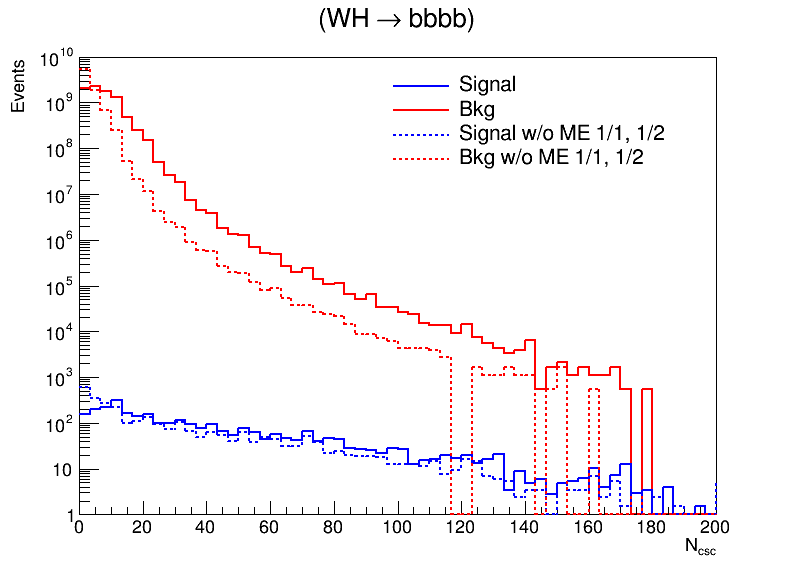

In [27]:
# Creates a 1D histogram of the number of CSC hits for the m50ct1m signal MC, QCD MC, and ZeroBias data 
# with no hit removal

c = rt.TCanvas('c','c', 800, 600)
h = {}

h['m55ct10m_wh_bbbb'] = create_TH1D(nCsc['m55ct10m_wh_bbbb'], axis_title=['m55ct10m_wh_bbbb', 'Events'], name='m55ct10m_wh_bbbb', binning=[150,0,500], weights = weight_m55ct10m)
h['m55ct10m_wh_bbbb'].SetLineColor(4)

h['m55ct10m_wh_bbbb_no112'] = create_TH1D(nCsc_removal['m55ct10m_wh_bbbb']['ME_112'], axis_title=['m55ct10m_wh_bbbb_no112', 'Events'], name='m55ct10m_wh_bbbb_no112', binning=[150,0,500], weights = weight_m55ct10m)
h['m55ct10m_wh_bbbb_no112'].SetLineColor(4)
h['m55ct10m_wh_bbbb_no112'].SetLineStyle(2)

h['nCsc_wjets'] = create_TH1D(nCsc['WJetsToLNu'], axis_title=['nCsc_wjets', 'Events'], name='nCsc_wjets', binning=[150,0,500], weights = weight_WJetsToLNu)
h['nCsc_wjets'].SetLineColor(2)

h['nCsc_wjets_no112'] = create_TH1D(nCsc_removal['WJetsToLNu']['ME_112'], axis_title=['nCsc_wjets_no112', 'Events'], name='nCsc_wjets_no112', binning=[150,0,500], weights = weight_WJetsToLNu)
h['nCsc_wjets_no112'].SetLineColor(2)
h['nCsc_wjets_no112'].SetLineStyle(2)


c.SetLogy()

# h['m55ct10m_wh_bbbb'].Scale(1.0/h['m55ct10m_wh_bbbb'].Integral())
# h['nCsc_wjets'].Scale(1.0/h['nCsc_wjets'].Integral())


h['m55ct10m_wh_bbbb'].SetLineWidth(2)
h['m55ct10m_wh_bbbb_no112'].SetLineWidth(2)


h['nCsc_wjets'].SetLineWidth(2)
h['nCsc_wjets_no112'].SetLineWidth(2)

h['nCsc_wjets'].GetYaxis().SetRangeUser(1,10**10)
h['nCsc_wjets'].GetXaxis().SetRangeUser(0,200)


h['nCsc_wjets'].SetStats(0)
h['nCsc_wjets'].SetTitle("(WH #rightarrow bbbb)")
h['nCsc_wjets'].SetXTitle("N_{csc}")


h['nCsc_wjets'].Draw('histo')
h['m55ct10m_wh_bbbb_no112'].Draw('histo+same')
h['m55ct10m_wh_bbbb'].Draw('histo+same')
h['nCsc_wjets_no112'].Draw('histo+same')

legend = rt.TLegend(0.48,0.70,0.87,0.87);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
# legend.SetFillStyle(0);
# legend.AddEntry( h['nCsc_m50ct1m'], "mX=50 GeV, c#tau=1m (MC)" , "L");
legend.AddEntry( h['m55ct10m_wh_bbbb'], "Signal" , "L");
legend.AddEntry( h['nCsc_wjets'], "Bkg" , "L");
legend.AddEntry( h['m55ct10m_wh_bbbb_no112'], "Signal w/o ME 1/1, 1/2" , "L");
legend.AddEntry( h['nCsc_wjets_no112'], "Bkg w/o ME 1/1, 1/2" , "L");


legend.Draw();

c.Draw()

# c.SaveAs("ncsc_inclusive_mc_zeroBias.pdf")
# c.SaveAs("ncsc_inclusive_mc_zeroBias.C")

## *N<sub>CSC</sub> Histogram with ME 1/1 and 1/2 Hits Removed*

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


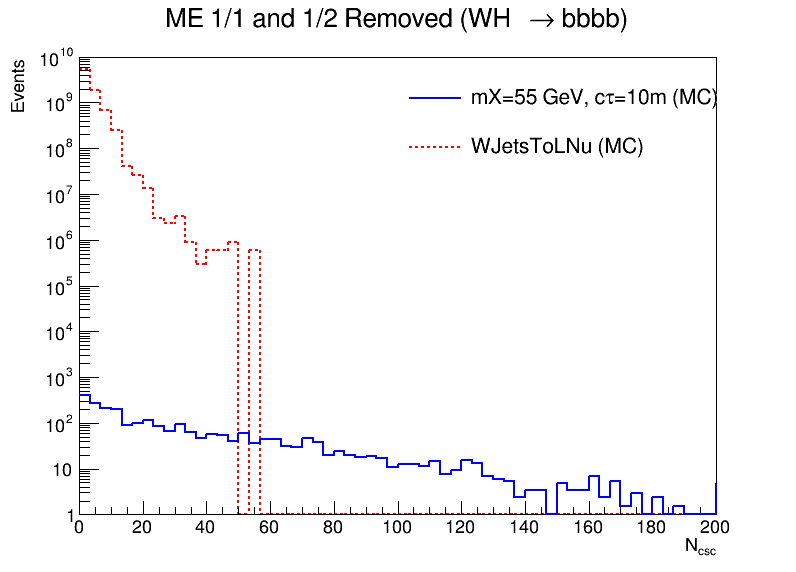

In [356]:
# Creates a 1D histogram of the number of CSC hits for the m50ct1m signal MC, QCD MC, and ZeroBias data
# after removing hits in ME 1/1

c2 = rt.TCanvas('c2','c2', 800, 600)

h['m55ct10m_wh_bbbb_noME112'] = create_TH1D(nCsc_removal['m55ct10m_wh_bbbb']['ME_112'], axis_title=['m55ct10m_wh_bbbb_noME112', 'Events'], name='m55ct10m_wh_bbbb_noME112', binning=[150,0,500], weights=weight_m55ct10m)
h['m55ct10m_wh_bbbb_noME112'].SetLineColor(4)

h['nCsc_wjets_noME112'] = create_TH1D(nCsc_removal['WJetsToLNu']['ME_112'], axis_title=['nCsc_wjets_noME112', 'Events'], name='nCsc_wjets_noME112', binning=[150,0,500], weights=weight_WJetsToLNu)
h['nCsc_wjets_noME112'].SetLineColor(2)
h['nCsc_wjets_noME112'].SetLineStyle(2)


# h['nCsc_zeroBias_noME11'] = create_TH1D(nCsc_removal['zeroBias']['ME_11'], axis_title=['nCsc_zeroBias_noME11', 'Events'], name='nCsc_zeroBias_noME11', binning=[150,0,500])
# h['nCsc_zeroBias_noME11'].SetLineColor(2)
# h['nCsc_zeroBias_noME11'].SetLineStyle(1)

c2.SetLogy()

# h['m55ct10m_wh_bbbb_noME11'].Scale(1.0/h['m55ct10m_wh_bbbb_noME11'].Integral())
# h['nCsc_wjets_noME11'].Scale(1.0/h['nCsc_wjets_noME11'].Integral())
# h['nCsc_zeroBias_noME11'].Scale(1.0/h['nCsc_zeroBias_noME11'].Integral())


h['m55ct10m_wh_bbbb_noME112'].SetLineWidth(2)
h['nCsc_wjets_noME112'].SetLineWidth(2)
# h['nCsc_zeroBias_noME11'].SetLineWidth(2)

# h['m55ct10m_wh_bbbb_noME11'].GetXaxis().SetRangeUser(0,200)
h['nCsc_wjets_noME112'].GetXaxis().SetRangeUser(0,200)
h['nCsc_wjets_noME112'].GetYaxis().SetRangeUser(1, 10**10)

# h['nCsc_zeroBias_noME11'].GetXaxis().SetRangeUser(0,200)


h['nCsc_wjets_noME112'].SetStats(0)
h['nCsc_wjets_noME112'].SetTitle("ME 1/1 and 1/2 Removed (WH #rightarrow bbbb)")
h['nCsc_wjets_noME112'].SetXTitle("N_{csc}")


h['nCsc_wjets_noME112'].Draw('histo')
# h['m55ct10m_wh_bbbb_noME11'].Draw('histo')
h['m55ct10m_wh_bbbb_noME112'].Draw('histo+same')

# h['nCsc_wjets_noME11'].Draw('histo+same')

# h['nCsc_zeroBias_noME11'].Draw('histo+same')

legend = rt.TLegend(0.50,0.70,0.87,0.87);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
#legend-.SetFillStyle(0);
legend.AddEntry( h['m55ct10m_wh_bbbb_noME112'], "mX=55 GeV, c#tau=10m (MC)" , "L");
legend.AddEntry( h['nCsc_wjets_noME112'], "WJetsToLNu (MC)" , "L");
# legend.AddEntry( h['nCsc_zeroBias_noME11'], "Zero Bias" , "L");

legend.Draw();

c2.Draw()

# c2.SaveAs("ncsc_noME11_mc_zeroBias.pdf")
# c2.SaveAs("ncsc_noME11_mc_zeroBias.C")

## *MET p<sub>T</sub> Distribution*

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_met


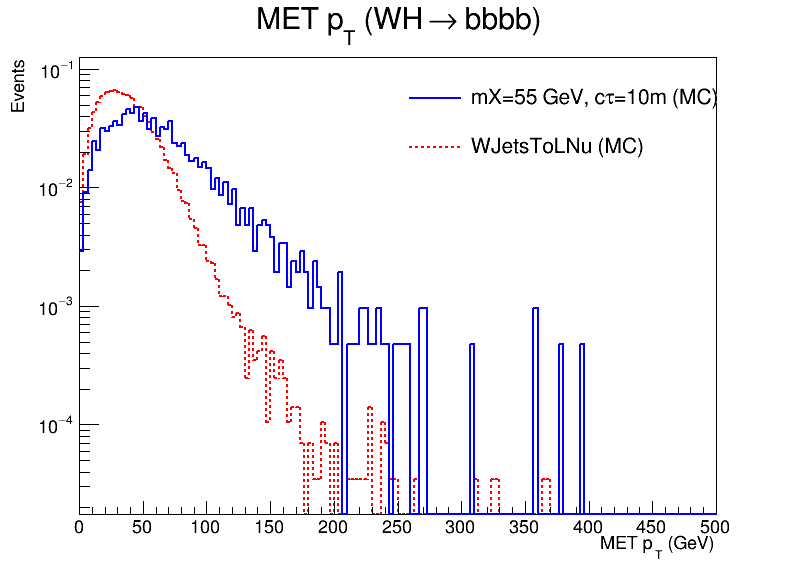

In [357]:
c_met = rt.TCanvas('c_met','c_met', 800, 600)

h['MET_m55ct10m_wh_bbbb'] = create_TH1D(met_pt['m55ct10m_wh_bbbb'], axis_title=['MET_m55ct10m_wh_bbbb', 'Events'], name='MET_m55ct10m_wh_bbbb', binning=[150,0,500])#, weights=weight_m55ct10m)
h['MET_m55ct10m_wh_bbbb'].SetLineColor(4)

h['MET_WJetsToLNu'] = create_TH1D(met_pt['WJetsToLNu'], axis_title=['MET_WJetsToLNu', 'Events'], name='MET_WJetsToLNu', binning=[150,0,500])#, weights=weight_WJetsToLNu)
h['MET_WJetsToLNu'].SetLineColor(2)
h['MET_WJetsToLNu'].SetLineStyle(2)


# h['nCsc_zeroBias_noME11'] = create_TH1D(nCsc_removal['zeroBias']['ME_11'], axis_title=['nCsc_zeroBias_noME11', 'Events'], name='nCsc_zeroBias_noME11', binning=[150,0,500])
# h['nCsc_zeroBias_noME11'].SetLineColor(2)
# h['nCsc_zeroBias_noME11'].SetLineStyle(1)

c_met.SetLogy()

h['MET_m55ct10m_wh_bbbb'].Scale(1.0/h['MET_m55ct10m_wh_bbbb'].Integral())
h['MET_WJetsToLNu'].Scale(1.0/h['MET_WJetsToLNu'].Integral())
# h['nCsc_zeroBias_noME11'].Scale(1.0/h['nCsc_zeroBias_noME11'].Integral())


h['MET_m55ct10m_wh_bbbb'].SetLineWidth(2)
h['MET_WJetsToLNu'].SetLineWidth(2)
# h['nCsc_zeroBias_noME11'].SetLineWidth(2)

h['MET_m55ct10m_wh_bbbb'].GetXaxis().SetRangeUser(0,500)
h['MET_WJetsToLNu'].GetXaxis().SetRangeUser(0,500)
# h['MET_WJetsToLNu'].GetYaxis().SetRangeUser(1, 10**10)


h['MET_WJetsToLNu'].SetStats(0)
h['MET_WJetsToLNu'].SetTitle("MET p_{T} (WH #rightarrow bbbb)")
h['MET_WJetsToLNu'].SetXTitle("MET p_{T} (GeV)")


h['MET_WJetsToLNu'].Draw('histo')
h['MET_m55ct10m_wh_bbbb'].Draw('histo+same')
# h['nCsc_zeroBias_noME11'].Draw('histo+same')

legend = rt.TLegend(0.50,0.70,0.87,0.87);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
#legend-.SetFillStyle(0);
legend.AddEntry( h['MET_m55ct10m_wh_bbbb'], "mX=55 GeV, c#tau=10m (MC)" , "L");
legend.AddEntry( h['MET_WJetsToLNu'], "WJetsToLNu (MC)" , "L");
# legend.AddEntry( h['nCsc_zeroBias_noME11'], "Zero Bias" , "L");

legend.Draw();

c_met.Draw()

In [358]:
# c_nmu = rt.TCanvas('c_nmu','c_nmu', 800, 600)

# h['nMu_m55ct10m_wh_bbbb'] = create_TH1D(nMuons['m55ct10m_wh_bbbb'], axis_title=['nMu_m55ct10m_wh_bbbb', 'Events'], name='nMu_m55ct10m_wh_bbbb', binning=[15,0,20], weights=weight_m55ct10m)
# h['nMu_m55ct10m_wh_bbbb'].SetLineColor(4)

# h['nMu_WJetsToLNu'] = create_TH1D(nMuons['WJetsToLNu'], axis_title=['nMu_WJetsToLNu', 'Events'], name='nMu_WJetsToLNu', binning=[15,0,20], weights=weight_WJetsToLNu)
# h['nMu_WJetsToLNu'].SetLineColor(2)
# h['nMu_WJetsToLNu'].SetLineStyle(2)


# # h['nCsc_zeroBias_noME11'] = create_TH1D(nCsc_removal['zeroBias']['ME_11'], axis_title=['nCsc_zeroBias_noME11', 'Events'], name='nCsc_zeroBias_noME11', binning=[150,0,500])
# # h['nCsc_zeroBias_noME11'].SetLineColor(2)
# # h['nCsc_zeroBias_noME11'].SetLineStyle(1)

# c_nmu.SetLogy()

# # h['MET_m55ct10m_wh_bbbb'].Scale(1.0/h['MET_m55ct10m_wh_bbbb'].Integral())
# # h['MET_WJetsToLNu'].Scale(1.0/h['MET_WJetsToLNu'].Integral())
# # h['nCsc_zeroBias_noME11'].Scale(1.0/h['nCsc_zeroBias_noME11'].Integral())


# h['nMu_m55ct10m_wh_bbbb'].SetLineWidth(2)
# h['nMu_WJetsToLNu'].SetLineWidth(2)
# # h['nCsc_zeroBias_noME11'].SetLineWidth(2)

# # h['nMu_m55ct10m_wh_bbbb'].GetXaxis().SetRangeUser(0,500)
# h['nMu_WJetsToLNu'].GetXaxis().SetRangeUser(0,20)
# h['nMu_WJetsToLNu'].GetYaxis().SetRangeUser(1, 10**10)


# h['nMu_WJetsToLNu'].SetStats(0)
# h['nMu_WJetsToLNu'].SetTitle("N_{#mu} (WH #rightarrow bbbb)")
# h['nMu_WJetsToLNu'].SetXTitle("N_{#mu} (GeV)")


# h['nMu_WJetsToLNu'].Draw('histo')
# h['nMu_m55ct10m_wh_bbbb'].Draw('histo+same')
# # h['nCsc_zeroBias_noME11'].Draw('histo+same')

# legend = rt.TLegend(0.50,0.70,0.87,0.87);
# legend.SetTextSize(0.04);
# legend.SetBorderSize(0);
# #legend-.SetFillStyle(0);
# legend.AddEntry( h['nMu_m55ct10m_wh_bbbb'], "mX=55 GeV, c#tau=10m (MC)" , "L");
# legend.AddEntry( h['nMu_WJetsToLNu'], "WJetsToLNu (MC)" , "L");
# # legend.AddEntry( h['nCsc_zeroBias_noME11'], "Zero Bias" , "L");

# legend.Draw();

# c_nmu.Draw()

KeyError: 'm55ct10m_wh_bbbb'

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_nmu


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_njets


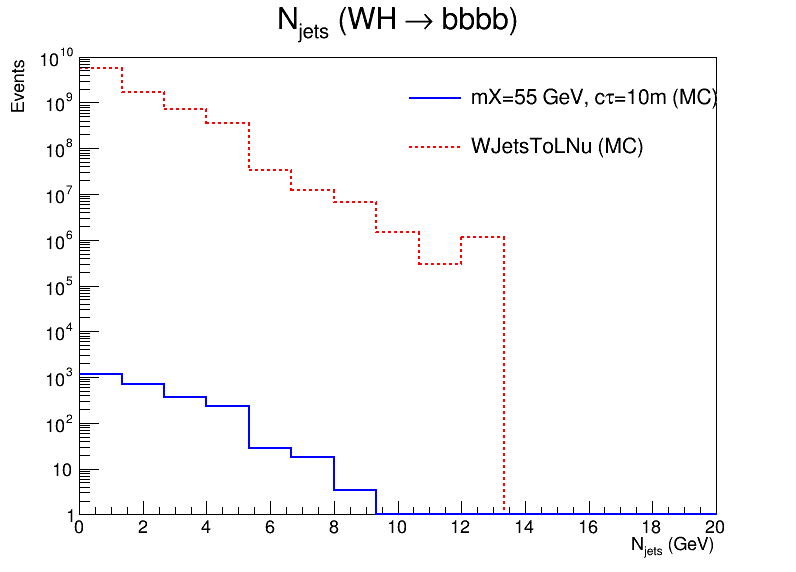

In [359]:
c_njets = rt.TCanvas('c_njets','c_njets', 800, 600)

h['nJets_m55ct10m_wh_bbbb'] = create_TH1D(nJets['m55ct10m_wh_bbbb'], axis_title=['nJets_m55ct10m_wh_bbbb', 'Events'], name='nJets_m55ct10m_wh_bbbb', binning=[15,0,20], weights=weight_m55ct10m)
h['nJets_m55ct10m_wh_bbbb'].SetLineColor(4)

h['nJets_WJetsToLNu'] = create_TH1D(nJets['WJetsToLNu'], axis_title=['nJets_WJetsToLNu', 'Events'], name='nJets_WJetsToLNu', binning=[15,0,20], weights=weight_WJetsToLNu)
h['nJets_WJetsToLNu'].SetLineColor(2)
h['nJets_WJetsToLNu'].SetLineStyle(2)


# h['nCsc_zeroBias_noME11'] = create_TH1D(nCsc_removal['zeroBias']['ME_11'], axis_title=['nCsc_zeroBias_noME11', 'Events'], name='nCsc_zeroBias_noME11', binning=[150,0,500])
# h['nCsc_zeroBias_noME11'].SetLineColor(2)
# h['nCsc_zeroBias_noME11'].SetLineStyle(1)

c_njets.SetLogy()

# h['MET_m55ct10m_wh_bbbb'].Scale(1.0/h['MET_m55ct10m_wh_bbbb'].Integral())
# h['MET_WJetsToLNu'].Scale(1.0/h['MET_WJetsToLNu'].Integral())
# h['nCsc_zeroBias_noME11'].Scale(1.0/h['nCsc_zeroBias_noME11'].Integral())


h['nJets_m55ct10m_wh_bbbb'].SetLineWidth(2)
h['nJets_WJetsToLNu'].SetLineWidth(2)
# h['nCsc_zeroBias_noME11'].SetLineWidth(2)

# h['nJets_m55ct10m_wh_bbbb'].GetXaxis().SetRangeUser(0,500)
h['nJets_WJetsToLNu'].GetXaxis().SetRangeUser(0,20)
h['nJets_WJetsToLNu'].GetYaxis().SetRangeUser(1, 10**10)


h['nJets_WJetsToLNu'].SetStats(0)
h['nJets_WJetsToLNu'].SetTitle("N_{jets} (WH #rightarrow bbbb)")
h['nJets_WJetsToLNu'].SetXTitle("N_{jets} (GeV)")


h['nJets_WJetsToLNu'].Draw('histo')
h['nJets_m55ct10m_wh_bbbb'].Draw('histo+same')
# h['nCsc_zeroBias_noME11'].Draw('histo+same')

legend = rt.TLegend(0.50,0.70,0.87,0.87);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
#legend-.SetFillStyle(0);
legend.AddEntry( h['nJets_m55ct10m_wh_bbbb'], "mX=55 GeV, c#tau=10m (MC)" , "L");
legend.AddEntry( h['nJets_WJetsToLNu'], "WJetsToLNu (MC)" , "L");
# legend.AddEntry( h['nCsc_zeroBias_noME11'], "Zero Bias" , "L");

legend.Draw();

c_njets.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_jetpt


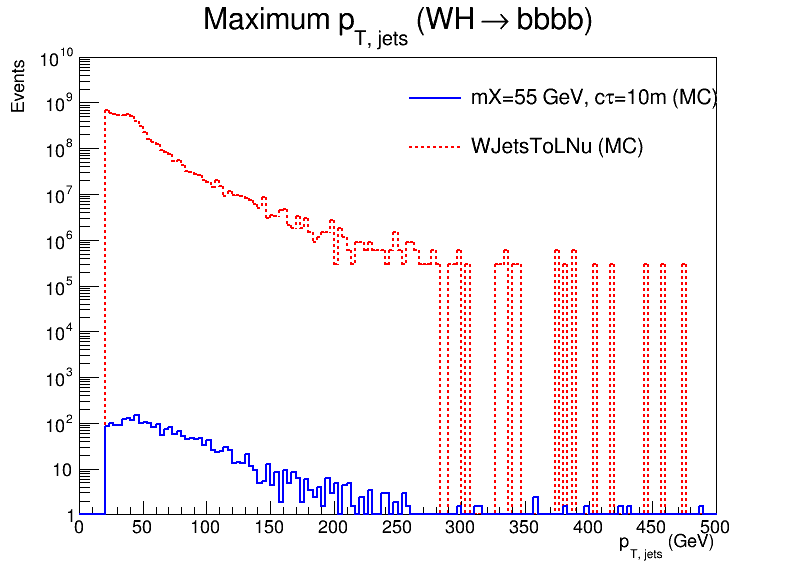

In [360]:
c_jetpt = rt.TCanvas('c_jetpt','c_jetpt', 800, 600)

h['max_jet_pt_m55ct10m_wh_bbbb'] = create_TH1D(max_jet_pt['m55ct10m_wh_bbbb'], axis_title=['max_jet_pt_m55ct10m_wh_bbbb', 'Events'], name='max_jet_pt_m55ct10m_wh_bbbb', binning=[150,0,500], weights=weight_m55ct10m)
h['max_jet_pt_m55ct10m_wh_bbbb'].SetLineColor(4)

h['max_jet_pt_WJetsToLNu'] = create_TH1D(max_jet_pt['WJetsToLNu'], axis_title=['max_jet_pt_WJetsToLNu', 'Events'], name='max_jet_pt_WJetsToLNu', binning=[150,0,500], weights=weight_WJetsToLNu)
h['max_jet_pt_WJetsToLNu'].SetLineColor(2)
h['max_jet_pt_WJetsToLNu'].SetLineStyle(2)


# h['nCsc_zeroBias_noME11'] = create_TH1D(nCsc_removal['zeroBias']['ME_11'], axis_title=['nCsc_zeroBias_noME11', 'Events'], name='nCsc_zeroBias_noME11', binning=[150,0,500])
# h['nCsc_zeroBias_noME11'].SetLineColor(2)
# h['nCsc_zeroBias_noME11'].SetLineStyle(1)

c_jetpt.SetLogy()

# h['MET_m55ct10m_wh_bbbb'].Scale(1.0/h['MET_m55ct10m_wh_bbbb'].Integral())
# h['MET_WJetsToLNu'].Scale(1.0/h['MET_WJetsToLNu'].Integral())
# h['nCsc_zeroBias_noME11'].Scale(1.0/h['nCsc_zeroBias_noME11'].Integral())


h['max_jet_pt_m55ct10m_wh_bbbb'].SetLineWidth(2)
h['max_jet_pt_WJetsToLNu'].SetLineWidth(2)
# h['nCsc_zeroBias_noME11'].SetLineWidth(2)

# h['max_jet_pt_m55ct10m_wh_bbbb'].GetXaxis().SetRangeUser(0,500)
h['max_jet_pt_WJetsToLNu'].GetXaxis().SetRangeUser(0,500)
h['max_jet_pt_WJetsToLNu'].GetYaxis().SetRangeUser(1, 10**10)


h['max_jet_pt_WJetsToLNu'].SetStats(0)
h['max_jet_pt_WJetsToLNu'].SetTitle("Maximum p_{T, jets} (WH #rightarrow bbbb)")
h['max_jet_pt_WJetsToLNu'].SetXTitle("p_{T, jets} (GeV)")


h['max_jet_pt_WJetsToLNu'].Draw('histo')
h['max_jet_pt_m55ct10m_wh_bbbb'].Draw('histo+same')
# h['nCsc_zeroBias_noME11'].Draw('histo+same')

legend = rt.TLegend(0.50,0.70,0.87,0.87);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
#legend-.SetFillStyle(0);
legend.AddEntry( h['max_jet_pt_m55ct10m_wh_bbbb'], "mX=55 GeV, c#tau=10m (MC)" , "L");
legend.AddEntry( h['max_jet_pt_WJetsToLNu'], "WJetsToLNu (MC)" , "L");
# legend.AddEntry( h['nCsc_zeroBias_noME11'], "Zero Bias" , "L");

legend.Draw();

c_jetpt.Draw()

In [361]:
# c_muonpt = rt.TCanvas('c_muonpt','c_muonpt', 800, 600)

# h['max_muon_pt_m55ct10m_wh_bbbb'] = create_TH1D(max_mu_pt['m55ct10m_wh_bbbb'], axis_title=['max_muon_pt_m55ct10m_wh_bbbb', 'Events'], name='max_muon_pt_m55ct10m_wh_bbbb', binning=[150,0,500], weights=weight_m55ct10m)
# h['max_muon_pt_m55ct10m_wh_bbbb'].SetLineColor(4)

# h['max_muon_pt_WJetsToLNu'] = create_TH1D(max_mu_pt['WJetsToLNu'], axis_title=['max_muon_pt_WJetsToLNu', 'Events'], name='max_muon_pt_WJetsToLNu', binning=[150,0,500], weights=weight_WJetsToLNu)
# h['max_muon_pt_WJetsToLNu'].SetLineColor(2)
# h['max_muon_pt_WJetsToLNu'].SetLineStyle(2)


# # h['nCsc_zeroBias_noME11'] = create_TH1D(nCsc_removal['zeroBias']['ME_11'], axis_title=['nCsc_zeroBias_noME11', 'Events'], name='nCsc_zeroBias_noME11', binning=[150,0,500])
# # h['nCsc_zeroBias_noME11'].SetLineColor(2)
# # h['nCsc_zeroBias_noME11'].SetLineStyle(1)

# c_muonpt.SetLogy()

# # h['MET_m55ct10m_wh_bbbb'].Scale(1.0/h['MET_m55ct10m_wh_bbbb'].Integral())
# # h['MET_WJetsToLNu'].Scale(1.0/h['MET_WJetsToLNu'].Integral())
# # h['nCsc_zeroBias_noME11'].Scale(1.0/h['nCsc_zeroBias_noME11'].Integral())


# h['max_muon_pt_m55ct10m_wh_bbbb'].SetLineWidth(2)
# h['max_muon_pt_WJetsToLNu'].SetLineWidth(2)
# # h['nCsc_zeroBias_noME11'].SetLineWidth(2)

# # h['max_muon_pt_m55ct10m_wh_bbbb'].GetXaxis().SetRangeUser(0,500)
# h['max_muon_pt_WJetsToLNu'].GetXaxis().SetRangeUser(0,500)
# h['max_muon_pt_WJetsToLNu'].GetYaxis().SetRangeUser(1, 10**10)


# h['max_muon_pt_WJetsToLNu'].SetStats(0)
# h['max_muon_pt_WJetsToLNu'].SetTitle("Maximum p_{T, #mu} (WH #rightarrow bbbb)")
# h['max_muon_pt_WJetsToLNu'].SetXTitle("p_{T, #mu} (GeV)")


# h['max_muon_pt_WJetsToLNu'].Draw('histo')
# h['max_muon_pt_m55ct10m_wh_bbbb'].Draw('histo+same')
# # h['nCsc_zeroBias_noME11'].Draw('histo+same')

# legend = rt.TLegend(0.50,0.70,0.87,0.87);
# legend.SetTextSize(0.04);
# legend.SetBorderSize(0);
# #legend-.SetFillStyle(0);
# legend.AddEntry( h['max_muon_pt_m55ct10m_wh_bbbb'], "mX=55 GeV, c#tau=10m (MC)" , "L");
# legend.AddEntry( h['max_muon_pt_WJetsToLNu'], "WJetsToLNu (MC)" , "L");
# # legend.AddEntry( h['nCsc_zeroBias_noME11'], "Zero Bias" , "L");

# legend.Draw();

# c_muonpt.Draw()

In [362]:
# c_elept = rt.TCanvas('c_elept','c_elept', 800, 600)

# h['max_ele_pt_m55ct10m_wh_bbbb'] = create_TH1D(max_ele_pt['m55ct10m_wh_bbbb'], axis_title=['max_ele_pt_m55ct10m_wh_bbbb', 'Events'], name='max_ele_pt_m55ct10m_wh_bbbb', binning=[150,0,500], weights=weight_m55ct10m)
# h['max_ele_pt_m55ct10m_wh_bbbb'].SetLineColor(4)

# h['max_ele_pt_WJetsToLNu'] = create_TH1D(max_ele_pt['WJetsToLNu'], axis_title=['max_ele_pt_WJetsToLNu', 'Events'], name='max_ele_pt_WJetsToLNu', binning=[150,0,500], weights=weight_WJetsToLNu)
# h['max_ele_pt_WJetsToLNu'].SetLineColor(2)
# h['max_ele_pt_WJetsToLNu'].SetLineStyle(2)


# # h['nCsc_zeroBias_noME11'] = create_TH1D(nCsc_removal['zeroBias']['ME_11'], axis_title=['nCsc_zeroBias_noME11', 'Events'], name='nCsc_zeroBias_noME11', binning=[150,0,500])
# # h['nCsc_zeroBias_noME11'].SetLineColor(2)
# # h['nCsc_zeroBias_noME11'].SetLineStyle(1)

# c_elept.SetLogy()

# # h['MET_m55ct10m_wh_bbbb'].Scale(1.0/h['MET_m55ct10m_wh_bbbb'].Integral())
# # h['MET_WJetsToLNu'].Scale(1.0/h['MET_WJetsToLNu'].Integral())
# # h['nCsc_zeroBias_noME11'].Scale(1.0/h['nCsc_zeroBias_noME11'].Integral())


# h['max_ele_pt_m55ct10m_wh_bbbb'].SetLineWidth(2)
# h['max_ele_pt_WJetsToLNu'].SetLineWidth(2)
# # h['nCsc_zeroBias_noME11'].SetLineWidth(2)

# # h['max_ele_pt_m55ct10m_wh_bbbb'].GetXaxis().SetRangeUser(0,500)
# h['max_ele_pt_WJetsToLNu'].GetXaxis().SetRangeUser(0,500)
# h['max_ele_pt_WJetsToLNu'].GetYaxis().SetRangeUser(1, 10**10)


# h['max_ele_pt_WJetsToLNu'].SetStats(0)
# h['max_ele_pt_WJetsToLNu'].SetTitle("Maximum p_{T, electron} (WH #rightarrow bbbb)")
# h['max_ele_pt_WJetsToLNu'].SetXTitle("p_{T, electron} (GeV)")


# h['max_ele_pt_WJetsToLNu'].Draw('histo')
# h['max_ele_pt_m55ct10m_wh_bbbb'].Draw('histo+same')
# # h['nCsc_zeroBias_noME11'].Draw('histo+same')

# legend = rt.TLegend(0.50,0.70,0.87,0.87);
# legend.SetTextSize(0.04);
# legend.SetBorderSize(0);
# #legend-.SetFillStyle(0);
# legend.AddEntry( h['max_ele_pt_m55ct10m_wh_bbbb'], "mX=55 GeV, c#tau=10m (MC)" , "L");
# legend.AddEntry( h['max_ele_pt_WJetsToLNu'], "WJetsToLNu (MC)" , "L");
# # legend.AddEntry( h['nCsc_zeroBias_noME11'], "Zero Bias" , "L");

# legend.Draw();

# c_elept.Draw()

# Matching Clusters to Jets

In [462]:
# Basic Implementation: loop through csc hits, and for each csc hit loop through jets, and get rid of this particular csc hit if its close to any jet
# Calculate deltaR between hit and jet, if greater than 0.4, accept hit, else reject

# print(len(csc_z['m55ct10m_wh_bbbb'][0]))
# print(len(jetEta['m55ct10m_wh_bbbb'][0]))

# print(len(csc_z['WJetsToLNu'][2]))
# print(len(jetEta['WJetsToLNu'][2]))

nCsc_jetMatch  = {}
nCsc_rechit_jetMatch = {}

for sample in data_trees.keys():
    nCsc_jetMatch[sample] = []
    nCsc_rechit_jetMatch[sample] = []
    for event in range(len(csc_eta[sample])):
        unmatched_hits = 0
        good_hits = 0
        hit_eta_list = csc_eta[sample][event]
        hit_phi_list = csc_phi[sample][event]
        hit_flag_list = nRechits_flag[sample][event]
        
        for hit in range(len(hit_eta_list)):
            hit_eta = hit_eta_list[hit]
            hit_phi = hit_phi_list[hit]
            hit_flag = hit_flag_list[hit]
            
            is_near_jet = False
            for pf_jet in range(len(jetEta[sample][event])):
                pfJet_eta = jetEta[sample][event][pf_jet]
                pfJet_phi = jetPhi[sample][event][pf_jet]
            
                dEta_jet = np.absolute(hit_eta - pfJet_eta)
                dPhi_jet = np.absolute(hit_phi - pfJet_phi)
                
                if dPhi_jet > np.pi:
                    dPhi_jet -= np.pi*2
                    
                elif dPhi_jet <= -np.pi:
                    dPhi_jet += np.pi*2
                    
                assert(dPhi_jet < np.pi and dPhi_jet > -np.pi)

                dR_jet = np.sqrt(dEta_jet**2 + dPhi_jet**2)
                if dR_jet <= 0.4:
                    is_near_jet = True
                    
            if is_near_jet == False:
                unmatched_hits += 1
                if hit_flag >= 3:
                    good_hits += 1
                
        nCsc_jetMatch[sample].append(unmatched_hits)
        nCsc_rechit_jetMatch[sample].append(good_hits)
        
        
        if (event % 10000) == 0:
            print(str(event) + ': '+  str(datetime.datetime.now(pytz.timezone('US/Pacific'))))
            
    print(sample + ': ' +str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

0: 2019-08-14 17:02:10.669782-07:00
m55ct10m_wh_bbbb_minus: 2019-08-14 17:02:15.052887-07:00
0: 2019-08-14 17:02:15.055818-07:00
m55ct10m_wh_bbbb_plus: 2019-08-14 17:02:19.518772-07:00
0: 2019-08-14 17:02:19.519427-07:00
10000: 2019-08-14 17:02:24.991534-07:00
20000: 2019-08-14 17:02:30.515424-07:00
WJetsToLNu: 2019-08-14 17:02:35.293231-07:00


In [463]:
nCsc_jetMatch['m55ct10m_wh_bbbb'] = np.concatenate([nCsc_jetMatch['m55ct10m_wh_bbbb_minus'], nCsc_jetMatch['m55ct10m_wh_bbbb_plus']])
nCsc_rechit_jetMatch['m55ct10m_wh_bbbb'] = np.concatenate([nCsc_rechit_jetMatch['m55ct10m_wh_bbbb_minus'], nCsc_rechit_jetMatch['m55ct10m_wh_bbbb_plus']])
print(np.count_nonzero(nCsc_jetMatch['m55ct10m_wh_bbbb']))
print(np.count_nonzero(nCsc_rechit_jetMatch['m55ct10m_wh_bbbb']))

2071
2071


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_match
Warning in <TROOT::Append>: Replacing existing TH1: n_match_m55ct10m_wh_bbbb (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: n_match_wjets (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: n_noMatch_m55ct10m_wh_bbbb (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: n_noMatch_wjets (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: n_good_m55ct10m_wh_bbbb (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: n_good_wjets (Potential memory leak).


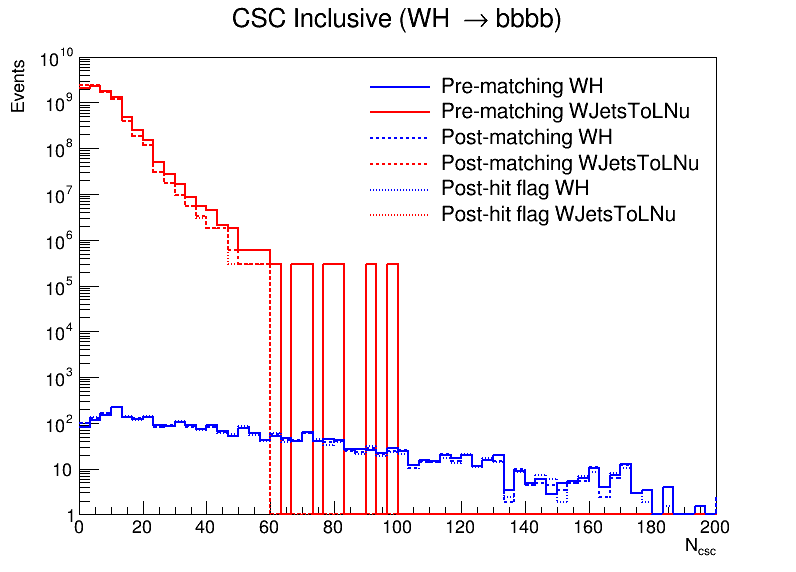

In [470]:
# Creates a 1D histogram of the number of CSC hits for the m50ct1m signal MC, QCD MC, and ZeroBias data 
# with no hit removal

c_match = rt.TCanvas('c_match','c_match', 800, 600)
h = {}
# h['nCsc_m50ct1m'] = create_TH1D(nCsc['m50ct1m'], axis_title=['nCsc_m50ct1m', 'Events'], name='nCsc_m50ct1m', binning=[150,0,500])
# h['nCsc_m50ct1m'].SetLineColor(4)

h['n_match_m55ct10m_wh_bbbb'] = create_TH1D(nCsc_jetMatch['m55ct10m_wh_bbbb'], axis_title=['n_match_m55ct10m_wh_bbbb', 'Events'], name='n_match_m55ct10m_wh_bbbb', binning=[150,0,500], weights = weight_m55ct10m)
h['n_match_m55ct10m_wh_bbbb'].SetLineColor(4)
h['n_match_m55ct10m_wh_bbbb'].SetLineStyle(2)

h['n_match_wjets'] = create_TH1D(nCsc_jetMatch['WJetsToLNu'], axis_title=['n_match_wjets', 'Events'], name='n_match_wjets', binning=[150,0,500], weights=weight_WJetsToLNu)
h['n_match_wjets'].SetLineColor(2)
h['n_match_wjets'].SetLineStyle(2)

h['n_noMatch_m55ct10m_wh_bbbb'] = create_TH1D(nCsc['m55ct10m_wh_bbbb'], axis_title=['n_noMatch_m55ct10m_wh_bbbb', 'Events'], name='n_noMatch_m55ct10m_wh_bbbb', binning=[150,0,500], weights = weight_m55ct10m)
h['n_noMatch_m55ct10m_wh_bbbb'].SetLineColor(4)

h['n_noMatch_wjets'] = create_TH1D(nCsc['WJetsToLNu'], axis_title=['n_noMatch_wjets', 'Events'], name='n_noMatch_wjets', binning=[150,0,500], weights=weight_WJetsToLNu)
h['n_noMatch_wjets'].SetLineColor(2)

h['n_good_m55ct10m_wh_bbbb'] = create_TH1D(nCsc_rechit_jetMatch['m55ct10m_wh_bbbb'], axis_title=['n_good_m55ct10m_wh_bbbb', 'Events'], name='n_good_m55ct10m_wh_bbbb', binning=[150,0,500], weights = weight_m55ct10m)
h['n_good_m55ct10m_wh_bbbb'].SetLineColor(4)
h['n_good_m55ct10m_wh_bbbb'].SetLineStyle(3)

h['n_good_wjets'] = create_TH1D(nCsc_rechit_jetMatch['WJetsToLNu'], axis_title=['n_good_wjets', 'Events'], name='n_good_wjets', binning=[150,0,500], weights=weight_WJetsToLNu)
h['n_good_wjets'].SetLineColor(2)
h['n_good_wjets'].SetLineStyle(3)


# h['nCsc_zeroBias'] = create_TH1D(nCsc['zeroBias'], axis_title=['nCsc_zeroBias', 'Events'], name='nCsc_zeroBias', binning=[150,0,500])
# h['nCsc_zeroBias'].SetLineColor(2)
# h['nCsc_zeroBias'].SetLineStyle(1)

c_match.SetLogy()

# h['n_match_m55ct10m_wh_bbbb'].Scale(1.0/h['n_match_m55ct10m_wh_bbbb'].Integral())
# h['n_match_wjets'].Scale(1.0/h['n_match_wjets'].Integral())

# h['nCsc_wjets'].Scale(1.0/h['nCsc_wjets'].Integral())
# h['nCsc_zeroBias'].Scale(1.0/h['nCsc_zeroBias'].Integral())


h['n_noMatch_wjets'].SetLineWidth(2)
h['n_match_m55ct10m_wh_bbbb'].SetLineWidth(2)

h['n_match_wjets'].SetLineWidth(2)
h['n_noMatch_m55ct10m_wh_bbbb'].SetLineWidth(2)

h['n_good_wjets'].SetLineWidth(2)
h['n_good_m55ct10m_wh_bbbb'].SetLineWidth(2)

h['n_match_wjets'].GetXaxis().SetRangeUser(0,200)
h['n_match_wjets'].GetYaxis().SetRangeUser(1,10**10)

# h['n_match_wjets'].GetXaxis().SetRangeUser(0,200)
# h['nCsc_zeroBias'].GetXaxis().SetRangeUser(0,200)


h['n_match_wjets'].SetStats(0)
h['n_match_wjets'].SetTitle("CSC Inclusive (WH #rightarrow bbbb)")
h['n_match_wjets'].SetXTitle("N_{csc}")


h['n_match_wjets'].Draw('histo')
# h['nCsc_m50ct1m'].Draw('histo+same')
h['n_match_m55ct10m_wh_bbbb'].Draw('histo+same')
h['n_noMatch_wjets'].Draw('histo+same')
h['n_noMatch_m55ct10m_wh_bbbb'].Draw('histo+same')
h['n_good_wjets'].Draw('histo+same')
h['n_good_m55ct10m_wh_bbbb'].Draw('histo+same')


legend = rt.TLegend(0.45,0.60,0.87,0.87);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
# legend.SetFillStyle(0);
# legend.AddEntry( h['nCsc_m50ct1m'], "mX=50 GeV, c#tau=1m (MC)" , "L");
legend.AddEntry( h['n_noMatch_m55ct10m_wh_bbbb'], "Pre-matching WH" , "L");
legend.AddEntry( h['n_noMatch_wjets'], "Pre-matching WJetsToLNu" , "L");
legend.AddEntry( h['n_match_m55ct10m_wh_bbbb'], "Post-matching WH" , "L");
legend.AddEntry( h['n_match_wjets'], "Post-matching WJetsToLNu" , "L");
legend.AddEntry( h['n_good_m55ct10m_wh_bbbb'], "Post-hit flag WH" , "L");
legend.AddEntry( h['n_good_wjets'], "Post-hit flag WJetsToLNu" , "L");

# legend.AddEntry( h['nCsc_zeroBias'], "Zero Bias" , "L");

legend.Draw();

c_match.Draw()

# c.SaveAs("ncsc_inclusive_mc_zeroBias.pdf")
# c.SaveAs("ncsc_inclusive_mc_zeroBias.C")

## Jet Matching Investigation

In [371]:
# lumiNum_event_sel = lumiNum['WJetsToLNu'][index_ev][np.isin(np.array(lumiNum['WJetsToLNu'][index_ev]), lumi_all)]
# print(np.where(eventNum['WJetsToLNu']==34136610))

# Punch-through events
test_event = [1181077, 6815378, 16620170, 30304316, 31849882, 34187514, 2051798, 31702700, 49597165, 21735179, 22490429, 25887303, 23898866, 25315728, 25496609, 29620628, 31912661, 20987497, 24369691, 14944648, 27133561, 62439622, 20430636, 25887454, 34136610]
jet_station = ['1/1', '1/1', '1/1', '1/1', '1/1', '1/1', '1/1', '1/1', '1/1', '1/1', '1/1', '1/1', '1/1', '1/1', '1/1', '1/1', '1/1', '1/2', '1/2', '1/2', '1/2', '1/2', '1/2', '1/2', '1/2', ]
test_lumi = []
test_ncsc = []
test_jetpt = []
test_jeteta = []
test_jetphi = []

for test_case in test_event:
    test_lumi.append(lumiNum['WJetsToLNu'][np.where(test_case == eventNum['WJetsToLNu'])][0])
    test_ncsc.append(nCsc['WJetsToLNu'][np.where(test_case == eventNum['WJetsToLNu'])][0])
    test_jetpt.append(jet_pt['WJetsToLNu'][np.where(test_case == eventNum['WJetsToLNu'])][0])
    
    test_jeteta.append(jetEta['WJetsToLNu'][np.where(test_case == eventNum['WJetsToLNu'])][0])
    test_jetphi.append(jetPhi['WJetsToLNu'][np.where(test_case == eventNum['WJetsToLNu'])][0])

test_table = np.dstack((test_lumi, test_event, test_ncsc, test_jetpt, test_jeteta, test_jetphi, jet_station))[0]

matching_inv = PrettyTable(["lumiNum", "eventNum", "nCsc", "jetPt", "jetEta", "jetPhi", "Punch-through CSC Station"])

for test_index in range(len(test_event)):
    matching_inv.add_row(test_table[test_index])
print(nFatJets['WJetsToLNu'][np.where(test_case == eventNum['WJetsToLNu'])])
print(matching_inv.get_string(title="Jet Matching Investigation"))

IndexError: index 0 is out of bounds for axis 0 with size 0

# k-means Clustering

In [132]:
# k-means clustering algorithm
# For more information, check out https://stanford.edu/~cpiech/cs221/handouts/kmeans.html

MAX_ITERATIONS = 100
# Function: Should Stop
# -------------
# Returns True or False if k-means is done. K-means terminates either
# because it has run a maximum number of iterations OR the centroids
# stop changing.
def shouldStop(oldCentroids, centroids, iterations):
    if iterations > MAX_ITERATIONS: return True
    return np.array_equal(oldCentroids,centroids) and iterations > 0


# Function: Get Labels
# -------------
# Returns a label for each piece of data in the dataset. 
def getLabels(dataSet, centroids, i):
    #print 1
    #for i in dataSet:
    dist = cdist( dataSet, centroids, metric='euclidean' )
    
    #print dist
    if i < 1:
        dist[dist>1.0] = 999
    elif i < 2:
        dist[dist>0.8] = 999
    else:
        dist[dist>0.4] = 999
        
    #print dist
    #print np.argmin(dist, axis=1)
    return np.argmin(dist, axis=1)
    #print dataSet
    # For each element in the dataset, chose the closest centroid. 
    # Make that centroid the element's label.

# Function: Get Centroids
# -------------
# Returns k centroids, each of dimension n.
def getCentroids_kmeans(dataSet, centroids, labels, k):
    #print centroids
    newcentroid = np.empty((0,2))
    new_centroid_constituents = []
    for i in range(k):
        sel = labels[:] == i
        #print i, dataSet[sel], np.count_nonzero(dataSet[sel])/2
        if np.count_nonzero(dataSet[sel]) > 0:
            #print np.average(dataSet[sel], axis=0)
            #newcentroid.append(np.average(dataSet[sel], axis=0))
            selected = [np.average(dataSet[sel], axis=0)]
            for val in selected:
                newcentroid = np.append(newcentroid,[val], axis=0)
            #newcentroid = np.append(newcentroid,np.average(dataSet[sel], axis=0), axis=0)
            new_centroid_constituents.append(np.count_nonzero(dataSet[sel])/2)
        else:
            newcentroid = np.append(newcentroid,[centroids[i]],axis=0)
            new_centroid_constituents.append(0)
    
    return newcentroid,new_centroid_constituents
    # Each centroid is the geometric mean of the points that
    # have that centroid's label. Important: If a centroid is empty (no points have
    # that centroid's label) you should randomly re-initialize it.
    
# Function: Get Centroids
# -------------
# Returns k random centroids, each of dimension n.
def getRandomCentroids():
    # Each centroid is the geometric mean of the points that
    # have that centroid's label. Important: If a centroid is empty (no points have
    # that centroid's label) you should randomly re-initialize it.
    even_list = np.linspace(-4.0, 4.0, num=5)
    centers  = np.empty((0,2))
    for i in even_list:
        for j in even_list:
            #print i,j
            new_arr = np.array([i,j])
            centers = np.append(centers,[new_arr],axis=0)
    #print centers
    return centers
    #return np.mgrid[-4:4.1:2, -4:4.1:2].reshape(2,-1).T
    #return np.random.rand(k,numFeatures)

# Function: K Means
# -------------
# K-Means is an algorithm that takes in a dataset and a constant
# k and returns k centroids (which define clusters of data in the
# dataset which are similar to one another).
def kmeans(dataSet, k):
    # Initialize centroids randomly
    numFeatures = dataSet.ndim
    centroids = getRandomCentroids()
    centroid_constituents = np.repeat(-999, 25)
    # Initialize book keeping vars.
    iterations = 0
    oldCentroids = np.empty((25,2))
    oldCentroids[:] = centroids
    #np.random.rand(1,2)
    #print centroids
    # Run the main k-means algorithm
    while not shouldStop(oldCentroids, centroids, iterations):
        # Save old centroids for convergence test. Book keeping.
        oldCentroids[:] = centroids
        #print oldCentroids
        #print 'iter', iterations
        
        # Assign labels to each datapoint based on centroids
        labels = getLabels(dataSet, centroids, iterations)
        # Assign centroids based on datapoint labels
        
        centroids,centroid_constituents = getCentroids_kmeans(dataSet, oldCentroids, labels, k)
        #print centroids
        iterations += 1
        
    # We can get the labels too by calling getLabels(dataSet, centroids)
    return centroids,centroid_constituents

####################################################################################################

# k-medians Algorithm
# -------------
# k-medians is equivalent algorithm to k-means except it calculates the median instead of the average

# Function: Get Centroids
# -------------
# Returns k centroids, each of dimension n.
def getCentroids_kmedians(dataSet, centroids, labels, k):
    #print centroids
    newcentroid = np.empty((0,2))
    new_centroid_constituents = []
    for i in range(k):
        sel = labels[:] == i
        #print i, dataSet[sel], np.count_nonzero(dataSet[sel])/2
        if np.count_nonzero(dataSet[sel]) > 0:
            #print np.average(dataSet[sel], axis=0)
            #newcentroid.append(np.average(dataSet[sel], axis=0))
            selected = [np.median(dataSet[sel], axis=0)]
            for val in selected:
                newcentroid = np.append(newcentroid,[val], axis=0)
            #newcentroid = np.append(newcentroid,np.average(dataSet[sel], axis=0), axis=0)
            new_centroid_constituents.append(np.count_nonzero(dataSet[sel])/2)
        else:
            newcentroid = np.append(newcentroid,[centroids[i]],axis=0)
            new_centroid_constituents.append(0)
    
    return newcentroid,new_centroid_constituents
    # Each centroid is the geometric median of the points that
    # have that centroid's label. Important: If a centroid is empty (no points have
    # that centroid's label) you should randomly re-initialize it.

# Function: K Medians
# -------------
# K-medians is an algorithm that takes in a dataset and a constant
# k and returns k centroids (which define clusters of data in the
# dataset which are similar to one another).
def kmedians(dataSet, k):
    # Initialize centroids randomly
    numFeatures = dataSet.ndim
    centroids = getRandomCentroids()
    centroid_constituents = np.repeat(-999, 25)
    # Initialize book keeping vars.
    iterations = 0
    oldCentroids = np.empty((25,2))
    oldCentroids[:] = centroids
    #np.random.rand(1,2)
    #print centroids
    # Run the main k-means algorithm
    while not shouldStop(oldCentroids, centroids, iterations):
        # Save old centroids for convergence test. Book keeping.
        oldCentroids[:] = centroids
        #print oldCentroids
        #print 'iter', iterations
        
        # Assign labels to each datapoint based on centroids
        labels = getLabels(dataSet, centroids, iterations)
        # Assign centroids based on datapoint labels
        
        centroids,centroid_constituents = getCentroids_kmeans(dataSet, oldCentroids, labels, k)
        #print centroids
        iterations += 1
        
    # We can get the labels too by calling getLabels(dataSet, centroids)
    return centroids,centroid_constituents

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_cluster


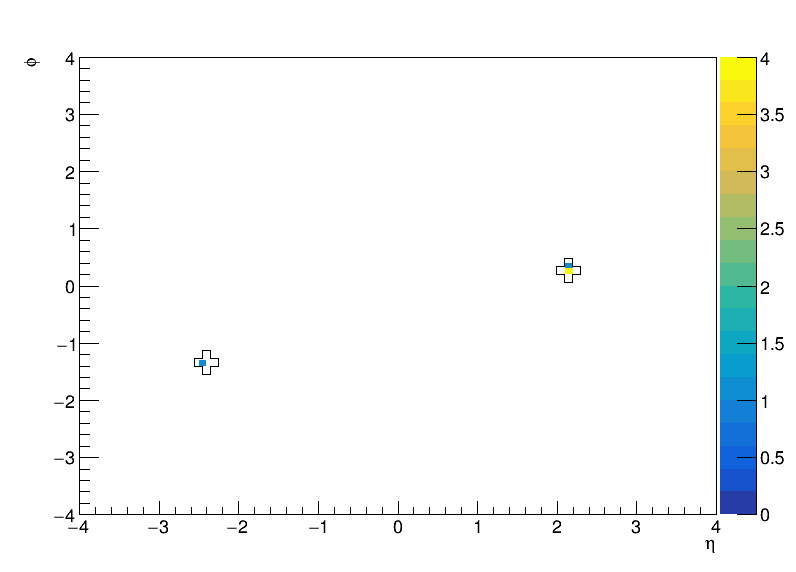

In [387]:
evt_idx = 7

c_cluster = rt.TCanvas('c_cluster','c_cluster', 800, 600)
h['eta_phi_0'] = create_TH2D(np.vstack((csc_eta['WJetsToLNu'][evt_idx],csc_phi['WJetsToLNu'][evt_idx])).T, name='eta_phi_0', title='', binning=[80, -4, 4, 80, -4, 4], weights=None, axis_title = ['#eta','#phi', ''])

## Scrapped due to np.logical_and discovery
# Resulting implementation of eventNum
#h['eta_phi_0'] = create_TH2D(np.vstack((csc_eta_dis[event4][0],csc_phi_dis[event4][0])).T, name='eta_phi_0', title='', binning=[80, -4, 4, 80, -4, 4], weights=None, axis_title = ['#eta','#phi', ''])


c_cluster.SetLogy(0)
h['eta_phi_0'].SetStats(0)
c_cluster.cd()
#h['eta_phi_0'].SetStats(0)
h['eta_phi_0'].Draw("colz")


#test_dataset = np.vstack((csc_eta_prompt[evt_idx],csc_phi_prompt[evt_idx])).T

test_dataset = np.vstack((csc_eta['WJetsToLNu'][evt_idx],csc_phi['WJetsToLNu'][evt_idx])).T
#print(test_dataset)
#print test_dataset.ndim
#print len(csc_eta_prompt[evt_idx])
centroids_t,centroid_constituents_t = kmeans(test_dataset,25)

ll = 0
xx = []
yy = []
nn = 0
for nc in centroid_constituents_t:
    if nc > 0:
        nn += 1
        xx.append(centroids_t[ll,0])
        yy.append(centroids_t[ll,1])
    ll += 1


tg = rt.TGraph(nn)
for ii in range(nn):
    tg.SetPoint(ii,xx[ii],yy[ii])


tg.SetMarkerSize(3)
tg.SetMarkerStyle(28)
tg.Draw("P0+same")


c_cluster.Draw()

In [134]:
n_c_total = {}
n_c_hits_12 = {}
n_c_hits_13 = {}

delta_t_max_freq = {}
delta_t_max = {}

# met_pt_cluster = {}
# delta_t_average = {}

def sel_clustering(station, model): # Add (, model) for gen level info
        eta_data_sel = data_sel[station][0]
        t_data_sel = data_sel[station][1]
        z_data_sel = data_sel[station][2]
        if station == 2 or station == -2:
            x_data_sel = data_sel[station][3]
            y_data_sel = data_sel[station][4]
        else:
            x_data_sel = np.zeros(len(eta_data_sel))
            y_data_sel = np.zeros(len(eta_data_sel))
            
        test_dataset = np.vstack((eta_data_sel, t_data_sel)).T
        
        # Centroid_constituents is a list of all of the hits corresponding to each centroid
        # etaPhi_labels is a list of the centroids corresponding to each hit
        centroids, centroid_constituents = kmeans(test_dataset, 25)
#         centroids, centroid_constituents = kmedians(test_dataset, 25)
        etaPhi_labels = getLabels(test_dataset, centroids, 2)
        
#         print(centroid_constituents)
#         print(etaPhi_labels)
        
        # Determines nCsc for all clusters
        total_hits = 0
#         met_val = 0
        for cc in centroid_constituents:
            if cc > 3:
                total_hits += cc
#                 met_val += 
        
        n_c_total[data_type][station].append(total_hits)
        
        # Separates and counts hits in ME 1/2 and ME 1/3
        z_final = np.array([])
        t_final = np.array([])
        r_final_123_sel = np.array([])
        cluster_freq = np.array([])
        for cluster in np.unique(etaPhi_labels):
            if np.count_nonzero(etaPhi_labels == cluster) > 3:
                if cluster != 0:
                    z_final = np.append(z_final, z_data_sel[etaPhi_labels == cluster])
                    x_final_123_sel = x_data_sel[etaPhi_labels == cluster]
                    y_final_123_sel = y_data_sel[etaPhi_labels == cluster]
                    r_final_123_sel = np.append(r_final_123_sel, np.sqrt(x_final_123_sel**2+y_final_123_sel**2))
                    cluster_freq = np.append(cluster_freq, centroid_constituents[cluster])
                    t_final = np.append(t_final, t_data_sel[etaPhi_labels == cluster])
                

        if t_final.shape[0] == 0:
#             t_final = np.append(t_final, np.nan)
            delta_t_max[data_type][station].append(np.nan)
            delta_t_max_freq[data_type][station].append(np.nan)
            
        else:
            max_cluster_freq = np.amax(cluster_freq)
            delta_t_max_freq[data_type][station].append(max_cluster_freq)
            t_cluster = t_data_sel[np.where(etaPhi_labels == np.where(centroid_constituents == max_cluster_freq)[0][0])]
            if len(t_cluster) != 0:
                if etaPhi_labels[np.where(etaPhi_labels == np.where(centroid_constituents == max_cluster_freq)[0][0])][0] != 0:
#                     max_t = np.max(t_cluster)
#                     min_t = np.min(t_cluster)
                    delta_t = np.mean(t_cluster)
                    delta_t_max[data_type][station].append(delta_t)
                    
                else:
                    t_cluster_prime = t_data_sel[np.where(etaPhi_labels == np.where(centroid_constituents == max_cluster_freq)[0][1])]
#                     max_t = np.max(t_cluster_prime)
#                     min_t = np.min(t_cluster_prime)
                    delta_t = np.mean(t_cluster)
                    delta_t_max[data_type][station].append(delta_t)
#                     if delta_t > 1:
# #                         print(max_t)
# #                         print(min_t)
#                         print(etaPhi_labels[np.where(etaPhi_labels == np.where(centroid_constituents == max_cluster_freq)[0][0])])
#                         print(etaPhi_labels[np.where(etaPhi_labels == np.where(centroid_constituents == max_cluster_freq)[0][1])])
#                         print(max_cluster_freq)
#                         print(etaPhi_labels)
            else:
                t_cluster_prime = t_data_sel[np.where(etaPhi_labels == np.where(centroid_constituents == max_cluster_freq)[0][1])]
                max_t = np.max(t_cluster_prime)
                min_t = np.min(t_cluster_prime)
                delta_t = np.mean(t_cluster)
                delta_t_max[data_type][station].append(delta_t)

        
        if r_final_123_sel.shape[0] == 0:
            n_c_hits_12[data_type][station].append(0.0)
            n_c_hits_13[data_type][station].append(0.0)
        else:
            sel_counter_12 = 0
            sel_counter_13 = 0
            for hit_r in r_final_123_sel:
                if hit_r < 465 and hit_r > 275:
                    sel_counter_12 += 1
                if hit_r < 695.5 and hit_r > 505.5:
                    sel_counter_13 += 1
            n_c_hits_12[data_type][station].append(sel_counter_12)
            n_c_hits_13[data_type][station].append(sel_counter_13)
#         print(t_data_sel)
#         if t_final.shape[0] == 0:
#             delta_t_max[data_type][station].append(0.0)
#             delta_t_average[data_type][station].append(0.0)
#         else:
#             if np.absolute(np.amax(t_final)) > np.absolute(np.amin(t_final)):
#                 delta_t_max[data_type][station].append(np.amax(t_final))
#             else:
#                 delta_t_max[data_type][station].append(np.amin(t_final))
#             delta_t_average[data_type][station].append(np.sum(t_final)/len(t_final))

In [135]:
print('Start: '+  str(datetime.datetime.now(pytz.timezone('US/Pacific'))))
for data_type in data_trees.keys():
    n_c_total[data_type] = {}
    n_c_total[data_type]['total'] = []
    
    delta_t_max[data_type] = {}
    delta_t_max[data_type]['total'] = []
    
    delta_t_max_freq[data_type] = {}

#     delta_t_average[data_type] = {}
#     delta_t_average[data_type]['total'] = []
    
    n_c_hits_12[data_type] = {}
    n_c_hits_13[data_type] = {}

    csc_sections = [1,2,3,4,5, -1, -2, -3, -4, -5]
    for section in csc_sections:
        n_c_total[data_type][section] = []
        n_c_hits_12[data_type][section] = []
        n_c_hits_13[data_type][section] = []
        
        delta_t_max[data_type][section] = []
        delta_t_max_freq[data_type][section] = []
        
#         delta_t_average[data_type][section] = []

            
    for sel_event in range(csc_eta[data_type].shape[0]):

        data_sel = {}

        # 1/1 if 568 < zPos < 632:
        hits_pos1_sel = np.logical_and(csc_z[data_type][sel_event]<632, csc_z[data_type][sel_event]>568)
        hits_neg1_sel = np.logical_and(csc_z[data_type][sel_event]>-632, csc_z[data_type][sel_event]<-568)
        data_sel[1] = (csc_eta[data_type][sel_event][hits_pos1_sel], csc_t[data_type][sel_event][hits_pos1_sel], csc_z[data_type][sel_event][hits_pos1_sel])
        data_sel[-1] = (csc_eta[data_type][sel_event][hits_neg1_sel], csc_t[data_type][sel_event][hits_neg1_sel], csc_z[data_type][sel_event][hits_neg1_sel])


        # 1/2 and 1/3 elif 663 < zPos < 724:
        hits_pos2_sel = np.logical_and(csc_z[data_type][sel_event]<724, csc_z[data_type][sel_event]>663)
        hits_neg2_sel = np.logical_and(csc_z[data_type][sel_event]>-724, csc_z[data_type][sel_event]<-663)
        data_sel[2] = (csc_eta[data_type][sel_event][hits_pos2_sel], csc_t[data_type][sel_event][hits_pos2_sel], csc_z[data_type][sel_event][hits_pos2_sel], csc_x[data_type][sel_event][hits_pos2_sel], csc_y[data_type][sel_event][hits_pos2_sel])
        data_sel[-2] = (csc_eta[data_type][sel_event][hits_neg2_sel], csc_t[data_type][sel_event][hits_neg2_sel], csc_z[data_type][sel_event][hits_neg2_sel], csc_x[data_type][sel_event][hits_neg2_sel], csc_y[data_type][sel_event][hits_neg2_sel])


        # 2/1 and 2/2 elif 791 < zPos < 849.5:
        hits_pos3_sel = np.logical_and(csc_z[data_type][sel_event]<849.5, csc_z[data_type][sel_event]>791)
        hits_neg3_sel = np.logical_and(csc_z[data_type][sel_event]>-849.5, csc_z[data_type][sel_event]<-791)
        data_sel[3] = (csc_eta[data_type][sel_event][hits_pos3_sel], csc_t[data_type][sel_event][hits_pos3_sel], csc_z[data_type][sel_event][hits_pos3_sel])
        data_sel[-3] = (csc_eta[data_type][sel_event][hits_neg3_sel], csc_t[data_type][sel_event][hits_neg3_sel], csc_z[data_type][sel_event][hits_neg3_sel])


        # 3/1 and 3/2 elif 911.5 < zPos < 970:
        hits_pos4_sel = np.logical_and(csc_z[data_type][sel_event]<970, csc_z[data_type][sel_event]>911.5)
        hits_neg4_sel = np.logical_and(csc_z[data_type][sel_event]>-970, csc_z[data_type][sel_event]<-911.5)
        data_sel[4] = (csc_eta[data_type][sel_event][hits_pos4_sel], csc_t[data_type][sel_event][hits_pos4_sel], csc_z[data_type][sel_event][hits_pos4_sel])
        data_sel[-4] = (csc_eta[data_type][sel_event][hits_neg4_sel], csc_t[data_type][sel_event][hits_neg4_sel], csc_z[data_type][sel_event][hits_neg4_sel])


        # 4/1 and 4/2 elif 1002 < zPos < 1060.5:
        hits_pos5_sel = np.logical_and(csc_z[data_type][sel_event]<1060.5, csc_z[data_type][sel_event]>1002.5)
        hits_neg5_sel = np.logical_and(csc_z[data_type][sel_event]>-1060.5, csc_z[data_type][sel_event]<-1002.5)
        data_sel[5] = (csc_eta[data_type][sel_event][hits_pos5_sel], csc_t[data_type][sel_event][hits_pos5_sel], csc_z[data_type][sel_event][hits_pos5_sel])
        data_sel[-5] = (csc_eta[data_type][sel_event][hits_neg5_sel], csc_t[data_type][sel_event][hits_neg5_sel], csc_z[data_type][sel_event][hits_neg5_sel])

        sel_clustering(1, data_type)
        sel_clustering(-1, data_type)
        sel_clustering(2, data_type)
        sel_clustering(-2, data_type)
        sel_clustering(3, data_type)
        sel_clustering(-3, data_type)
        sel_clustering(4, data_type)
        sel_clustering(-4, data_type)
        sel_clustering(5, data_type)
        sel_clustering(-5, data_type)

        ncsc_temp = 0.0
        t_max_temp = np.array([])
        t_freq_temp = []
        
        for x in csc_sections:
            ncsc_temp += n_c_total[data_type][x][-1]
            t_freq_temp.append(delta_t_max_freq[data_type][x][-1])
            t_max_temp = np.append(t_max_temp, delta_t_max[data_type][x][-1])


        n_c_total[data_type]['total'].append(ncsc_temp)
        
        if len(t_freq_temp) == len(csc_sections):
            t_freq_temp = np.nan_to_num(t_freq_temp).astype(int)
            max_freq = np.amax(t_freq_temp)
            max_freq_index = np.where(t_freq_temp == max_freq)
#             print(t_max_temp[max_freq_index][0])
#             if np.absolute(np.amax(t_max_temp[max_freq_index])) > np.absolute(np.amin(t_max_temp[max_freq_index])):
#                 max_delT = np.amax(t_max_temp[max_freq_index])
#             else:
#                 max_delT = np.amin(t_max_temp[max_freq_index])
                
            delta_t_max[data_type]['total'].append(t_max_temp[max_freq_index][0])
            
#             if len((t_max_temp[max_freq_index])) != len(csc_sections):
#                 if np.absolute(np.amax(t_max_temp[max_freq_index])) > np.absolute(np.amin(t_max_temp[max_freq_index])):
#                     max_delPhi = np.amax(t_max_temp[max_freq_index])
#                 else:
#                     max_delPhi = np.amin(t_max_temp[max_freq_index])
#                 delta_t_max[data_type]['total'].append(max_delPhi)
#             else:
#                 delta_t_max[data_type]['total'].append(np.nan)
        else:
            print("Function error")
                
        if (sel_event % 1000) == 0:
            print(str(sel_event) + ': '+  str(datetime.datetime.now(pytz.timezone('US/Pacific'))))
        
        # 310000
#         if sel_event > 40000:
#             break
            
#         if np.absolute(np.amax(t_avg_temp)) > np.absolute(np.amin(t_avg_temp)):
#             delta_t_max[data_type]['total'].append(np.amax(t_avg_temp))
#         else:
#             delta_t_max[data_type]['total'].append(np.amin(t_avg_temp))
            
#         delta_t_average[data_type]['total'].append(np.sum(t_avg_temp)/len(t_avg_temp))        
#         break
        
    print(data_type + ': '+  str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

Start: 2019-08-09 21:58:28.824354-07:00
0: 2019-08-09 21:58:28.838450-07:00
m15ct10m_wh_bbbb: 2019-08-09 21:58:35.026000-07:00
0: 2019-08-09 21:58:35.038072-07:00
1000: 2019-08-09 21:58:47.503881-07:00
m40ct10m_wh_bbbb: 2019-08-09 21:58:48.206339-07:00
0: 2019-08-09 21:58:48.222270-07:00
1000: 2019-08-09 21:59:00.157706-07:00
m55ct10m_wh_bbbb_minus: 2019-08-09 21:59:03.215298-07:00
0: 2019-08-09 21:59:03.229742-07:00
1000: 2019-08-09 21:59:15.108366-07:00
m55ct10m_wh_bbbb_plus: 2019-08-09 21:59:17.724350-07:00
0: 2019-08-09 21:59:17.733675-07:00
1000: 2019-08-09 21:59:27.832979-07:00
2000: 2019-08-09 21:59:38.019843-07:00
3000: 2019-08-09 21:59:48.173535-07:00
4000: 2019-08-09 21:59:58.288170-07:00
5000: 2019-08-09 22:00:08.458722-07:00
6000: 2019-08-09 22:00:18.608714-07:00
7000: 2019-08-09 22:00:29.665456-07:00
8000: 2019-08-09 22:00:39.881066-07:00
9000: 2019-08-09 22:00:50.093476-07:00
10000: 2019-08-09 22:01:00.252091-07:00
11000: 2019-08-09 22:01:10.322956-07:00
12000: 2019-08-09

/usr/local/lib64/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib64/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


161000: 2019-08-09 22:26:37.184840-07:00
162000: 2019-08-09 22:26:47.373315-07:00
163000: 2019-08-09 22:26:57.619689-07:00
164000: 2019-08-09 22:27:07.856495-07:00
165000: 2019-08-09 22:27:17.992123-07:00
166000: 2019-08-09 22:27:28.194310-07:00
167000: 2019-08-09 22:27:38.369985-07:00
168000: 2019-08-09 22:27:48.545187-07:00
169000: 2019-08-09 22:27:58.725959-07:00
170000: 2019-08-09 22:28:08.938294-07:00
171000: 2019-08-09 22:28:19.143762-07:00
172000: 2019-08-09 22:28:29.319871-07:00
173000: 2019-08-09 22:28:39.603205-07:00
174000: 2019-08-09 22:28:49.878349-07:00
175000: 2019-08-09 22:29:00.136344-07:00
176000: 2019-08-09 22:29:10.373998-07:00
177000: 2019-08-09 22:29:20.642035-07:00
178000: 2019-08-09 22:29:30.872469-07:00
179000: 2019-08-09 22:29:41.178309-07:00
180000: 2019-08-09 22:29:51.473114-07:00
181000: 2019-08-09 22:30:01.728158-07:00
182000: 2019-08-09 22:30:11.989160-07:00
183000: 2019-08-09 22:30:22.247105-07:00
184000: 2019-08-09 22:30:32.522651-07:00
185000: 2019-08-

361000: 2019-08-09 23:00:50.433371-07:00
362000: 2019-08-09 23:01:00.745613-07:00
363000: 2019-08-09 23:01:11.116275-07:00
364000: 2019-08-09 23:01:21.339602-07:00
365000: 2019-08-09 23:01:31.566761-07:00
366000: 2019-08-09 23:01:41.763937-07:00
367000: 2019-08-09 23:01:51.978646-07:00
368000: 2019-08-09 23:02:02.301292-07:00
369000: 2019-08-09 23:02:12.566288-07:00
370000: 2019-08-09 23:02:22.748857-07:00
371000: 2019-08-09 23:02:32.978494-07:00
372000: 2019-08-09 23:02:43.230453-07:00
373000: 2019-08-09 23:02:53.525159-07:00
374000: 2019-08-09 23:03:03.824642-07:00
375000: 2019-08-09 23:03:14.075451-07:00
376000: 2019-08-09 23:03:24.368774-07:00
377000: 2019-08-09 23:03:34.729241-07:00
378000: 2019-08-09 23:03:45.105708-07:00
379000: 2019-08-09 23:03:55.488493-07:00
380000: 2019-08-09 23:04:05.828582-07:00
381000: 2019-08-09 23:04:16.136825-07:00
382000: 2019-08-09 23:04:26.353106-07:00
383000: 2019-08-09 23:04:36.613282-07:00
384000: 2019-08-09 23:04:46.870906-07:00
385000: 2019-08-

561000: 2019-08-09 23:34:59.848536-07:00
562000: 2019-08-09 23:35:10.000932-07:00
563000: 2019-08-09 23:35:20.141843-07:00
564000: 2019-08-09 23:35:30.346606-07:00
565000: 2019-08-09 23:35:40.588078-07:00
566000: 2019-08-09 23:35:50.779848-07:00
567000: 2019-08-09 23:36:00.959174-07:00
568000: 2019-08-09 23:36:11.135694-07:00
569000: 2019-08-09 23:36:21.306327-07:00
570000: 2019-08-09 23:36:31.591974-07:00
571000: 2019-08-09 23:36:41.780820-07:00
572000: 2019-08-09 23:36:51.935557-07:00
573000: 2019-08-09 23:37:02.164953-07:00
574000: 2019-08-09 23:37:12.239395-07:00
575000: 2019-08-09 23:37:22.474037-07:00
576000: 2019-08-09 23:37:32.657733-07:00
577000: 2019-08-09 23:37:42.776640-07:00
578000: 2019-08-09 23:37:52.960028-07:00
579000: 2019-08-09 23:38:03.044408-07:00
580000: 2019-08-09 23:38:13.163109-07:00
581000: 2019-08-09 23:38:23.330178-07:00
582000: 2019-08-09 23:38:33.424125-07:00
583000: 2019-08-09 23:38:43.530378-07:00
584000: 2019-08-09 23:38:53.532628-07:00
585000: 2019-08-

761000: 2019-08-10 00:08:58.734451-07:00
762000: 2019-08-10 00:09:08.968769-07:00
763000: 2019-08-10 00:09:19.366940-07:00
764000: 2019-08-10 00:09:29.692719-07:00
765000: 2019-08-10 00:09:39.970300-07:00
766000: 2019-08-10 00:09:50.307974-07:00
767000: 2019-08-10 00:10:00.680144-07:00
768000: 2019-08-10 00:10:11.001998-07:00
769000: 2019-08-10 00:10:21.273078-07:00
770000: 2019-08-10 00:10:31.518125-07:00
771000: 2019-08-10 00:10:41.801133-07:00
772000: 2019-08-10 00:10:52.117482-07:00
773000: 2019-08-10 00:11:02.474917-07:00
774000: 2019-08-10 00:11:12.764531-07:00
775000: 2019-08-10 00:11:23.041476-07:00
776000: 2019-08-10 00:11:33.340499-07:00
777000: 2019-08-10 00:11:43.625064-07:00
778000: 2019-08-10 00:11:53.728858-07:00
779000: 2019-08-10 00:12:04.010845-07:00
780000: 2019-08-10 00:12:14.320254-07:00
781000: 2019-08-10 00:12:24.612632-07:00
782000: 2019-08-10 00:12:34.934937-07:00
783000: 2019-08-10 00:12:45.292479-07:00
784000: 2019-08-10 00:12:55.550617-07:00
785000: 2019-08-

961000: 2019-08-10 00:43:19.713331-07:00
962000: 2019-08-10 00:43:29.878916-07:00
963000: 2019-08-10 00:43:40.077700-07:00
964000: 2019-08-10 00:43:50.228393-07:00
965000: 2019-08-10 00:44:00.426412-07:00
966000: 2019-08-10 00:44:10.684900-07:00
967000: 2019-08-10 00:44:21.016429-07:00
968000: 2019-08-10 00:44:31.165528-07:00
969000: 2019-08-10 00:44:41.424619-07:00
970000: 2019-08-10 00:44:51.728310-07:00
971000: 2019-08-10 00:45:02.045482-07:00
972000: 2019-08-10 00:45:12.280995-07:00
973000: 2019-08-10 00:45:22.585730-07:00
974000: 2019-08-10 00:45:33.028117-07:00
975000: 2019-08-10 00:45:43.278930-07:00
976000: 2019-08-10 00:45:53.557412-07:00
977000: 2019-08-10 00:46:03.876196-07:00
978000: 2019-08-10 00:46:14.186803-07:00
979000: 2019-08-10 00:46:24.501438-07:00
980000: 2019-08-10 00:46:34.783877-07:00
981000: 2019-08-10 00:46:45.075787-07:00
982000: 2019-08-10 00:46:55.356548-07:00
983000: 2019-08-10 00:47:05.608112-07:00
984000: 2019-08-10 00:47:15.866290-07:00
985000: 2019-08-

1157000: 2019-08-10 01:16:51.469418-07:00
1158000: 2019-08-10 01:17:01.744813-07:00
1159000: 2019-08-10 01:17:11.993469-07:00
1160000: 2019-08-10 01:17:22.216750-07:00
1161000: 2019-08-10 01:17:32.483735-07:00
1162000: 2019-08-10 01:17:42.772312-07:00
1163000: 2019-08-10 01:17:53.294296-07:00
1164000: 2019-08-10 01:18:03.523765-07:00
1165000: 2019-08-10 01:18:13.814094-07:00
1166000: 2019-08-10 01:18:24.055444-07:00
1167000: 2019-08-10 01:18:34.482512-07:00
1168000: 2019-08-10 01:18:44.810858-07:00
1169000: 2019-08-10 01:18:55.010336-07:00
1170000: 2019-08-10 01:19:05.244276-07:00
1171000: 2019-08-10 01:19:15.560792-07:00
1172000: 2019-08-10 01:19:25.865470-07:00
1173000: 2019-08-10 01:19:36.062693-07:00
1174000: 2019-08-10 01:19:46.387624-07:00
1175000: 2019-08-10 01:19:56.780656-07:00
1176000: 2019-08-10 01:20:07.230914-07:00
1177000: 2019-08-10 01:20:17.688259-07:00
1178000: 2019-08-10 01:20:27.906111-07:00
1179000: 2019-08-10 01:20:38.119585-07:00
1180000: 2019-08-10 01:20:48.39104

1353000: 2019-08-10 01:50:34.661002-07:00
1354000: 2019-08-10 01:50:44.898619-07:00
1355000: 2019-08-10 01:50:55.148584-07:00
1356000: 2019-08-10 01:51:05.389725-07:00
1357000: 2019-08-10 01:51:15.669986-07:00
1358000: 2019-08-10 01:51:26.077201-07:00
1359000: 2019-08-10 01:51:36.387300-07:00
1360000: 2019-08-10 01:51:46.770951-07:00
1361000: 2019-08-10 01:51:57.077251-07:00
1362000: 2019-08-10 01:52:07.408187-07:00
1363000: 2019-08-10 01:52:17.794077-07:00
1364000: 2019-08-10 01:52:28.150265-07:00
1365000: 2019-08-10 01:52:38.409840-07:00
1366000: 2019-08-10 01:52:48.681361-07:00
1367000: 2019-08-10 01:52:58.771583-07:00
1368000: 2019-08-10 01:53:08.899419-07:00
1369000: 2019-08-10 01:53:18.921102-07:00
1370000: 2019-08-10 01:53:29.053579-07:00
1371000: 2019-08-10 01:53:39.205747-07:00
1372000: 2019-08-10 01:53:49.299084-07:00
1373000: 2019-08-10 01:53:59.431731-07:00
1374000: 2019-08-10 01:54:09.542696-07:00
1375000: 2019-08-10 01:54:19.678525-07:00
1376000: 2019-08-10 01:54:29.98998

1549000: 2019-08-10 02:24:10.951286-07:00
1550000: 2019-08-10 02:24:21.163661-07:00
1551000: 2019-08-10 02:24:31.365311-07:00
1552000: 2019-08-10 02:24:41.511040-07:00
1553000: 2019-08-10 02:24:51.677174-07:00
1554000: 2019-08-10 02:25:01.874576-07:00
1555000: 2019-08-10 02:25:12.065414-07:00
1556000: 2019-08-10 02:25:22.353631-07:00
1557000: 2019-08-10 02:25:32.532772-07:00
1558000: 2019-08-10 02:25:42.837002-07:00
1559000: 2019-08-10 02:25:53.077748-07:00
1560000: 2019-08-10 02:26:03.336274-07:00
1561000: 2019-08-10 02:26:13.539967-07:00
1562000: 2019-08-10 02:26:23.792306-07:00
1563000: 2019-08-10 02:26:34.072601-07:00
1564000: 2019-08-10 02:26:44.346033-07:00
1565000: 2019-08-10 02:26:54.495893-07:00
1566000: 2019-08-10 02:27:04.782454-07:00
1567000: 2019-08-10 02:27:15.044279-07:00
1568000: 2019-08-10 02:27:25.248086-07:00
1569000: 2019-08-10 02:27:35.458892-07:00
1570000: 2019-08-10 02:27:45.655301-07:00
1571000: 2019-08-10 02:27:55.849324-07:00
1572000: 2019-08-10 02:28:06.05309

1745000: 2019-08-10 02:58:06.783692-07:00
1746000: 2019-08-10 02:58:17.027150-07:00
1747000: 2019-08-10 02:58:27.573901-07:00
1748000: 2019-08-10 02:58:38.248136-07:00
1749000: 2019-08-10 02:58:48.572370-07:00
1750000: 2019-08-10 02:58:59.265230-07:00
1751000: 2019-08-10 02:59:09.494849-07:00
1752000: 2019-08-10 02:59:19.818207-07:00
1753000: 2019-08-10 02:59:30.477854-07:00
1754000: 2019-08-10 02:59:40.743711-07:00
1755000: 2019-08-10 02:59:50.990468-07:00
1756000: 2019-08-10 03:00:01.726963-07:00
1757000: 2019-08-10 03:00:11.981989-07:00
1758000: 2019-08-10 03:00:22.293634-07:00
1759000: 2019-08-10 03:00:33.035254-07:00
1760000: 2019-08-10 03:00:43.256430-07:00
1761000: 2019-08-10 03:00:53.524346-07:00
1762000: 2019-08-10 03:01:04.218435-07:00
1763000: 2019-08-10 03:01:14.454169-07:00
1764000: 2019-08-10 03:01:24.745165-07:00
1765000: 2019-08-10 03:01:35.474585-07:00
1766000: 2019-08-10 03:01:45.744706-07:00
1767000: 2019-08-10 03:01:55.978270-07:00
1768000: 2019-08-10 03:02:06.68806

1941000: 2019-08-10 03:32:15.241407-07:00
1942000: 2019-08-10 03:32:25.995716-07:00
1943000: 2019-08-10 03:32:36.231459-07:00
1944000: 2019-08-10 03:32:46.406925-07:00
1945000: 2019-08-10 03:32:57.168973-07:00
1946000: 2019-08-10 03:33:07.368875-07:00
1947000: 2019-08-10 03:33:17.489480-07:00
1948000: 2019-08-10 03:33:27.946931-07:00
1949000: 2019-08-10 03:33:38.363947-07:00
1950000: 2019-08-10 03:33:48.459623-07:00
1951000: 2019-08-10 03:33:58.548575-07:00
1952000: 2019-08-10 03:34:09.337798-07:00
1953000: 2019-08-10 03:34:19.646158-07:00
1954000: 2019-08-10 03:34:29.903584-07:00
1955000: 2019-08-10 03:34:40.882411-07:00
1956000: 2019-08-10 03:34:51.139850-07:00
1957000: 2019-08-10 03:35:01.406318-07:00
1958000: 2019-08-10 03:35:12.167279-07:00
1959000: 2019-08-10 03:35:22.418878-07:00
1960000: 2019-08-10 03:35:32.756223-07:00
1961000: 2019-08-10 03:35:43.522122-07:00
1962000: 2019-08-10 03:35:53.761426-07:00
1963000: 2019-08-10 03:36:04.053487-07:00
1964000: 2019-08-10 03:36:15.03892

2137000: 2019-08-10 04:06:38.455869-07:00
2138000: 2019-08-10 04:06:49.024178-07:00
2139000: 2019-08-10 04:06:59.515656-07:00
2140000: 2019-08-10 04:07:09.889176-07:00
2141000: 2019-08-10 04:07:20.177406-07:00
2142000: 2019-08-10 04:07:30.494760-07:00
2143000: 2019-08-10 04:07:41.038196-07:00
2144000: 2019-08-10 04:07:51.627338-07:00
2145000: 2019-08-10 04:08:02.168356-07:00
2146000: 2019-08-10 04:08:12.573061-07:00
2147000: 2019-08-10 04:08:22.913156-07:00
2148000: 2019-08-10 04:08:33.167431-07:00
2149000: 2019-08-10 04:08:43.465713-07:00
2150000: 2019-08-10 04:08:53.739647-07:00
2151000: 2019-08-10 04:09:04.559605-07:00
2152000: 2019-08-10 04:09:15.093746-07:00
2153000: 2019-08-10 04:09:25.320484-07:00
2154000: 2019-08-10 04:09:35.634662-07:00
2155000: 2019-08-10 04:09:46.044588-07:00
2156000: 2019-08-10 04:09:56.427107-07:00
2157000: 2019-08-10 04:10:06.649038-07:00
2158000: 2019-08-10 04:10:16.821557-07:00
2159000: 2019-08-10 04:10:27.397130-07:00
2160000: 2019-08-10 04:10:37.63993

2333000: 2019-08-10 04:40:05.446911-07:00
2334000: 2019-08-10 04:40:15.891298-07:00
2335000: 2019-08-10 04:40:26.401156-07:00
2336000: 2019-08-10 04:40:36.795660-07:00
2337000: 2019-08-10 04:40:47.681491-07:00
2338000: 2019-08-10 04:40:58.840231-07:00
2339000: 2019-08-10 04:41:10.185090-07:00
2340000: 2019-08-10 04:41:20.626375-07:00
2341000: 2019-08-10 04:41:31.178780-07:00
2342000: 2019-08-10 04:41:41.852791-07:00
2343000: 2019-08-10 04:41:52.697852-07:00
2344000: 2019-08-10 04:42:02.996639-07:00
2345000: 2019-08-10 04:42:13.770301-07:00
2346000: 2019-08-10 04:42:25.425822-07:00
2347000: 2019-08-10 04:42:36.034987-07:00
2348000: 2019-08-10 04:42:46.234141-07:00
2349000: 2019-08-10 04:42:56.667864-07:00
2350000: 2019-08-10 04:43:08.145802-07:00
2351000: 2019-08-10 04:43:18.850257-07:00
2352000: 2019-08-10 04:43:29.122246-07:00
2353000: 2019-08-10 04:43:40.147610-07:00
2354000: 2019-08-10 04:43:51.504144-07:00
2355000: 2019-08-10 04:44:02.394292-07:00
2356000: 2019-08-10 04:44:12.61034

2529000: 2019-08-10 05:14:44.743747-07:00
2530000: 2019-08-10 05:14:54.956521-07:00
2531000: 2019-08-10 05:15:05.318548-07:00
2532000: 2019-08-10 05:15:16.471559-07:00
2533000: 2019-08-10 05:15:26.937064-07:00
2534000: 2019-08-10 05:15:37.450032-07:00
2535000: 2019-08-10 05:15:48.395718-07:00
2536000: 2019-08-10 05:15:59.375791-07:00
2537000: 2019-08-10 05:16:10.160852-07:00
2538000: 2019-08-10 05:16:20.354223-07:00
2539000: 2019-08-10 05:16:30.570974-07:00
2540000: 2019-08-10 05:16:40.794521-07:00
2541000: 2019-08-10 05:16:50.968524-07:00
2542000: 2019-08-10 05:17:01.168733-07:00
2543000: 2019-08-10 05:17:12.149452-07:00
2544000: 2019-08-10 05:17:22.930134-07:00
2545000: 2019-08-10 05:17:33.379130-07:00
2546000: 2019-08-10 05:17:43.818242-07:00
2547000: 2019-08-10 05:17:54.934510-07:00
2548000: 2019-08-10 05:18:06.142269-07:00
2549000: 2019-08-10 05:18:16.686855-07:00
2550000: 2019-08-10 05:18:27.860605-07:00
2551000: 2019-08-10 05:18:38.382166-07:00
2552000: 2019-08-10 05:18:48.82887

2725000: 2019-08-10 05:48:41.462761-07:00
2726000: 2019-08-10 05:48:51.709982-07:00
2727000: 2019-08-10 05:49:01.924373-07:00
2728000: 2019-08-10 05:49:12.074965-07:00
2729000: 2019-08-10 05:49:22.286335-07:00
2730000: 2019-08-10 05:49:32.580007-07:00
2731000: 2019-08-10 05:49:42.844370-07:00
2732000: 2019-08-10 05:49:53.073940-07:00
2733000: 2019-08-10 05:50:03.283000-07:00
2734000: 2019-08-10 05:50:13.593324-07:00
2735000: 2019-08-10 05:50:23.781863-07:00
2736000: 2019-08-10 05:50:34.054166-07:00
2737000: 2019-08-10 05:50:44.348871-07:00
2738000: 2019-08-10 05:50:54.603533-07:00
2739000: 2019-08-10 05:51:04.788758-07:00
2740000: 2019-08-10 05:51:14.972523-07:00
2741000: 2019-08-10 05:51:25.214188-07:00
2742000: 2019-08-10 05:51:35.507602-07:00
2743000: 2019-08-10 05:51:45.746418-07:00
2744000: 2019-08-10 05:51:55.985325-07:00
2745000: 2019-08-10 05:52:06.251360-07:00
2746000: 2019-08-10 05:52:16.436654-07:00
2747000: 2019-08-10 05:52:26.636191-07:00
2748000: 2019-08-10 05:52:36.85143

2921000: 2019-08-10 06:21:55.459519-07:00
2922000: 2019-08-10 06:22:05.569521-07:00
2923000: 2019-08-10 06:22:15.734195-07:00
2924000: 2019-08-10 06:22:26.052969-07:00
2925000: 2019-08-10 06:22:36.253662-07:00
2926000: 2019-08-10 06:22:46.575856-07:00
2927000: 2019-08-10 06:22:56.900967-07:00
2928000: 2019-08-10 06:23:07.137340-07:00
2929000: 2019-08-10 06:23:17.392424-07:00
2930000: 2019-08-10 06:23:27.681890-07:00
2931000: 2019-08-10 06:23:37.926098-07:00
2932000: 2019-08-10 06:23:48.091155-07:00
2933000: 2019-08-10 06:23:58.371945-07:00
2934000: 2019-08-10 06:24:08.657006-07:00
2935000: 2019-08-10 06:24:18.922301-07:00
2936000: 2019-08-10 06:24:29.234749-07:00
2937000: 2019-08-10 06:24:39.498305-07:00
2938000: 2019-08-10 06:24:49.764304-07:00
2939000: 2019-08-10 06:25:00.036837-07:00
2940000: 2019-08-10 06:25:10.310077-07:00
2941000: 2019-08-10 06:25:20.630135-07:00
2942000: 2019-08-10 06:25:30.915537-07:00
2943000: 2019-08-10 06:25:41.145048-07:00
2944000: 2019-08-10 06:25:51.42640

3117000: 2019-08-10 06:55:19.944474-07:00
3118000: 2019-08-10 06:55:30.257129-07:00
3119000: 2019-08-10 06:55:40.533687-07:00
3120000: 2019-08-10 06:55:50.835070-07:00
3121000: 2019-08-10 06:56:01.068161-07:00
3122000: 2019-08-10 06:56:11.286478-07:00
3123000: 2019-08-10 06:56:21.542295-07:00
3124000: 2019-08-10 06:56:31.764983-07:00
3125000: 2019-08-10 06:56:42.002306-07:00
3126000: 2019-08-10 06:56:52.266122-07:00
3127000: 2019-08-10 06:57:02.430898-07:00
3128000: 2019-08-10 06:57:12.689390-07:00
3129000: 2019-08-10 06:57:22.888936-07:00
3130000: 2019-08-10 06:57:33.194125-07:00
3131000: 2019-08-10 06:57:43.501942-07:00
3132000: 2019-08-10 06:57:53.678198-07:00
3133000: 2019-08-10 06:58:03.851940-07:00
3134000: 2019-08-10 06:58:14.126787-07:00
3135000: 2019-08-10 06:58:24.381179-07:00
3136000: 2019-08-10 06:58:34.657272-07:00
3137000: 2019-08-10 06:58:44.964802-07:00
3138000: 2019-08-10 06:58:55.188543-07:00
3139000: 2019-08-10 06:59:05.673354-07:00
3140000: 2019-08-10 06:59:15.91463

3313000: 2019-08-10 07:29:14.763227-07:00
3314000: 2019-08-10 07:29:24.935622-07:00
3315000: 2019-08-10 07:29:35.113633-07:00
3316000: 2019-08-10 07:29:45.276602-07:00
3317000: 2019-08-10 07:29:55.450507-07:00
3318000: 2019-08-10 07:30:05.676763-07:00
3319000: 2019-08-10 07:30:15.840188-07:00
3320000: 2019-08-10 07:30:26.066890-07:00
3321000: 2019-08-10 07:30:36.256778-07:00
3322000: 2019-08-10 07:30:46.384009-07:00
3323000: 2019-08-10 07:30:56.493199-07:00
3324000: 2019-08-10 07:31:06.588077-07:00
3325000: 2019-08-10 07:31:16.833307-07:00
3326000: 2019-08-10 07:31:27.717911-07:00
3327000: 2019-08-10 07:31:37.920228-07:00
3328000: 2019-08-10 07:31:48.165496-07:00
3329000: 2019-08-10 07:31:58.415437-07:00
3330000: 2019-08-10 07:32:08.514143-07:00
3331000: 2019-08-10 07:32:18.620630-07:00
3332000: 2019-08-10 07:32:28.720928-07:00
3333000: 2019-08-10 07:32:38.825156-07:00
3334000: 2019-08-10 07:32:48.881848-07:00
3335000: 2019-08-10 07:32:58.911708-07:00
3336000: 2019-08-10 07:33:09.14701

3509000: 2019-08-10 08:02:51.447295-07:00
3510000: 2019-08-10 08:03:01.692313-07:00
3511000: 2019-08-10 08:03:11.937332-07:00
3512000: 2019-08-10 08:03:22.149725-07:00
3513000: 2019-08-10 08:03:32.386150-07:00
3514000: 2019-08-10 08:03:42.628380-07:00
3515000: 2019-08-10 08:03:52.826142-07:00
3516000: 2019-08-10 08:04:03.022093-07:00
3517000: 2019-08-10 08:04:13.220215-07:00
3518000: 2019-08-10 08:04:23.475255-07:00
3519000: 2019-08-10 08:04:33.610250-07:00
3520000: 2019-08-10 08:04:43.732800-07:00
3521000: 2019-08-10 08:04:53.807951-07:00
3522000: 2019-08-10 08:05:03.910029-07:00
3523000: 2019-08-10 08:05:14.012295-07:00
3524000: 2019-08-10 08:05:24.249064-07:00
3525000: 2019-08-10 08:05:34.374963-07:00
3526000: 2019-08-10 08:05:44.614663-07:00
3527000: 2019-08-10 08:05:54.841880-07:00
3528000: 2019-08-10 08:06:05.057695-07:00
3529000: 2019-08-10 08:06:15.384097-07:00
3530000: 2019-08-10 08:06:25.526314-07:00
3531000: 2019-08-10 08:06:35.980522-07:00
3532000: 2019-08-10 08:06:46.32617

3705000: 2019-08-10 08:36:30.607963-07:00
3706000: 2019-08-10 08:36:41.000038-07:00
3707000: 2019-08-10 08:36:51.341555-07:00
3708000: 2019-08-10 08:37:01.688452-07:00
3709000: 2019-08-10 08:37:11.995500-07:00
3710000: 2019-08-10 08:37:22.337006-07:00
3711000: 2019-08-10 08:37:32.527187-07:00
3712000: 2019-08-10 08:37:42.781403-07:00
3713000: 2019-08-10 08:37:53.036039-07:00
3714000: 2019-08-10 08:38:03.334834-07:00
3715000: 2019-08-10 08:38:13.673407-07:00
3716000: 2019-08-10 08:38:24.045352-07:00
3717000: 2019-08-10 08:38:34.379059-07:00
3718000: 2019-08-10 08:38:44.646363-07:00
3719000: 2019-08-10 08:38:54.931369-07:00
3720000: 2019-08-10 08:39:05.245715-07:00
3721000: 2019-08-10 08:39:15.608301-07:00
3722000: 2019-08-10 08:39:26.224892-07:00
3723000: 2019-08-10 08:39:36.699231-07:00
3724000: 2019-08-10 08:39:46.873321-07:00
3725000: 2019-08-10 08:39:57.360862-07:00
3726000: 2019-08-10 08:40:07.667381-07:00
3727000: 2019-08-10 08:40:18.156642-07:00
3728000: 2019-08-10 08:40:28.47675

3901000: 2019-08-10 09:10:46.282361-07:00
3902000: 2019-08-10 09:10:57.250753-07:00
3903000: 2019-08-10 09:11:07.694975-07:00
3904000: 2019-08-10 09:11:18.058673-07:00
3905000: 2019-08-10 09:11:28.933230-07:00
3906000: 2019-08-10 09:11:39.233088-07:00
3907000: 2019-08-10 09:11:50.100320-07:00
3908000: 2019-08-10 09:12:00.520290-07:00
3909000: 2019-08-10 09:12:10.872100-07:00
3910000: 2019-08-10 09:12:21.683991-07:00
3911000: 2019-08-10 09:12:32.093460-07:00
3912000: 2019-08-10 09:12:43.040261-07:00
3913000: 2019-08-10 09:12:53.393208-07:00
3914000: 2019-08-10 09:13:03.753318-07:00
3915000: 2019-08-10 09:13:14.686182-07:00
3916000: 2019-08-10 09:13:25.109690-07:00
3917000: 2019-08-10 09:13:36.015641-07:00
3918000: 2019-08-10 09:13:46.387611-07:00
3919000: 2019-08-10 09:13:56.902457-07:00
3920000: 2019-08-10 09:14:07.597995-07:00
3921000: 2019-08-10 09:14:17.850826-07:00
3922000: 2019-08-10 09:14:28.611778-07:00
3923000: 2019-08-10 09:14:39.033255-07:00
3924000: 2019-08-10 09:14:49.86563

4097000: 2019-08-10 09:45:21.855947-07:00
4098000: 2019-08-10 09:45:32.084934-07:00
4099000: 2019-08-10 09:45:42.303694-07:00
4100000: 2019-08-10 09:45:52.662351-07:00
4101000: 2019-08-10 09:46:02.916644-07:00
4102000: 2019-08-10 09:46:13.220999-07:00
4103000: 2019-08-10 09:46:23.549938-07:00
4104000: 2019-08-10 09:46:33.741942-07:00
4105000: 2019-08-10 09:46:44.015213-07:00
4106000: 2019-08-10 09:46:54.274541-07:00
4107000: 2019-08-10 09:47:04.632933-07:00
4108000: 2019-08-10 09:47:14.846229-07:00
4109000: 2019-08-10 09:47:25.152702-07:00
4110000: 2019-08-10 09:47:35.444566-07:00
4111000: 2019-08-10 09:47:45.726082-07:00
4112000: 2019-08-10 09:47:56.051204-07:00
4113000: 2019-08-10 09:48:06.219501-07:00
4114000: 2019-08-10 09:48:16.475306-07:00
4115000: 2019-08-10 09:48:26.917815-07:00
4116000: 2019-08-10 09:48:37.082597-07:00
4117000: 2019-08-10 09:48:47.308803-07:00
4118000: 2019-08-10 09:48:57.508732-07:00
4119000: 2019-08-10 09:49:07.746469-07:00
4120000: 2019-08-10 09:49:18.05961

4293000: 2019-08-10 10:19:33.279736-07:00
4294000: 2019-08-10 10:19:43.793695-07:00
4295000: 2019-08-10 10:19:54.943395-07:00
4296000: 2019-08-10 10:20:05.291234-07:00
4297000: 2019-08-10 10:20:15.627765-07:00
4298000: 2019-08-10 10:20:25.831488-07:00
4299000: 2019-08-10 10:20:36.091278-07:00
4300000: 2019-08-10 10:20:46.276155-07:00
4301000: 2019-08-10 10:20:56.472060-07:00
4302000: 2019-08-10 10:21:06.680724-07:00
4303000: 2019-08-10 10:21:17.234182-07:00
4304000: 2019-08-10 10:21:28.547704-07:00
4305000: 2019-08-10 10:21:39.346151-07:00
4306000: 2019-08-10 10:21:49.575615-07:00
4307000: 2019-08-10 10:21:59.856083-07:00
4308000: 2019-08-10 10:22:10.192989-07:00
4309000: 2019-08-10 10:22:20.630857-07:00
4310000: 2019-08-10 10:22:31.323317-07:00
4311000: 2019-08-10 10:22:42.160984-07:00
4312000: 2019-08-10 10:22:52.510435-07:00
4313000: 2019-08-10 10:23:02.766797-07:00
4314000: 2019-08-10 10:23:13.689237-07:00
4315000: 2019-08-10 10:23:23.889442-07:00
4316000: 2019-08-10 10:23:34.50147

4489000: 2019-08-10 10:53:16.303670-07:00
4490000: 2019-08-10 10:53:26.561681-07:00
4491000: 2019-08-10 10:53:36.839879-07:00
4492000: 2019-08-10 10:53:47.096155-07:00
4493000: 2019-08-10 10:53:57.393044-07:00
4494000: 2019-08-10 10:54:07.654624-07:00
4495000: 2019-08-10 10:54:17.875296-07:00
4496000: 2019-08-10 10:54:28.212532-07:00
4497000: 2019-08-10 10:54:38.494454-07:00
4498000: 2019-08-10 10:54:48.793841-07:00
4499000: 2019-08-10 10:54:59.054322-07:00
4500000: 2019-08-10 10:55:09.362714-07:00
4501000: 2019-08-10 10:55:19.614915-07:00
4502000: 2019-08-10 10:55:29.942776-07:00
4503000: 2019-08-10 10:55:40.244094-07:00
4504000: 2019-08-10 10:55:50.423598-07:00
4505000: 2019-08-10 10:56:00.664277-07:00
4506000: 2019-08-10 10:56:11.002253-07:00
4507000: 2019-08-10 10:56:21.239407-07:00
4508000: 2019-08-10 10:56:31.517343-07:00
4509000: 2019-08-10 10:56:41.837672-07:00
4510000: 2019-08-10 10:56:52.082002-07:00
4511000: 2019-08-10 10:57:02.341903-07:00
4512000: 2019-08-10 10:57:12.63743

4685000: 2019-08-10 11:26:45.098351-07:00
4686000: 2019-08-10 11:26:55.355955-07:00
4687000: 2019-08-10 11:27:05.693102-07:00
4688000: 2019-08-10 11:27:15.890492-07:00
4689000: 2019-08-10 11:27:26.152412-07:00
4690000: 2019-08-10 11:27:36.456667-07:00
4691000: 2019-08-10 11:27:46.654405-07:00
4692000: 2019-08-10 11:27:56.986997-07:00
4693000: 2019-08-10 11:28:07.224886-07:00
4694000: 2019-08-10 11:28:17.446682-07:00
4695000: 2019-08-10 11:28:27.601713-07:00
4696000: 2019-08-10 11:28:37.802078-07:00
4697000: 2019-08-10 11:28:47.992996-07:00
4698000: 2019-08-10 11:28:58.329929-07:00
4699000: 2019-08-10 11:29:08.557333-07:00
4700000: 2019-08-10 11:29:18.763905-07:00
4701000: 2019-08-10 11:29:28.914433-07:00
4702000: 2019-08-10 11:29:39.111748-07:00
4703000: 2019-08-10 11:29:49.412907-07:00
4704000: 2019-08-10 11:29:59.656708-07:00
4705000: 2019-08-10 11:30:09.907871-07:00
4706000: 2019-08-10 11:30:20.138039-07:00
4707000: 2019-08-10 11:30:30.325375-07:00
4708000: 2019-08-10 11:30:40.57546

4881000: 2019-08-10 12:00:13.624309-07:00
4882000: 2019-08-10 12:00:23.833149-07:00
4883000: 2019-08-10 12:00:34.010751-07:00
4884000: 2019-08-10 12:00:44.161350-07:00
4885000: 2019-08-10 12:00:54.418201-07:00
4886000: 2019-08-10 12:01:04.639839-07:00
4887000: 2019-08-10 12:01:14.830853-07:00
4888000: 2019-08-10 12:01:25.008200-07:00
4889000: 2019-08-10 12:01:35.265076-07:00
4890000: 2019-08-10 12:01:45.374071-07:00
4891000: 2019-08-10 12:01:55.542794-07:00
4892000: 2019-08-10 12:02:05.697144-07:00
4893000: 2019-08-10 12:02:15.897474-07:00
4894000: 2019-08-10 12:02:26.119510-07:00
4895000: 2019-08-10 12:02:36.307165-07:00
4896000: 2019-08-10 12:02:46.562133-07:00
4897000: 2019-08-10 12:02:56.711141-07:00
4898000: 2019-08-10 12:03:06.904355-07:00
4899000: 2019-08-10 12:03:17.134636-07:00
4900000: 2019-08-10 12:03:27.403238-07:00
4901000: 2019-08-10 12:03:37.626690-07:00
4902000: 2019-08-10 12:03:47.912112-07:00
4903000: 2019-08-10 12:03:58.146324-07:00
4904000: 2019-08-10 12:04:08.45417

5077000: 2019-08-10 12:33:45.142574-07:00
5078000: 2019-08-10 12:33:55.430879-07:00
5079000: 2019-08-10 12:34:06.137575-07:00
5080000: 2019-08-10 12:34:16.348380-07:00
5081000: 2019-08-10 12:34:26.595834-07:00
5082000: 2019-08-10 12:34:36.804474-07:00
5083000: 2019-08-10 12:34:47.056597-07:00
5084000: 2019-08-10 12:34:57.282832-07:00
5085000: 2019-08-10 12:35:07.478559-07:00
5086000: 2019-08-10 12:35:17.723130-07:00
5087000: 2019-08-10 12:35:27.942666-07:00
5088000: 2019-08-10 12:35:38.124328-07:00
5089000: 2019-08-10 12:35:48.400907-07:00
5090000: 2019-08-10 12:35:58.620977-07:00
5091000: 2019-08-10 12:36:08.868162-07:00
5092000: 2019-08-10 12:36:19.215786-07:00
5093000: 2019-08-10 12:36:29.409016-07:00
5094000: 2019-08-10 12:36:39.686561-07:00
5095000: 2019-08-10 12:36:49.918609-07:00
5096000: 2019-08-10 12:37:00.230642-07:00
5097000: 2019-08-10 12:37:10.443150-07:00
5098000: 2019-08-10 12:37:20.762705-07:00
5099000: 2019-08-10 12:37:31.152248-07:00
5100000: 2019-08-10 12:37:41.60596

5273000: 2019-08-10 13:07:17.577162-07:00
5274000: 2019-08-10 13:07:27.752266-07:00
5275000: 2019-08-10 13:07:37.967645-07:00
5276000: 2019-08-10 13:07:48.151740-07:00
5277000: 2019-08-10 13:07:58.336644-07:00
5278000: 2019-08-10 13:08:08.543932-07:00
5279000: 2019-08-10 13:08:18.772645-07:00
5280000: 2019-08-10 13:08:28.920565-07:00
5281000: 2019-08-10 13:08:39.102958-07:00
5282000: 2019-08-10 13:08:49.289669-07:00
5283000: 2019-08-10 13:08:59.580488-07:00
5284000: 2019-08-10 13:09:09.702371-07:00
5285000: 2019-08-10 13:09:19.961437-07:00
5286000: 2019-08-10 13:09:30.209546-07:00
5287000: 2019-08-10 13:09:40.532336-07:00
5288000: 2019-08-10 13:09:50.814493-07:00
5289000: 2019-08-10 13:10:01.029858-07:00
5290000: 2019-08-10 13:10:11.306516-07:00
5291000: 2019-08-10 13:10:21.487235-07:00
5292000: 2019-08-10 13:10:31.683748-07:00
5293000: 2019-08-10 13:10:41.927909-07:00
5294000: 2019-08-10 13:10:52.063849-07:00
5295000: 2019-08-10 13:11:02.297511-07:00
5296000: 2019-08-10 13:11:12.57754

5469000: 2019-08-10 13:43:09.544132-07:00
5470000: 2019-08-10 13:43:19.842756-07:00
5471000: 2019-08-10 13:43:30.141316-07:00
5472000: 2019-08-10 13:43:40.483291-07:00
5473000: 2019-08-10 13:43:50.845569-07:00
5474000: 2019-08-10 13:44:01.063509-07:00
5475000: 2019-08-10 13:44:11.431307-07:00
5476000: 2019-08-10 13:44:21.651623-07:00
5477000: 2019-08-10 13:44:31.932705-07:00
5478000: 2019-08-10 13:44:42.259588-07:00
5479000: 2019-08-10 13:44:52.548086-07:00
5480000: 2019-08-10 13:45:02.757262-07:00
5481000: 2019-08-10 13:45:13.023933-07:00
5482000: 2019-08-10 13:45:23.322532-07:00
5483000: 2019-08-10 13:45:33.618620-07:00
5484000: 2019-08-10 13:45:43.836561-07:00
5485000: 2019-08-10 13:45:54.135998-07:00
5486000: 2019-08-10 13:46:04.431371-07:00
5487000: 2019-08-10 13:46:14.727759-07:00
5488000: 2019-08-10 13:46:25.035689-07:00
5489000: 2019-08-10 13:46:35.260339-07:00
5490000: 2019-08-10 13:46:45.536032-07:00
5491000: 2019-08-10 13:46:55.800713-07:00
5492000: 2019-08-10 13:47:06.11765

5665000: 2019-08-10 14:16:54.629086-07:00
5666000: 2019-08-10 14:17:05.298531-07:00
5667000: 2019-08-10 14:17:15.554037-07:00
5668000: 2019-08-10 14:17:26.242095-07:00
5669000: 2019-08-10 14:17:36.460736-07:00
5670000: 2019-08-10 14:17:46.890386-07:00
5671000: 2019-08-10 14:17:57.394194-07:00
5672000: 2019-08-10 14:18:07.641997-07:00
5673000: 2019-08-10 14:18:18.309470-07:00
5674000: 2019-08-10 14:18:28.578110-07:00
5675000: 2019-08-10 14:18:39.188730-07:00
5676000: 2019-08-10 14:18:49.331731-07:00
5677000: 2019-08-10 14:18:59.580700-07:00
5678000: 2019-08-10 14:19:10.023277-07:00
5679000: 2019-08-10 14:19:20.263435-07:00
5680000: 2019-08-10 14:19:30.957448-07:00
5681000: 2019-08-10 14:19:41.254129-07:00
5682000: 2019-08-10 14:19:52.020986-07:00
5683000: 2019-08-10 14:20:02.236968-07:00
5684000: 2019-08-10 14:20:12.563583-07:00
5685000: 2019-08-10 14:20:23.281423-07:00
5686000: 2019-08-10 14:20:33.608119-07:00
5687000: 2019-08-10 14:20:44.324957-07:00
5688000: 2019-08-10 14:20:54.57590

5861000: 2019-08-10 14:51:20.318313-07:00
5862000: 2019-08-10 14:51:30.729156-07:00
5863000: 2019-08-10 14:51:41.247746-07:00
5864000: 2019-08-10 14:51:51.571639-07:00
5865000: 2019-08-10 14:52:01.967923-07:00
5866000: 2019-08-10 14:52:12.312053-07:00
5867000: 2019-08-10 14:52:22.711427-07:00
5868000: 2019-08-10 14:52:33.082729-07:00
5869000: 2019-08-10 14:52:43.429590-07:00
5870000: 2019-08-10 14:52:53.832692-07:00
5871000: 2019-08-10 14:53:04.389681-07:00
5872000: 2019-08-10 14:53:14.644410-07:00
5873000: 2019-08-10 14:53:24.882523-07:00
5874000: 2019-08-10 14:53:35.134417-07:00
5875000: 2019-08-10 14:53:45.243768-07:00
5876000: 2019-08-10 14:53:55.458913-07:00
5877000: 2019-08-10 14:54:05.746886-07:00
5878000: 2019-08-10 14:54:15.925688-07:00
5879000: 2019-08-10 14:54:26.106903-07:00
5880000: 2019-08-10 14:54:36.232529-07:00
5881000: 2019-08-10 14:54:46.718407-07:00
5882000: 2019-08-10 14:54:57.013532-07:00
5883000: 2019-08-10 14:55:07.184780-07:00
5884000: 2019-08-10 14:55:17.39305

6057000: 2019-08-10 15:24:58.233095-07:00
6058000: 2019-08-10 15:25:08.994648-07:00
6059000: 2019-08-10 15:25:19.465770-07:00
6060000: 2019-08-10 15:25:29.927775-07:00
6061000: 2019-08-10 15:25:40.123978-07:00
6062000: 2019-08-10 15:25:50.392249-07:00
6063000: 2019-08-10 15:26:00.766225-07:00
6064000: 2019-08-10 15:26:11.020123-07:00
6065000: 2019-08-10 15:26:21.254246-07:00
6066000: 2019-08-10 15:26:31.522707-07:00
6067000: 2019-08-10 15:26:42.048828-07:00
6068000: 2019-08-10 15:26:52.321213-07:00
6069000: 2019-08-10 15:27:02.509234-07:00
6070000: 2019-08-10 15:27:12.795884-07:00
6071000: 2019-08-10 15:27:23.021815-07:00
6072000: 2019-08-10 15:27:33.378480-07:00
6073000: 2019-08-10 15:27:43.625867-07:00
6074000: 2019-08-10 15:27:53.893845-07:00
6075000: 2019-08-10 15:28:04.264629-07:00
6076000: 2019-08-10 15:28:14.499246-07:00
6077000: 2019-08-10 15:28:24.789897-07:00
6078000: 2019-08-10 15:28:35.014183-07:00
6079000: 2019-08-10 15:28:45.283113-07:00
6080000: 2019-08-10 15:28:55.70464

6253000: 2019-08-10 15:58:32.794639-07:00
6254000: 2019-08-10 15:58:43.117130-07:00
6255000: 2019-08-10 15:58:53.448050-07:00
6256000: 2019-08-10 15:59:03.696127-07:00
6257000: 2019-08-10 15:59:14.029487-07:00
6258000: 2019-08-10 15:59:24.245015-07:00
6259000: 2019-08-10 15:59:34.597376-07:00
6260000: 2019-08-10 15:59:44.907073-07:00
6261000: 2019-08-10 15:59:55.233250-07:00
6262000: 2019-08-10 16:00:05.599638-07:00
6263000: 2019-08-10 16:00:15.903994-07:00
6264000: 2019-08-10 16:00:26.197570-07:00
6265000: 2019-08-10 16:00:36.492401-07:00
6266000: 2019-08-10 16:00:46.738451-07:00
6267000: 2019-08-10 16:00:57.020690-07:00
6268000: 2019-08-10 16:01:07.285972-07:00
6269000: 2019-08-10 16:01:17.613157-07:00
6270000: 2019-08-10 16:01:27.920729-07:00
6271000: 2019-08-10 16:01:38.181588-07:00
6272000: 2019-08-10 16:01:48.418462-07:00
6273000: 2019-08-10 16:01:58.674538-07:00
6274000: 2019-08-10 16:02:08.978392-07:00
6275000: 2019-08-10 16:02:19.271101-07:00
6276000: 2019-08-10 16:02:29.50725

6449000: 2019-08-10 16:32:12.074739-07:00
6450000: 2019-08-10 16:32:22.386972-07:00
6451000: 2019-08-10 16:32:32.605027-07:00
6452000: 2019-08-10 16:32:42.880925-07:00
6453000: 2019-08-10 16:32:53.386657-07:00
6454000: 2019-08-10 16:33:03.844565-07:00
6455000: 2019-08-10 16:33:14.169284-07:00
6456000: 2019-08-10 16:33:24.610513-07:00
6457000: 2019-08-10 16:33:34.916252-07:00
6458000: 2019-08-10 16:33:45.153998-07:00
6459000: 2019-08-10 16:33:55.285787-07:00
6460000: 2019-08-10 16:34:05.541398-07:00
6461000: 2019-08-10 16:34:15.762182-07:00
6462000: 2019-08-10 16:34:25.986348-07:00
6463000: 2019-08-10 16:34:36.269684-07:00
6464000: 2019-08-10 16:34:46.458410-07:00
6465000: 2019-08-10 16:34:56.742137-07:00
6466000: 2019-08-10 16:35:06.961189-07:00
6467000: 2019-08-10 16:35:17.274225-07:00
6468000: 2019-08-10 16:35:27.553253-07:00
6469000: 2019-08-10 16:35:37.756726-07:00
6470000: 2019-08-10 16:35:48.016642-07:00
6471000: 2019-08-10 16:35:58.289266-07:00
6472000: 2019-08-10 16:36:08.47542

6645000: 2019-08-10 17:05:31.773190-07:00
6646000: 2019-08-10 17:05:41.860620-07:00
6647000: 2019-08-10 17:05:52.011154-07:00
6648000: 2019-08-10 17:06:02.164964-07:00
6649000: 2019-08-10 17:06:12.397164-07:00
6650000: 2019-08-10 17:06:22.638215-07:00
6651000: 2019-08-10 17:06:32.836502-07:00
6652000: 2019-08-10 17:06:42.893083-07:00
6653000: 2019-08-10 17:06:52.973103-07:00
6654000: 2019-08-10 17:07:03.063686-07:00
6655000: 2019-08-10 17:07:13.074912-07:00
6656000: 2019-08-10 17:07:23.188559-07:00
6657000: 2019-08-10 17:07:33.166014-07:00
6658000: 2019-08-10 17:07:43.285050-07:00
6659000: 2019-08-10 17:07:53.382046-07:00
6660000: 2019-08-10 17:08:03.448190-07:00
6661000: 2019-08-10 17:08:13.520141-07:00
6662000: 2019-08-10 17:08:23.587837-07:00
6663000: 2019-08-10 17:08:33.633872-07:00
6664000: 2019-08-10 17:08:43.736459-07:00
6665000: 2019-08-10 17:08:53.802795-07:00
6666000: 2019-08-10 17:09:04.093463-07:00
6667000: 2019-08-10 17:09:14.422621-07:00
6668000: 2019-08-10 17:09:24.70691

6841000: 2019-08-10 17:39:07.208168-07:00
6842000: 2019-08-10 17:39:17.455432-07:00
6843000: 2019-08-10 17:39:27.682945-07:00
6844000: 2019-08-10 17:39:38.021580-07:00
6845000: 2019-08-10 17:39:48.403131-07:00
6846000: 2019-08-10 17:39:58.900263-07:00
6847000: 2019-08-10 17:40:09.259860-07:00
6848000: 2019-08-10 17:40:19.665736-07:00
6849000: 2019-08-10 17:40:30.085072-07:00
6850000: 2019-08-10 17:40:40.324847-07:00
6851000: 2019-08-10 17:40:50.820236-07:00
6852000: 2019-08-10 17:41:01.011030-07:00
6853000: 2019-08-10 17:41:11.287212-07:00
6854000: 2019-08-10 17:41:21.653436-07:00
6855000: 2019-08-10 17:41:32.214650-07:00
6856000: 2019-08-10 17:41:42.409536-07:00
6857000: 2019-08-10 17:41:52.640411-07:00
6858000: 2019-08-10 17:42:02.817794-07:00
6859000: 2019-08-10 17:42:13.009729-07:00
6860000: 2019-08-10 17:42:23.252367-07:00
6861000: 2019-08-10 17:42:33.522810-07:00
6862000: 2019-08-10 17:42:43.756962-07:00
6863000: 2019-08-10 17:42:53.946136-07:00
6864000: 2019-08-10 17:43:04.12915

7037000: 2019-08-10 18:12:48.682510-07:00
7038000: 2019-08-10 18:12:58.988670-07:00
7039000: 2019-08-10 18:13:09.181181-07:00
7040000: 2019-08-10 18:13:19.257483-07:00
7041000: 2019-08-10 18:13:29.274330-07:00
7042000: 2019-08-10 18:13:39.400057-07:00
7043000: 2019-08-10 18:13:49.519651-07:00
7044000: 2019-08-10 18:13:59.668853-07:00
7045000: 2019-08-10 18:14:09.792765-07:00
7046000: 2019-08-10 18:14:19.900839-07:00
7047000: 2019-08-10 18:14:29.986098-07:00
7048000: 2019-08-10 18:14:40.078877-07:00
7049000: 2019-08-10 18:14:50.198517-07:00
7050000: 2019-08-10 18:15:00.329695-07:00
7051000: 2019-08-10 18:15:10.455341-07:00
7052000: 2019-08-10 18:15:20.561758-07:00
7053000: 2019-08-10 18:15:30.636002-07:00
7054000: 2019-08-10 18:15:40.709460-07:00
7055000: 2019-08-10 18:15:50.867784-07:00
7056000: 2019-08-10 18:16:01.064441-07:00
7057000: 2019-08-10 18:16:11.255325-07:00
7058000: 2019-08-10 18:16:21.431234-07:00
7059000: 2019-08-10 18:16:31.570288-07:00
7060000: 2019-08-10 18:16:41.71168

7233000: 2019-08-10 18:46:17.913296-07:00
7234000: 2019-08-10 18:46:28.197733-07:00
7235000: 2019-08-10 18:46:38.447324-07:00
7236000: 2019-08-10 18:46:48.705794-07:00
7237000: 2019-08-10 18:46:58.902025-07:00
7238000: 2019-08-10 18:47:09.053080-07:00
7239000: 2019-08-10 18:47:19.318446-07:00
7240000: 2019-08-10 18:47:29.479848-07:00
7241000: 2019-08-10 18:47:39.701951-07:00
7242000: 2019-08-10 18:47:49.926535-07:00
7243000: 2019-08-10 18:48:00.100725-07:00
7244000: 2019-08-10 18:48:10.319083-07:00
7245000: 2019-08-10 18:48:20.495828-07:00
7246000: 2019-08-10 18:48:30.667454-07:00
7247000: 2019-08-10 18:48:40.785809-07:00
7248000: 2019-08-10 18:48:51.001342-07:00
7249000: 2019-08-10 18:49:01.187049-07:00
7250000: 2019-08-10 18:49:11.444880-07:00
7251000: 2019-08-10 18:49:21.658090-07:00
7252000: 2019-08-10 18:49:31.864290-07:00
7253000: 2019-08-10 18:49:42.040225-07:00
7254000: 2019-08-10 18:49:52.295815-07:00
7255000: 2019-08-10 18:50:02.508751-07:00
7256000: 2019-08-10 18:50:12.71390

7429000: 2019-08-10 19:19:43.692381-07:00
7430000: 2019-08-10 19:19:55.048782-07:00
7431000: 2019-08-10 19:20:05.313049-07:00
7432000: 2019-08-10 19:20:15.898014-07:00
7433000: 2019-08-10 19:20:26.186705-07:00
7434000: 2019-08-10 19:20:36.729714-07:00
7435000: 2019-08-10 19:20:46.937863-07:00
7436000: 2019-08-10 19:20:57.158200-07:00
7437000: 2019-08-10 19:21:07.428184-07:00
7438000: 2019-08-10 19:21:17.774093-07:00
7439000: 2019-08-10 19:21:28.077362-07:00
7440000: 2019-08-10 19:21:38.277435-07:00
7441000: 2019-08-10 19:21:48.436573-07:00
7442000: 2019-08-10 19:21:58.627348-07:00
7443000: 2019-08-10 19:22:08.850941-07:00
7444000: 2019-08-10 19:22:19.004352-07:00
7445000: 2019-08-10 19:22:29.202704-07:00
7446000: 2019-08-10 19:22:39.417177-07:00
7447000: 2019-08-10 19:22:49.677566-07:00
7448000: 2019-08-10 19:22:59.872752-07:00
7449000: 2019-08-10 19:23:10.053149-07:00
7450000: 2019-08-10 19:23:20.197408-07:00
7451000: 2019-08-10 19:23:30.705970-07:00
7452000: 2019-08-10 19:23:41.16262

7625000: 2019-08-10 19:53:14.072719-07:00
7626000: 2019-08-10 19:53:24.325066-07:00
7627000: 2019-08-10 19:53:34.667043-07:00
7628000: 2019-08-10 19:53:44.956884-07:00
7629000: 2019-08-10 19:53:55.247013-07:00
7630000: 2019-08-10 19:54:05.551918-07:00
7631000: 2019-08-10 19:54:15.832138-07:00
7632000: 2019-08-10 19:54:26.081442-07:00
7633000: 2019-08-10 19:54:36.362786-07:00
7634000: 2019-08-10 19:54:46.664732-07:00
7635000: 2019-08-10 19:54:56.860841-07:00
7636000: 2019-08-10 19:55:06.989143-07:00
7637000: 2019-08-10 19:55:17.198820-07:00
7638000: 2019-08-10 19:55:27.427298-07:00
7639000: 2019-08-10 19:55:37.586256-07:00
7640000: 2019-08-10 19:55:47.829794-07:00
7641000: 2019-08-10 19:55:58.057987-07:00
7642000: 2019-08-10 19:56:08.349986-07:00
7643000: 2019-08-10 19:56:18.586157-07:00
7644000: 2019-08-10 19:56:28.855063-07:00
7645000: 2019-08-10 19:56:39.180538-07:00
7646000: 2019-08-10 19:56:49.480001-07:00
7647000: 2019-08-10 19:56:59.775921-07:00
7648000: 2019-08-10 19:57:10.05949

7821000: 2019-08-10 20:26:36.948148-07:00
7822000: 2019-08-10 20:26:47.176450-07:00
7823000: 2019-08-10 20:26:57.396616-07:00
7824000: 2019-08-10 20:27:07.621076-07:00
7825000: 2019-08-10 20:27:17.878945-07:00
7826000: 2019-08-10 20:27:28.106078-07:00
7827000: 2019-08-10 20:27:38.314050-07:00
7828000: 2019-08-10 20:27:48.572612-07:00
7829000: 2019-08-10 20:27:58.833740-07:00
7830000: 2019-08-10 20:28:08.992562-07:00
7831000: 2019-08-10 20:28:19.213778-07:00
7832000: 2019-08-10 20:28:29.446986-07:00
7833000: 2019-08-10 20:28:39.623864-07:00
7834000: 2019-08-10 20:28:49.824646-07:00
7835000: 2019-08-10 20:29:00.324828-07:00
7836000: 2019-08-10 20:29:10.548651-07:00
7837000: 2019-08-10 20:29:20.740867-07:00
7838000: 2019-08-10 20:29:30.973213-07:00
7839000: 2019-08-10 20:29:41.206630-07:00
7840000: 2019-08-10 20:29:51.441189-07:00
7841000: 2019-08-10 20:30:01.710841-07:00
7842000: 2019-08-10 20:30:11.866084-07:00
7843000: 2019-08-10 20:30:22.065359-07:00
7844000: 2019-08-10 20:30:32.36253

8017000: 2019-08-10 21:00:28.072075-07:00
8018000: 2019-08-10 21:00:38.382965-07:00
8019000: 2019-08-10 21:00:48.861323-07:00
8020000: 2019-08-10 21:00:59.358242-07:00
8021000: 2019-08-10 21:01:10.033180-07:00
8022000: 2019-08-10 21:01:20.322751-07:00
8023000: 2019-08-10 21:01:30.569113-07:00
8024000: 2019-08-10 21:01:40.802420-07:00
8025000: 2019-08-10 21:01:51.484646-07:00
8026000: 2019-08-10 21:02:01.928298-07:00
8027000: 2019-08-10 21:02:12.887040-07:00
8028000: 2019-08-10 21:02:23.174848-07:00
8029000: 2019-08-10 21:02:33.688760-07:00
8030000: 2019-08-10 21:02:43.884948-07:00
8031000: 2019-08-10 21:02:54.230047-07:00
8032000: 2019-08-10 21:03:04.556072-07:00
8033000: 2019-08-10 21:03:14.892292-07:00
8034000: 2019-08-10 21:03:25.202955-07:00
8035000: 2019-08-10 21:03:35.475793-07:00
8036000: 2019-08-10 21:03:46.015216-07:00
8037000: 2019-08-10 21:03:56.394598-07:00
8038000: 2019-08-10 21:04:06.904171-07:00
8039000: 2019-08-10 21:04:17.163899-07:00
8040000: 2019-08-10 21:04:27.35686

8213000: 2019-08-10 21:34:25.338259-07:00
8214000: 2019-08-10 21:34:35.609018-07:00
8215000: 2019-08-10 21:34:45.886932-07:00
8216000: 2019-08-10 21:34:56.242394-07:00
8217000: 2019-08-10 21:35:06.683896-07:00
8218000: 2019-08-10 21:35:17.098890-07:00
8219000: 2019-08-10 21:35:27.386660-07:00
8220000: 2019-08-10 21:35:37.601692-07:00
8221000: 2019-08-10 21:35:47.898975-07:00
8222000: 2019-08-10 21:35:58.219195-07:00
8223000: 2019-08-10 21:36:08.552129-07:00
8224000: 2019-08-10 21:36:18.900112-07:00
8225000: 2019-08-10 21:36:29.217237-07:00
8226000: 2019-08-10 21:36:39.572205-07:00
8227000: 2019-08-10 21:36:49.975283-07:00
8228000: 2019-08-10 21:37:00.329314-07:00
8229000: 2019-08-10 21:37:10.730987-07:00
8230000: 2019-08-10 21:37:21.134558-07:00
8231000: 2019-08-10 21:37:31.390481-07:00
8232000: 2019-08-10 21:37:41.749970-07:00
8233000: 2019-08-10 21:37:52.030650-07:00
8234000: 2019-08-10 21:38:02.553876-07:00
8235000: 2019-08-10 21:38:12.894748-07:00
8236000: 2019-08-10 21:38:23.25532

8409000: 2019-08-10 22:08:02.987556-07:00
8410000: 2019-08-10 22:08:13.038085-07:00
8411000: 2019-08-10 22:08:23.251840-07:00
8412000: 2019-08-10 22:08:33.481881-07:00
8413000: 2019-08-10 22:08:43.572472-07:00
8414000: 2019-08-10 22:08:53.602737-07:00
8415000: 2019-08-10 22:09:03.688127-07:00
8416000: 2019-08-10 22:09:13.837118-07:00
8417000: 2019-08-10 22:09:24.010789-07:00
8418000: 2019-08-10 22:09:34.080575-07:00
8419000: 2019-08-10 22:09:44.230799-07:00
8420000: 2019-08-10 22:09:54.317182-07:00
8421000: 2019-08-10 22:10:04.412464-07:00
8422000: 2019-08-10 22:10:14.461012-07:00
8423000: 2019-08-10 22:10:24.525665-07:00
8424000: 2019-08-10 22:10:34.579895-07:00
8425000: 2019-08-10 22:10:44.593894-07:00
8426000: 2019-08-10 22:10:54.634974-07:00
8427000: 2019-08-10 22:11:04.687076-07:00
8428000: 2019-08-10 22:11:14.794574-07:00
8429000: 2019-08-10 22:11:24.883837-07:00
8430000: 2019-08-10 22:11:35.020491-07:00
8431000: 2019-08-10 22:11:45.165178-07:00
8432000: 2019-08-10 22:11:55.28084

8605000: 2019-08-10 22:41:59.464943-07:00
8606000: 2019-08-10 22:42:09.783455-07:00
8607000: 2019-08-10 22:42:20.097040-07:00
8608000: 2019-08-10 22:42:30.468934-07:00
8609000: 2019-08-10 22:42:41.150025-07:00
8610000: 2019-08-10 22:42:51.602231-07:00
8611000: 2019-08-10 22:43:02.180737-07:00
8612000: 2019-08-10 22:43:12.889133-07:00
8613000: 2019-08-10 22:43:23.161769-07:00
8614000: 2019-08-10 22:43:33.664083-07:00
8615000: 2019-08-10 22:43:43.894418-07:00
8616000: 2019-08-10 22:43:54.352822-07:00
8617000: 2019-08-10 22:44:04.991075-07:00
8618000: 2019-08-10 22:44:15.342314-07:00
8619000: 2019-08-10 22:44:25.724866-07:00
8620000: 2019-08-10 22:44:36.012901-07:00
8621000: 2019-08-10 22:44:46.680090-07:00
8622000: 2019-08-10 22:44:57.217452-07:00
8623000: 2019-08-10 22:45:07.577986-07:00
8624000: 2019-08-10 22:45:17.886209-07:00
8625000: 2019-08-10 22:45:28.306977-07:00
8626000: 2019-08-10 22:45:38.632614-07:00
8627000: 2019-08-10 22:45:48.958435-07:00
8628000: 2019-08-10 22:46:00.40409

8801000: 2019-08-10 23:15:42.981379-07:00
8802000: 2019-08-10 23:15:53.110556-07:00
8803000: 2019-08-10 23:16:03.212181-07:00
8804000: 2019-08-10 23:16:13.325479-07:00
8805000: 2019-08-10 23:16:23.378979-07:00
8806000: 2019-08-10 23:16:33.549566-07:00
8807000: 2019-08-10 23:16:43.678843-07:00
8808000: 2019-08-10 23:16:53.918811-07:00
8809000: 2019-08-10 23:17:04.148074-07:00
8810000: 2019-08-10 23:17:14.621957-07:00
8811000: 2019-08-10 23:17:24.735921-07:00
8812000: 2019-08-10 23:17:34.890165-07:00
8813000: 2019-08-10 23:17:45.207912-07:00
8814000: 2019-08-10 23:17:55.471566-07:00
8815000: 2019-08-10 23:18:05.581524-07:00
8816000: 2019-08-10 23:18:15.742995-07:00
8817000: 2019-08-10 23:18:25.788157-07:00
8818000: 2019-08-10 23:18:35.888503-07:00
8819000: 2019-08-10 23:18:46.053063-07:00
8820000: 2019-08-10 23:18:56.206528-07:00
8821000: 2019-08-10 23:19:06.382476-07:00
8822000: 2019-08-10 23:19:16.539732-07:00
8823000: 2019-08-10 23:19:26.683532-07:00
8824000: 2019-08-10 23:19:36.84167

8997000: 2019-08-10 23:49:10.567098-07:00
8998000: 2019-08-10 23:49:20.855929-07:00
8999000: 2019-08-10 23:49:31.050560-07:00
9000000: 2019-08-10 23:49:41.307826-07:00
9001000: 2019-08-10 23:49:51.501935-07:00
9002000: 2019-08-10 23:50:01.798397-07:00
9003000: 2019-08-10 23:50:12.052633-07:00
9004000: 2019-08-10 23:50:22.284602-07:00
9005000: 2019-08-10 23:50:32.600991-07:00
9006000: 2019-08-10 23:50:42.897303-07:00
9007000: 2019-08-10 23:50:54.618707-07:00
9008000: 2019-08-10 23:51:06.544681-07:00
9009000: 2019-08-10 23:51:18.760760-07:00
9010000: 2019-08-10 23:51:30.844660-07:00
9011000: 2019-08-10 23:51:42.593405-07:00
9012000: 2019-08-10 23:51:54.754459-07:00
9013000: 2019-08-10 23:52:06.946630-07:00
9014000: 2019-08-10 23:52:19.062729-07:00
9015000: 2019-08-10 23:52:30.731087-07:00
9016000: 2019-08-10 23:52:41.030362-07:00
9017000: 2019-08-10 23:52:51.252474-07:00
9018000: 2019-08-10 23:53:01.475194-07:00
9019000: 2019-08-10 23:53:11.866364-07:00
9020000: 2019-08-10 23:53:22.12639

9193000: 2019-08-11 00:23:01.464036-07:00
9194000: 2019-08-11 00:23:11.734796-07:00
9195000: 2019-08-11 00:23:21.964817-07:00
9196000: 2019-08-11 00:23:32.167191-07:00
9197000: 2019-08-11 00:23:42.382465-07:00
9198000: 2019-08-11 00:23:52.909710-07:00
9199000: 2019-08-11 00:24:03.206601-07:00
9200000: 2019-08-11 00:24:13.504962-07:00
9201000: 2019-08-11 00:24:23.806982-07:00
9202000: 2019-08-11 00:24:34.054938-07:00
9203000: 2019-08-11 00:24:44.320747-07:00
9204000: 2019-08-11 00:24:54.584363-07:00
9205000: 2019-08-11 00:25:04.870702-07:00
9206000: 2019-08-11 00:25:15.144539-07:00
9207000: 2019-08-11 00:25:25.326661-07:00
9208000: 2019-08-11 00:25:35.622052-07:00
9209000: 2019-08-11 00:25:45.841939-07:00
9210000: 2019-08-11 00:25:56.235872-07:00
9211000: 2019-08-11 00:26:06.416607-07:00
9212000: 2019-08-11 00:26:16.633690-07:00
9213000: 2019-08-11 00:26:26.803995-07:00
9214000: 2019-08-11 00:26:37.007967-07:00
9215000: 2019-08-11 00:26:47.266852-07:00
9216000: 2019-08-11 00:26:57.54534

9389000: 2019-08-11 00:56:24.120367-07:00
9390000: 2019-08-11 00:56:34.320674-07:00
9391000: 2019-08-11 00:56:44.520826-07:00
9392000: 2019-08-11 00:56:54.692927-07:00
9393000: 2019-08-11 00:57:04.786648-07:00
9394000: 2019-08-11 00:57:14.996289-07:00
9395000: 2019-08-11 00:57:25.198292-07:00
9396000: 2019-08-11 00:57:35.515617-07:00
9397000: 2019-08-11 00:57:45.816566-07:00
9398000: 2019-08-11 00:57:56.096059-07:00
9399000: 2019-08-11 00:58:06.355070-07:00
9400000: 2019-08-11 00:58:16.594503-07:00
9401000: 2019-08-11 00:58:26.838395-07:00
9402000: 2019-08-11 00:58:37.143374-07:00
9403000: 2019-08-11 00:58:47.431524-07:00
9404000: 2019-08-11 00:58:57.728460-07:00
9405000: 2019-08-11 00:59:08.009664-07:00
9406000: 2019-08-11 00:59:18.326028-07:00
9407000: 2019-08-11 00:59:28.620719-07:00
9408000: 2019-08-11 00:59:38.898938-07:00
9409000: 2019-08-11 00:59:49.170917-07:00
9410000: 2019-08-11 00:59:59.548989-07:00
9411000: 2019-08-11 01:00:09.910403-07:00
9412000: 2019-08-11 01:00:20.26965

9585000: 2019-08-11 01:30:08.781478-07:00
9586000: 2019-08-11 01:30:19.040990-07:00
9587000: 2019-08-11 01:30:29.504791-07:00
9588000: 2019-08-11 01:30:39.802667-07:00
9589000: 2019-08-11 01:30:50.061728-07:00
9590000: 2019-08-11 01:31:00.364784-07:00
9591000: 2019-08-11 01:31:10.653124-07:00
9592000: 2019-08-11 01:31:21.145234-07:00
9593000: 2019-08-11 01:31:31.343016-07:00
9594000: 2019-08-11 01:31:41.611160-07:00
9595000: 2019-08-11 01:31:51.829126-07:00
9596000: 2019-08-11 01:32:02.406982-07:00
9597000: 2019-08-11 01:32:12.698405-07:00
9598000: 2019-08-11 01:32:23.003956-07:00
9599000: 2019-08-11 01:32:33.322842-07:00
9600000: 2019-08-11 01:32:43.632294-07:00
9601000: 2019-08-11 01:32:53.903291-07:00
9602000: 2019-08-11 01:33:04.148473-07:00
9603000: 2019-08-11 01:33:14.459278-07:00
9604000: 2019-08-11 01:33:24.696854-07:00
9605000: 2019-08-11 01:33:35.099093-07:00
9606000: 2019-08-11 01:33:45.388524-07:00
9607000: 2019-08-11 01:33:55.667041-07:00
9608000: 2019-08-11 01:34:05.97737

9781000: 2019-08-11 02:04:18.964645-07:00
9782000: 2019-08-11 02:04:29.311678-07:00
9783000: 2019-08-11 02:04:39.531376-07:00
9784000: 2019-08-11 02:04:49.894832-07:00
9785000: 2019-08-11 02:05:00.605174-07:00
9786000: 2019-08-11 02:05:10.769234-07:00
9787000: 2019-08-11 02:05:21.070262-07:00
9788000: 2019-08-11 02:05:31.718166-07:00
9789000: 2019-08-11 02:05:41.934692-07:00
9790000: 2019-08-11 02:05:52.205030-07:00
9791000: 2019-08-11 02:06:02.815202-07:00
9792000: 2019-08-11 02:06:13.064753-07:00
9793000: 2019-08-11 02:06:23.264969-07:00
9794000: 2019-08-11 02:06:33.620837-07:00
9795000: 2019-08-11 02:06:44.382119-07:00
9796000: 2019-08-11 02:06:54.756041-07:00
9797000: 2019-08-11 02:07:05.064840-07:00
9798000: 2019-08-11 02:07:15.656899-07:00
9799000: 2019-08-11 02:07:25.894733-07:00
9800000: 2019-08-11 02:07:35.977109-07:00
9801000: 2019-08-11 02:07:46.448305-07:00
9802000: 2019-08-11 02:07:56.750558-07:00
9803000: 2019-08-11 02:08:06.929891-07:00
9804000: 2019-08-11 02:08:17.10170

9977000: 2019-08-11 02:38:36.379768-07:00
9978000: 2019-08-11 02:38:46.591176-07:00
9979000: 2019-08-11 02:38:56.840478-07:00
9980000: 2019-08-11 02:39:07.832231-07:00
9981000: 2019-08-11 02:39:18.153371-07:00
9982000: 2019-08-11 02:39:28.427410-07:00
9983000: 2019-08-11 02:39:38.647196-07:00
9984000: 2019-08-11 02:39:48.936111-07:00
9985000: 2019-08-11 02:39:59.900376-07:00
9986000: 2019-08-11 02:40:10.102449-07:00
9987000: 2019-08-11 02:40:20.333642-07:00
9988000: 2019-08-11 02:40:30.645724-07:00
9989000: 2019-08-11 02:40:41.513458-07:00
9990000: 2019-08-11 02:40:51.804109-07:00
9991000: 2019-08-11 02:41:02.098233-07:00
9992000: 2019-08-11 02:41:12.275589-07:00
9993000: 2019-08-11 02:41:22.495025-07:00
9994000: 2019-08-11 02:41:33.299028-07:00
9995000: 2019-08-11 02:41:43.557682-07:00
9996000: 2019-08-11 02:41:53.798513-07:00
9997000: 2019-08-11 02:42:04.084192-07:00
9998000: 2019-08-11 02:42:14.418435-07:00
9999000: 2019-08-11 02:42:25.320003-07:00
10000000: 2019-08-11 02:42:35.5576

10169000: 2019-08-11 03:12:00.586839-07:00
10170000: 2019-08-11 03:12:10.941084-07:00
10171000: 2019-08-11 03:12:21.293569-07:00
10172000: 2019-08-11 03:12:31.655154-07:00
10173000: 2019-08-11 03:12:42.463099-07:00
10174000: 2019-08-11 03:12:52.763309-07:00
10175000: 2019-08-11 03:13:03.205308-07:00
10176000: 2019-08-11 03:13:13.640479-07:00
10177000: 2019-08-11 03:13:24.017624-07:00
10178000: 2019-08-11 03:13:34.359168-07:00
10179000: 2019-08-11 03:13:44.676353-07:00
10180000: 2019-08-11 03:13:55.001447-07:00
10181000: 2019-08-11 03:14:05.322351-07:00
10182000: 2019-08-11 03:14:15.625134-07:00
10183000: 2019-08-11 03:14:26.000163-07:00
10184000: 2019-08-11 03:14:36.357089-07:00
10185000: 2019-08-11 03:14:46.731433-07:00
10186000: 2019-08-11 03:14:57.200785-07:00
10187000: 2019-08-11 03:15:07.571413-07:00
10188000: 2019-08-11 03:15:17.962180-07:00
10189000: 2019-08-11 03:15:28.206437-07:00
10190000: 2019-08-11 03:15:38.564133-07:00
10191000: 2019-08-11 03:15:49.017831-07:00
10192000: 2

10360000: 2019-08-11 03:45:05.127643-07:00
10361000: 2019-08-11 03:45:15.542230-07:00
10362000: 2019-08-11 03:45:26.300076-07:00
10363000: 2019-08-11 03:45:36.795384-07:00
10364000: 2019-08-11 03:45:47.091235-07:00
10365000: 2019-08-11 03:45:57.775613-07:00
10366000: 2019-08-11 03:46:08.149870-07:00
10367000: 2019-08-11 03:46:18.532572-07:00
10368000: 2019-08-11 03:46:28.945015-07:00
10369000: 2019-08-11 03:46:39.640134-07:00
10370000: 2019-08-11 03:46:50.030246-07:00
10371000: 2019-08-11 03:47:00.424717-07:00
10372000: 2019-08-11 03:47:11.191608-07:00
10373000: 2019-08-11 03:47:21.593653-07:00
10374000: 2019-08-11 03:47:32.020537-07:00
10375000: 2019-08-11 03:47:42.702686-07:00
10376000: 2019-08-11 03:47:53.062370-07:00
10377000: 2019-08-11 03:48:03.420008-07:00
10378000: 2019-08-11 03:48:14.071682-07:00
10379000: 2019-08-11 03:48:24.447817-07:00
10380000: 2019-08-11 03:48:34.788686-07:00
10381000: 2019-08-11 03:48:45.420580-07:00
10382000: 2019-08-11 03:48:55.819040-07:00
10383000: 2

10551000: 2019-08-11 04:18:25.812629-07:00
10552000: 2019-08-11 04:18:36.788583-07:00
10553000: 2019-08-11 04:18:47.150340-07:00
10554000: 2019-08-11 04:18:57.514312-07:00
10555000: 2019-08-11 04:19:08.481880-07:00
10556000: 2019-08-11 04:19:19.056152-07:00
10557000: 2019-08-11 04:19:29.512138-07:00
10558000: 2019-08-11 04:19:40.068214-07:00
10559000: 2019-08-11 04:19:50.847834-07:00
10560000: 2019-08-11 04:20:01.327712-07:00
10561000: 2019-08-11 04:20:11.692262-07:00
10562000: 2019-08-11 04:20:22.502406-07:00
10563000: 2019-08-11 04:20:32.890496-07:00
10564000: 2019-08-11 04:20:43.678610-07:00
10565000: 2019-08-11 04:20:54.988679-07:00
10566000: 2019-08-11 04:21:05.719412-07:00
10567000: 2019-08-11 04:21:16.486547-07:00
10568000: 2019-08-11 04:21:27.385844-07:00
10569000: 2019-08-11 04:21:39.213035-07:00
10570000: 2019-08-11 04:21:49.719958-07:00
10571000: 2019-08-11 04:22:00.999106-07:00
10572000: 2019-08-11 04:22:12.243311-07:00
10573000: 2019-08-11 04:22:22.731141-07:00
10574000: 2

10742000: 2019-08-11 04:52:14.373661-07:00
10743000: 2019-08-11 04:52:25.410529-07:00
10744000: 2019-08-11 04:52:35.816318-07:00
10745000: 2019-08-11 04:52:46.319679-07:00
10746000: 2019-08-11 04:52:56.697617-07:00
10747000: 2019-08-11 04:53:07.970607-07:00
10748000: 2019-08-11 04:53:18.333401-07:00
10749000: 2019-08-11 04:53:28.765777-07:00
10750000: 2019-08-11 04:53:40.222845-07:00
10751000: 2019-08-11 04:53:50.734455-07:00
10752000: 2019-08-11 04:54:01.244353-07:00
10753000: 2019-08-11 04:54:11.584335-07:00
10754000: 2019-08-11 04:54:22.697471-07:00
10755000: 2019-08-11 04:54:33.203745-07:00
10756000: 2019-08-11 04:54:43.487432-07:00
10757000: 2019-08-11 04:54:54.013942-07:00
10758000: 2019-08-11 04:55:05.247301-07:00
10759000: 2019-08-11 04:55:15.526449-07:00
10760000: 2019-08-11 04:55:25.972103-07:00
10761000: 2019-08-11 04:55:37.052257-07:00
10762000: 2019-08-11 04:55:47.562041-07:00
10763000: 2019-08-11 04:55:57.859363-07:00
10764000: 2019-08-11 04:56:08.124374-07:00
10765000: 2

10933000: 2019-08-11 05:26:36.486056-07:00
10934000: 2019-08-11 05:26:48.082523-07:00
10935000: 2019-08-11 05:26:58.820326-07:00
10936000: 2019-08-11 05:27:09.894093-07:00
10937000: 2019-08-11 05:27:20.406244-07:00
10938000: 2019-08-11 05:27:31.796150-07:00
10939000: 2019-08-11 05:27:42.860750-07:00
10940000: 2019-08-11 05:27:53.343948-07:00
10941000: 2019-08-11 05:28:04.199925-07:00
10942000: 2019-08-11 05:28:16.129202-07:00
10943000: 2019-08-11 05:28:26.550914-07:00
10944000: 2019-08-11 05:28:37.757298-07:00
10945000: 2019-08-11 05:28:48.445813-07:00
10946000: 2019-08-11 05:29:00.135699-07:00
10947000: 2019-08-11 05:29:11.358900-07:00
10948000: 2019-08-11 05:29:21.632019-07:00
10949000: 2019-08-11 05:29:33.185900-07:00
10950000: 2019-08-11 05:29:44.300823-07:00
10951000: 2019-08-11 05:29:54.645469-07:00
10952000: 2019-08-11 05:30:06.007505-07:00
10953000: 2019-08-11 05:30:17.532928-07:00
10954000: 2019-08-11 05:30:27.822154-07:00
10955000: 2019-08-11 05:30:39.072358-07:00
10956000: 2

11124000: 2019-08-11 06:01:14.922139-07:00
11125000: 2019-08-11 06:01:26.429196-07:00
11126000: 2019-08-11 06:01:36.582110-07:00
11127000: 2019-08-11 06:01:46.785133-07:00
11128000: 2019-08-11 06:01:56.947706-07:00
11129000: 2019-08-11 06:02:08.358641-07:00
11130000: 2019-08-11 06:02:18.619329-07:00
11131000: 2019-08-11 06:02:28.874672-07:00
11132000: 2019-08-11 06:02:39.141422-07:00
11133000: 2019-08-11 06:02:51.605901-07:00
11134000: 2019-08-11 06:03:01.850261-07:00
11135000: 2019-08-11 06:03:11.984025-07:00
11136000: 2019-08-11 06:03:22.170345-07:00
11137000: 2019-08-11 06:03:33.824556-07:00
11138000: 2019-08-11 06:03:44.166118-07:00
11139000: 2019-08-11 06:03:54.488716-07:00
11140000: 2019-08-11 06:04:04.754262-07:00
11141000: 2019-08-11 06:04:16.212261-07:00
11142000: 2019-08-11 06:04:26.623703-07:00
11143000: 2019-08-11 06:04:36.884600-07:00
11144000: 2019-08-11 06:04:47.110441-07:00
11145000: 2019-08-11 06:04:58.256644-07:00
11146000: 2019-08-11 06:05:09.202611-07:00
11147000: 2

11315000: 2019-08-11 06:34:40.299438-07:00
11316000: 2019-08-11 06:34:50.546031-07:00
11317000: 2019-08-11 06:35:00.844183-07:00
11318000: 2019-08-11 06:35:11.141829-07:00
11319000: 2019-08-11 06:35:21.497794-07:00
11320000: 2019-08-11 06:35:31.750664-07:00
11321000: 2019-08-11 06:35:41.900071-07:00
11322000: 2019-08-11 06:35:52.202341-07:00
11323000: 2019-08-11 06:36:02.497451-07:00
11324000: 2019-08-11 06:36:12.761877-07:00
11325000: 2019-08-11 06:36:23.058523-07:00
11326000: 2019-08-11 06:36:33.354930-07:00
11327000: 2019-08-11 06:36:43.666717-07:00
11328000: 2019-08-11 06:36:53.943625-07:00
11329000: 2019-08-11 06:37:04.214358-07:00
11330000: 2019-08-11 06:37:14.449547-07:00
11331000: 2019-08-11 06:37:24.763126-07:00
11332000: 2019-08-11 06:37:35.065764-07:00
11333000: 2019-08-11 06:37:45.400951-07:00
11334000: 2019-08-11 06:37:55.605316-07:00
11335000: 2019-08-11 06:38:05.883114-07:00
11336000: 2019-08-11 06:38:16.119083-07:00
11337000: 2019-08-11 06:38:26.388373-07:00
11338000: 2

11506000: 2019-08-11 07:07:17.691539-07:00
11507000: 2019-08-11 07:07:27.910957-07:00
11508000: 2019-08-11 07:07:38.076208-07:00
11509000: 2019-08-11 07:07:48.252104-07:00
11510000: 2019-08-11 07:07:58.479429-07:00
11511000: 2019-08-11 07:08:08.708464-07:00
11512000: 2019-08-11 07:08:18.968796-07:00
11513000: 2019-08-11 07:08:29.103436-07:00
11514000: 2019-08-11 07:08:39.338455-07:00
11515000: 2019-08-11 07:08:49.585429-07:00
11516000: 2019-08-11 07:08:59.730431-07:00
11517000: 2019-08-11 07:09:09.887812-07:00
11518000: 2019-08-11 07:09:20.124124-07:00
11519000: 2019-08-11 07:09:30.350611-07:00
11520000: 2019-08-11 07:09:40.641339-07:00
11521000: 2019-08-11 07:09:50.857195-07:00
11522000: 2019-08-11 07:10:01.093053-07:00
11523000: 2019-08-11 07:10:11.316227-07:00
11524000: 2019-08-11 07:10:21.568463-07:00
11525000: 2019-08-11 07:10:31.723123-07:00
11526000: 2019-08-11 07:10:41.931598-07:00
11527000: 2019-08-11 07:10:52.122938-07:00
11528000: 2019-08-11 07:11:02.377140-07:00
11529000: 2

11697000: 2019-08-11 07:39:42.532510-07:00
11698000: 2019-08-11 07:39:52.693728-07:00
11699000: 2019-08-11 07:40:03.082999-07:00
11700000: 2019-08-11 07:40:13.312226-07:00
11701000: 2019-08-11 07:40:23.434142-07:00
11702000: 2019-08-11 07:40:33.762435-07:00
11703000: 2019-08-11 07:40:44.319840-07:00
11704000: 2019-08-11 07:40:55.570124-07:00
11705000: 2019-08-11 07:41:05.742521-07:00
11706000: 2019-08-11 07:41:15.944310-07:00
11707000: 2019-08-11 07:41:26.354738-07:00
11708000: 2019-08-11 07:41:37.364780-07:00
11709000: 2019-08-11 07:41:47.794429-07:00
11710000: 2019-08-11 07:41:58.037653-07:00
11711000: 2019-08-11 07:42:08.433448-07:00
11712000: 2019-08-11 07:42:19.152725-07:00
11713000: 2019-08-11 07:42:30.433220-07:00
11714000: 2019-08-11 07:42:40.741633-07:00
11715000: 2019-08-11 07:42:51.004648-07:00
11716000: 2019-08-11 07:43:01.348483-07:00
11717000: 2019-08-11 07:43:11.724613-07:00
11718000: 2019-08-11 07:43:21.907781-07:00
11719000: 2019-08-11 07:43:32.156226-07:00
11720000: 2

11888000: 2019-08-11 08:12:59.896923-07:00
11889000: 2019-08-11 08:13:10.644352-07:00
11890000: 2019-08-11 08:13:21.935399-07:00
11891000: 2019-08-11 08:13:32.909418-07:00
11892000: 2019-08-11 08:13:44.386224-07:00
11893000: 2019-08-11 08:13:55.212547-07:00
11894000: 2019-08-11 08:14:05.511214-07:00
11895000: 2019-08-11 08:14:15.744887-07:00
11896000: 2019-08-11 08:14:25.984564-07:00
11897000: 2019-08-11 08:14:36.822211-07:00
11898000: 2019-08-11 08:14:47.755895-07:00
11899000: 2019-08-11 08:14:58.247675-07:00
11900000: 2019-08-11 08:15:08.948258-07:00
11901000: 2019-08-11 08:15:19.773036-07:00
11902000: 2019-08-11 08:15:31.018095-07:00
11903000: 2019-08-11 08:15:41.510972-07:00
11904000: 2019-08-11 08:15:51.780265-07:00
11905000: 2019-08-11 08:16:02.065486-07:00
11906000: 2019-08-11 08:16:13.221192-07:00
11907000: 2019-08-11 08:16:24.911754-07:00
11908000: 2019-08-11 08:16:35.884116-07:00
11909000: 2019-08-11 08:16:46.137799-07:00
11910000: 2019-08-11 08:16:56.585438-07:00
11911000: 2

12079000: 2019-08-11 08:45:56.923746-07:00
12080000: 2019-08-11 08:46:07.184222-07:00
12081000: 2019-08-11 08:46:17.483345-07:00
12082000: 2019-08-11 08:46:27.744109-07:00
12083000: 2019-08-11 08:46:38.045140-07:00
12084000: 2019-08-11 08:46:48.328265-07:00
12085000: 2019-08-11 08:46:58.674708-07:00
12086000: 2019-08-11 08:47:08.978469-07:00
12087000: 2019-08-11 08:47:19.321786-07:00
12088000: 2019-08-11 08:47:29.610277-07:00
12089000: 2019-08-11 08:47:39.844064-07:00
12090000: 2019-08-11 08:47:50.129175-07:00
12091000: 2019-08-11 08:48:00.344906-07:00
12092000: 2019-08-11 08:48:10.533940-07:00
12093000: 2019-08-11 08:48:20.826904-07:00
12094000: 2019-08-11 08:48:31.065548-07:00
12095000: 2019-08-11 08:48:41.329683-07:00
12096000: 2019-08-11 08:48:51.662577-07:00
12097000: 2019-08-11 08:49:01.852962-07:00
12098000: 2019-08-11 08:49:12.086311-07:00
12099000: 2019-08-11 08:49:22.341211-07:00
12100000: 2019-08-11 08:49:32.567311-07:00
12101000: 2019-08-11 08:49:42.804702-07:00
12102000: 2

12270000: 2019-08-11 09:18:40.275595-07:00
12271000: 2019-08-11 09:18:50.543656-07:00
12272000: 2019-08-11 09:19:00.819657-07:00
12273000: 2019-08-11 09:19:11.067863-07:00
12274000: 2019-08-11 09:19:21.348722-07:00
12275000: 2019-08-11 09:19:31.627884-07:00
12276000: 2019-08-11 09:19:41.890406-07:00
12277000: 2019-08-11 09:19:52.142736-07:00
12278000: 2019-08-11 09:20:02.415636-07:00
12279000: 2019-08-11 09:20:12.694359-07:00
12280000: 2019-08-11 09:20:22.980364-07:00
12281000: 2019-08-11 09:20:33.257868-07:00
12282000: 2019-08-11 09:20:43.554053-07:00
12283000: 2019-08-11 09:20:53.846424-07:00
12284000: 2019-08-11 09:21:04.124354-07:00
12285000: 2019-08-11 09:21:14.377409-07:00
12286000: 2019-08-11 09:21:24.679478-07:00
12287000: 2019-08-11 09:21:35.000911-07:00
12288000: 2019-08-11 09:21:45.258850-07:00
12289000: 2019-08-11 09:21:55.506369-07:00
12290000: 2019-08-11 09:22:05.691083-07:00
12291000: 2019-08-11 09:22:15.849171-07:00
12292000: 2019-08-11 09:22:26.034694-07:00
12293000: 2

12461000: 2019-08-11 09:51:15.269154-07:00
12462000: 2019-08-11 09:51:25.427967-07:00
12463000: 2019-08-11 09:51:35.681668-07:00
12464000: 2019-08-11 09:51:45.841312-07:00
12465000: 2019-08-11 09:51:55.999467-07:00
12466000: 2019-08-11 09:52:06.187037-07:00
12467000: 2019-08-11 09:52:16.335813-07:00
12468000: 2019-08-11 09:52:26.510646-07:00
12469000: 2019-08-11 09:52:36.664169-07:00
12470000: 2019-08-11 09:52:46.785402-07:00
12471000: 2019-08-11 09:52:56.973247-07:00
12472000: 2019-08-11 09:53:07.156700-07:00
12473000: 2019-08-11 09:53:17.289779-07:00
12474000: 2019-08-11 09:53:27.443716-07:00
12475000: 2019-08-11 09:53:37.630283-07:00
12476000: 2019-08-11 09:53:47.780177-07:00
12477000: 2019-08-11 09:53:57.924889-07:00
12478000: 2019-08-11 09:54:08.099883-07:00
12479000: 2019-08-11 09:54:18.286055-07:00
12480000: 2019-08-11 09:54:28.445122-07:00
12481000: 2019-08-11 09:54:38.596173-07:00
12482000: 2019-08-11 09:54:48.741886-07:00
12483000: 2019-08-11 09:54:58.892323-07:00
12484000: 2

12652000: 2019-08-11 10:23:42.666844-07:00
12653000: 2019-08-11 10:23:52.774728-07:00
12654000: 2019-08-11 10:24:02.872831-07:00
12655000: 2019-08-11 10:24:12.937747-07:00
12656000: 2019-08-11 10:24:23.009574-07:00
12657000: 2019-08-11 10:24:33.176050-07:00
12658000: 2019-08-11 10:24:43.270091-07:00
12659000: 2019-08-11 10:24:53.414863-07:00
12660000: 2019-08-11 10:25:03.582204-07:00
12661000: 2019-08-11 10:25:13.671208-07:00
12662000: 2019-08-11 10:25:23.843407-07:00
12663000: 2019-08-11 10:25:33.978334-07:00
12664000: 2019-08-11 10:25:44.207637-07:00
12665000: 2019-08-11 10:25:54.353797-07:00
12666000: 2019-08-11 10:26:04.495190-07:00
12667000: 2019-08-11 10:26:14.629408-07:00
12668000: 2019-08-11 10:26:24.877075-07:00
12669000: 2019-08-11 10:26:35.055611-07:00
12670000: 2019-08-11 10:26:45.199341-07:00
12671000: 2019-08-11 10:26:55.391989-07:00
12672000: 2019-08-11 10:27:05.552936-07:00
12673000: 2019-08-11 10:27:15.692903-07:00
12674000: 2019-08-11 10:27:25.863964-07:00
12675000: 2

12843000: 2019-08-11 10:56:12.934355-07:00
12844000: 2019-08-11 10:56:23.148496-07:00
12845000: 2019-08-11 10:56:33.377393-07:00
12846000: 2019-08-11 10:56:43.679096-07:00
12847000: 2019-08-11 10:56:53.948526-07:00
12848000: 2019-08-11 10:57:04.163822-07:00
12849000: 2019-08-11 10:57:14.371975-07:00
12850000: 2019-08-11 10:57:24.674459-07:00
12851000: 2019-08-11 10:57:34.909977-07:00
12852000: 2019-08-11 10:57:45.164315-07:00
12853000: 2019-08-11 10:57:55.300937-07:00
12854000: 2019-08-11 10:58:05.527842-07:00
12855000: 2019-08-11 10:58:15.784030-07:00
12856000: 2019-08-11 10:58:25.996814-07:00
12857000: 2019-08-11 10:58:36.194179-07:00
12858000: 2019-08-11 10:58:46.352489-07:00
12859000: 2019-08-11 10:58:56.595317-07:00
12860000: 2019-08-11 10:59:06.807913-07:00
12861000: 2019-08-11 10:59:17.055169-07:00
12862000: 2019-08-11 10:59:27.297572-07:00
12863000: 2019-08-11 10:59:37.492782-07:00
12864000: 2019-08-11 10:59:47.657992-07:00
12865000: 2019-08-11 10:59:57.839722-07:00
12866000: 2

13034000: 2019-08-11 11:28:48.162703-07:00
13035000: 2019-08-11 11:28:58.369645-07:00
13036000: 2019-08-11 11:29:08.645436-07:00
13037000: 2019-08-11 11:29:18.795795-07:00
13038000: 2019-08-11 11:29:29.021791-07:00
13039000: 2019-08-11 11:29:39.179672-07:00
13040000: 2019-08-11 11:29:49.470009-07:00
13041000: 2019-08-11 11:29:59.723355-07:00
13042000: 2019-08-11 11:30:09.901178-07:00
13043000: 2019-08-11 11:30:20.115499-07:00
13044000: 2019-08-11 11:30:30.323674-07:00
13045000: 2019-08-11 11:30:40.547589-07:00
13046000: 2019-08-11 11:30:50.742020-07:00
13047000: 2019-08-11 11:31:00.973428-07:00
13048000: 2019-08-11 11:31:11.191797-07:00
13049000: 2019-08-11 11:31:21.379737-07:00
13050000: 2019-08-11 11:31:31.586268-07:00
13051000: 2019-08-11 11:31:41.764441-07:00
13052000: 2019-08-11 11:31:51.961343-07:00
13053000: 2019-08-11 11:32:02.164497-07:00
13054000: 2019-08-11 11:32:12.392380-07:00
13055000: 2019-08-11 11:32:22.625519-07:00
13056000: 2019-08-11 11:32:32.872874-07:00
13057000: 2

13225000: 2019-08-11 12:01:12.234159-07:00
13226000: 2019-08-11 12:01:22.350886-07:00
13227000: 2019-08-11 12:01:32.469009-07:00
13228000: 2019-08-11 12:01:42.618514-07:00
13229000: 2019-08-11 12:01:52.725529-07:00
13230000: 2019-08-11 12:02:02.830479-07:00
13231000: 2019-08-11 12:02:12.905266-07:00
13232000: 2019-08-11 12:02:23.013674-07:00
13233000: 2019-08-11 12:02:33.028040-07:00
13234000: 2019-08-11 12:02:43.144762-07:00
13235000: 2019-08-11 12:02:53.285674-07:00
13236000: 2019-08-11 12:03:03.424895-07:00
13237000: 2019-08-11 12:03:13.516629-07:00
13238000: 2019-08-11 12:03:23.656152-07:00
13239000: 2019-08-11 12:03:33.769749-07:00
13240000: 2019-08-11 12:03:43.850140-07:00
13241000: 2019-08-11 12:03:53.946606-07:00
13242000: 2019-08-11 12:04:04.056064-07:00
13243000: 2019-08-11 12:04:14.193716-07:00
13244000: 2019-08-11 12:04:24.280704-07:00
13245000: 2019-08-11 12:04:34.395269-07:00
13246000: 2019-08-11 12:04:44.524010-07:00
13247000: 2019-08-11 12:04:54.664859-07:00
13248000: 2

13416000: 2019-08-11 12:33:32.773182-07:00
13417000: 2019-08-11 12:33:42.981258-07:00
13418000: 2019-08-11 12:33:53.194306-07:00
13419000: 2019-08-11 12:34:03.343058-07:00
13420000: 2019-08-11 12:34:13.564095-07:00
13421000: 2019-08-11 12:34:23.759736-07:00
13422000: 2019-08-11 12:34:34.063810-07:00
13423000: 2019-08-11 12:34:44.333634-07:00
13424000: 2019-08-11 12:34:54.606987-07:00
13425000: 2019-08-11 12:35:04.802205-07:00
13426000: 2019-08-11 12:35:15.022471-07:00
13427000: 2019-08-11 12:35:25.324103-07:00
13428000: 2019-08-11 12:35:35.563246-07:00
13429000: 2019-08-11 12:35:45.824065-07:00
13430000: 2019-08-11 12:35:56.056348-07:00
13431000: 2019-08-11 12:36:06.328644-07:00
13432000: 2019-08-11 12:36:16.539093-07:00
13433000: 2019-08-11 12:36:26.750547-07:00
13434000: 2019-08-11 12:36:36.999381-07:00
13435000: 2019-08-11 12:36:47.238273-07:00
13436000: 2019-08-11 12:36:57.539451-07:00
13437000: 2019-08-11 12:37:07.723975-07:00
13438000: 2019-08-11 12:37:17.934818-07:00
13439000: 2

13607000: 2019-08-11 13:06:13.859083-07:00
13608000: 2019-08-11 13:06:24.059068-07:00
13609000: 2019-08-11 13:06:34.256529-07:00
13610000: 2019-08-11 13:06:44.540718-07:00
13611000: 2019-08-11 13:06:54.766611-07:00
13612000: 2019-08-11 13:07:04.989126-07:00
13613000: 2019-08-11 13:07:15.256602-07:00
13614000: 2019-08-11 13:07:25.554654-07:00
13615000: 2019-08-11 13:07:35.745331-07:00
13616000: 2019-08-11 13:07:45.933053-07:00
13617000: 2019-08-11 13:07:56.146521-07:00
13618000: 2019-08-11 13:08:06.347198-07:00
13619000: 2019-08-11 13:08:16.536145-07:00
13620000: 2019-08-11 13:08:26.863701-07:00
13621000: 2019-08-11 13:08:37.072794-07:00
13622000: 2019-08-11 13:08:47.272306-07:00
13623000: 2019-08-11 13:08:57.503091-07:00
13624000: 2019-08-11 13:09:07.770728-07:00
13625000: 2019-08-11 13:09:18.004386-07:00
13626000: 2019-08-11 13:09:28.305861-07:00
13627000: 2019-08-11 13:09:38.592685-07:00
13628000: 2019-08-11 13:09:48.908094-07:00
13629000: 2019-08-11 13:09:59.110561-07:00
13630000: 2

13798000: 2019-08-11 13:38:44.205354-07:00
13799000: 2019-08-11 13:38:54.347776-07:00
13800000: 2019-08-11 13:39:04.538759-07:00
13801000: 2019-08-11 13:39:14.684253-07:00
13802000: 2019-08-11 13:39:24.901802-07:00
13803000: 2019-08-11 13:39:35.120967-07:00
13804000: 2019-08-11 13:39:45.316201-07:00
13805000: 2019-08-11 13:39:55.586718-07:00
13806000: 2019-08-11 13:40:05.864014-07:00
13807000: 2019-08-11 13:40:16.133928-07:00
13808000: 2019-08-11 13:40:26.352284-07:00
13809000: 2019-08-11 13:40:36.620090-07:00
13810000: 2019-08-11 13:40:46.852046-07:00
13811000: 2019-08-11 13:40:57.090193-07:00
13812000: 2019-08-11 13:41:07.274692-07:00
13813000: 2019-08-11 13:41:17.520773-07:00
13814000: 2019-08-11 13:41:27.742757-07:00
13815000: 2019-08-11 13:41:37.953547-07:00
13816000: 2019-08-11 13:41:48.245086-07:00
13817000: 2019-08-11 13:41:58.469079-07:00
13818000: 2019-08-11 13:42:08.757065-07:00
13819000: 2019-08-11 13:42:18.993915-07:00
13820000: 2019-08-11 13:42:29.216675-07:00
13821000: 2

13989000: 2019-08-11 14:11:13.208140-07:00
13990000: 2019-08-11 14:11:23.436456-07:00
13991000: 2019-08-11 14:11:33.707817-07:00
13992000: 2019-08-11 14:11:43.847826-07:00
13993000: 2019-08-11 14:11:54.000771-07:00
13994000: 2019-08-11 14:12:04.172618-07:00
13995000: 2019-08-11 14:12:14.351977-07:00
13996000: 2019-08-11 14:12:24.562119-07:00
13997000: 2019-08-11 14:12:34.851113-07:00
13998000: 2019-08-11 14:12:45.096741-07:00
13999000: 2019-08-11 14:12:55.345820-07:00
14000000: 2019-08-11 14:13:05.605783-07:00
14001000: 2019-08-11 14:13:15.832074-07:00
14002000: 2019-08-11 14:13:26.038961-07:00
14003000: 2019-08-11 14:13:36.271305-07:00
14004000: 2019-08-11 14:13:46.504661-07:00
14005000: 2019-08-11 14:13:56.756886-07:00
14006000: 2019-08-11 14:14:06.999145-07:00
14007000: 2019-08-11 14:14:17.263099-07:00
14008000: 2019-08-11 14:14:27.446569-07:00
14009000: 2019-08-11 14:14:37.675743-07:00
14010000: 2019-08-11 14:14:47.881007-07:00
14011000: 2019-08-11 14:14:58.124454-07:00
14012000: 2

14180000: 2019-08-11 14:43:43.589233-07:00
14181000: 2019-08-11 14:43:53.799608-07:00
14182000: 2019-08-11 14:44:03.990792-07:00
14183000: 2019-08-11 14:44:14.267854-07:00
14184000: 2019-08-11 14:44:24.589534-07:00
14185000: 2019-08-11 14:44:34.831045-07:00
14186000: 2019-08-11 14:44:45.109838-07:00
14187000: 2019-08-11 14:44:55.365036-07:00
14188000: 2019-08-11 14:45:05.623753-07:00
14189000: 2019-08-11 14:45:15.838353-07:00
14190000: 2019-08-11 14:45:26.099977-07:00
14191000: 2019-08-11 14:45:36.450639-07:00
14192000: 2019-08-11 14:45:46.651721-07:00
14193000: 2019-08-11 14:45:56.869437-07:00
14194000: 2019-08-11 14:46:07.151737-07:00
14195000: 2019-08-11 14:46:17.335627-07:00
14196000: 2019-08-11 14:46:27.551438-07:00
14197000: 2019-08-11 14:46:37.755458-07:00
14198000: 2019-08-11 14:46:47.996570-07:00
14199000: 2019-08-11 14:46:58.265077-07:00
14200000: 2019-08-11 14:47:08.510399-07:00
14201000: 2019-08-11 14:47:18.720371-07:00
14202000: 2019-08-11 14:47:28.995304-07:00
14203000: 2

14371000: 2019-08-11 15:16:41.915547-07:00
14372000: 2019-08-11 15:16:52.085022-07:00
14373000: 2019-08-11 15:17:02.316952-07:00
14374000: 2019-08-11 15:17:12.542894-07:00
14375000: 2019-08-11 15:17:22.660944-07:00
14376000: 2019-08-11 15:17:32.881904-07:00
14377000: 2019-08-11 15:17:43.021659-07:00
14378000: 2019-08-11 15:17:53.250356-07:00
14379000: 2019-08-11 15:18:03.441450-07:00
14380000: 2019-08-11 15:18:13.689547-07:00
14381000: 2019-08-11 15:18:23.895700-07:00
14382000: 2019-08-11 15:18:34.081820-07:00
14383000: 2019-08-11 15:18:44.257503-07:00
14384000: 2019-08-11 15:18:54.420194-07:00
14385000: 2019-08-11 15:19:04.586841-07:00
14386000: 2019-08-11 15:19:14.857228-07:00
14387000: 2019-08-11 15:19:25.080387-07:00
14388000: 2019-08-11 15:19:35.280908-07:00
14389000: 2019-08-11 15:19:45.442284-07:00
14390000: 2019-08-11 15:19:55.683218-07:00
14391000: 2019-08-11 15:20:05.933924-07:00
14392000: 2019-08-11 15:20:16.216002-07:00
14393000: 2019-08-11 15:20:26.417213-07:00
14394000: 2

14562000: 2019-08-11 15:49:14.559520-07:00
14563000: 2019-08-11 15:49:24.766640-07:00
14564000: 2019-08-11 15:49:34.957055-07:00
14565000: 2019-08-11 15:49:45.182777-07:00
14566000: 2019-08-11 15:49:55.366158-07:00
14567000: 2019-08-11 15:50:05.578652-07:00
14568000: 2019-08-11 15:50:15.764635-07:00
14569000: 2019-08-11 15:50:26.037476-07:00
14570000: 2019-08-11 15:50:36.251119-07:00
14571000: 2019-08-11 15:50:46.459788-07:00
14572000: 2019-08-11 15:50:56.630865-07:00
14573000: 2019-08-11 15:51:06.785743-07:00
14574000: 2019-08-11 15:51:16.958774-07:00
14575000: 2019-08-11 15:51:27.175842-07:00
14576000: 2019-08-11 15:51:37.425782-07:00
14577000: 2019-08-11 15:51:47.639824-07:00
14578000: 2019-08-11 15:51:57.823083-07:00
14579000: 2019-08-11 15:52:08.046203-07:00
14580000: 2019-08-11 15:52:18.248827-07:00
14581000: 2019-08-11 15:52:28.478114-07:00
14582000: 2019-08-11 15:52:38.643933-07:00
14583000: 2019-08-11 15:52:48.841166-07:00
14584000: 2019-08-11 15:52:59.077054-07:00
14585000: 2

14753000: 2019-08-11 16:21:48.066395-07:00
14754000: 2019-08-11 16:21:58.344180-07:00
14755000: 2019-08-11 16:22:08.595725-07:00
14756000: 2019-08-11 16:22:18.873844-07:00
14757000: 2019-08-11 16:22:29.061625-07:00
14758000: 2019-08-11 16:22:39.338362-07:00
14759000: 2019-08-11 16:22:49.570545-07:00
14760000: 2019-08-11 16:22:59.870262-07:00
14761000: 2019-08-11 16:23:10.443126-07:00
14762000: 2019-08-11 16:23:20.742278-07:00
14763000: 2019-08-11 16:23:31.009784-07:00
14764000: 2019-08-11 16:23:41.325075-07:00
14765000: 2019-08-11 16:23:51.564549-07:00
14766000: 2019-08-11 16:24:01.834413-07:00
14767000: 2019-08-11 16:24:12.137596-07:00
14768000: 2019-08-11 16:24:22.399135-07:00
14769000: 2019-08-11 16:24:32.631064-07:00
14770000: 2019-08-11 16:24:42.832470-07:00
14771000: 2019-08-11 16:24:53.036278-07:00
14772000: 2019-08-11 16:25:03.212601-07:00
14773000: 2019-08-11 16:25:13.348093-07:00
14774000: 2019-08-11 16:25:23.555893-07:00
14775000: 2019-08-11 16:25:33.715515-07:00
14776000: 2

14944000: 2019-08-11 16:54:28.910174-07:00
14945000: 2019-08-11 16:54:39.185502-07:00
14946000: 2019-08-11 16:54:49.466629-07:00
14947000: 2019-08-11 16:54:59.796499-07:00
14948000: 2019-08-11 16:55:10.128938-07:00
14949000: 2019-08-11 16:55:20.399398-07:00
14950000: 2019-08-11 16:55:30.658706-07:00
14951000: 2019-08-11 16:55:40.922793-07:00
14952000: 2019-08-11 16:55:51.188676-07:00
14953000: 2019-08-11 16:56:01.452064-07:00
14954000: 2019-08-11 16:56:11.730462-07:00
14955000: 2019-08-11 16:56:21.963676-07:00
14956000: 2019-08-11 16:56:32.185148-07:00
14957000: 2019-08-11 16:56:42.403974-07:00
14958000: 2019-08-11 16:56:52.627452-07:00
14959000: 2019-08-11 16:57:02.821634-07:00
14960000: 2019-08-11 16:57:12.997140-07:00
14961000: 2019-08-11 16:57:23.228830-07:00
14962000: 2019-08-11 16:57:33.493092-07:00
14963000: 2019-08-11 16:57:43.694181-07:00
14964000: 2019-08-11 16:57:53.908206-07:00
14965000: 2019-08-11 16:58:04.136568-07:00
14966000: 2019-08-11 16:58:14.359400-07:00
14967000: 2

15135000: 2019-08-11 17:27:07.148531-07:00
15136000: 2019-08-11 17:27:18.561817-07:00
15137000: 2019-08-11 17:27:29.217418-07:00
15138000: 2019-08-11 17:27:39.451398-07:00
15139000: 2019-08-11 17:27:49.879659-07:00
15140000: 2019-08-11 17:28:00.007718-07:00
15141000: 2019-08-11 17:28:10.212382-07:00
15142000: 2019-08-11 17:28:20.491288-07:00
15143000: 2019-08-11 17:28:30.792458-07:00
15144000: 2019-08-11 17:28:40.948811-07:00
15145000: 2019-08-11 17:28:51.561403-07:00
15146000: 2019-08-11 17:29:01.771901-07:00
15147000: 2019-08-11 17:29:12.037143-07:00
15148000: 2019-08-11 17:29:22.294500-07:00
15149000: 2019-08-11 17:29:32.469665-07:00
15150000: 2019-08-11 17:29:42.705952-07:00
15151000: 2019-08-11 17:29:52.978691-07:00
15152000: 2019-08-11 17:30:03.249463-07:00
15153000: 2019-08-11 17:30:13.512937-07:00
15154000: 2019-08-11 17:30:23.724360-07:00
15155000: 2019-08-11 17:30:33.881767-07:00
15156000: 2019-08-11 17:30:44.087561-07:00
15157000: 2019-08-11 17:30:54.273231-07:00
15158000: 2

15326000: 2019-08-11 17:59:38.915062-07:00
15327000: 2019-08-11 17:59:49.113149-07:00
15328000: 2019-08-11 17:59:59.358026-07:00
15329000: 2019-08-11 18:00:09.633447-07:00
15330000: 2019-08-11 18:00:19.850665-07:00
15331000: 2019-08-11 18:00:30.093890-07:00
15332000: 2019-08-11 18:00:40.314257-07:00
15333000: 2019-08-11 18:00:50.472503-07:00
15334000: 2019-08-11 18:01:00.747418-07:00
15335000: 2019-08-11 18:01:10.994191-07:00
15336000: 2019-08-11 18:01:21.256948-07:00
15337000: 2019-08-11 18:01:31.430478-07:00
15338000: 2019-08-11 18:01:41.645338-07:00
15339000: 2019-08-11 18:01:51.872301-07:00
15340000: 2019-08-11 18:02:02.052924-07:00
15341000: 2019-08-11 18:02:12.289586-07:00
15342000: 2019-08-11 18:02:22.474770-07:00
15343000: 2019-08-11 18:02:32.719443-07:00
15344000: 2019-08-11 18:02:43.038671-07:00
15345000: 2019-08-11 18:02:53.157709-07:00
15346000: 2019-08-11 18:03:03.375203-07:00
15347000: 2019-08-11 18:03:13.578523-07:00
15348000: 2019-08-11 18:03:23.860369-07:00
15349000: 2

In [136]:
nCsc_cluster = {}
for data_type in data_trees.keys():
    nCsc_cluster[data_type] = {}
    nCsc_cluster[data_type]['csc_inclusive'] = np.array(n_c_total[data_type]['total'])
    nCsc_cluster[data_type]['csc_noME11'] = np.array(n_c_total[data_type]['total']) - (np.array(n_c_total[data_type][1]) + np.array(n_c_total[data_type][-1]))
    nCsc_cluster[data_type]['csc_noME112'] = np.array(n_c_total[data_type]['total']) - (np.array(n_c_total[data_type][1]) + np.array(n_c_total[data_type][-1]) + np.array(n_c_hits_12[data_type][2]) + np.array(n_c_hits_12[data_type][-2]))
    nCsc_cluster[data_type]['csc_noME1123'] = np.array(n_c_total[data_type]['total']) - (np.array(n_c_total[data_type][1]) + np.array(n_c_total[data_type][-1]) + np.array(n_c_total[data_type][2]) + np.array(n_c_total[data_type][-2]))

In [137]:
n_c_total['m55ct10m_wh_bbbb'] = {}
nCsc_cluster['m55ct10m_wh_bbbb'] = {}
for llave in n_c_total['m55ct10m_wh_bbbb_minus'].keys():
    n_c_total['m55ct10m_wh_bbbb'][llave] = np.concatenate([n_c_total['m55ct10m_wh_bbbb_minus'][llave], n_c_total['m55ct10m_wh_bbbb_plus'][llave]])
for cle in nCsc_cluster['m55ct10m_wh_bbbb_minus'].keys():
#     nCsc_cluster['m55ct10m_wh_bbbb'][cle] = {}
#     for kagi in nCsc_cluster['m55ct10m_wh_bbbb'][cle].keys():
    
    nCsc_cluster['m55ct10m_wh_bbbb'][cle] = np.concatenate([nCsc_cluster['m55ct10m_wh_bbbb_minus'][cle], nCsc_cluster['m55ct10m_wh_bbbb_plus'][cle]])

In [138]:
weight_m55ct10m_minus_cluster = (5.328 * 10**-1 * 0.324 * 137 * 1000)/len(n_c_total['m55ct10m_wh_bbbb_minus']['total'])
print(weight_m55ct10m_minus_cluster)
print(len(n_c_total['m55ct10m_wh_bbbb_minus']['total']))
weight_m55ct10m_minus_cluster = np.full(len(n_c_total['m55ct10m_wh_bbbb_minus']['total']), weight_m55ct10m_minus_cluster)

weight_m55ct10m_plus_cluster = (5.328 * 10**-1 * 0.324 * 137 * 1000)/len(n_c_total['m55ct10m_wh_bbbb_plus']['total'])
print(weight_m55ct10m_plus_cluster)
print(len(n_c_total['m55ct10m_wh_bbbb_plus']['total']))
weight_m55ct10m_plus_cluster = np.full(len(n_c_total['m55ct10m_wh_bbbb_plus']['total']), weight_m55ct10m_plus_cluster)

weight_m55ct10m_cluster = np.concatenate([weight_m55ct10m_minus_cluster, weight_m55ct10m_plus_cluster])

# weight_m15ct10m = (5.328 * 10**-1 * 0.324 * 137 * 1000)/NEvents['m15ct10000mm']
# weight_m15ct10m = np.full(len(nCsc['m15ct10m_wh_bbbb']), weight_m15ct10m)

# weight_m40ct10m = (61526.7 * 137 * 1000)/NEvents['m40ct10000mm']
# weight_m40ct10m = np.full(len(nCsc['m40ct10m_wh_bbbb']), weight_m40ct10m)

weight_WJetsToLNu_cluster = (61526.7 * 137 * 1000)/len(n_c_total['WJetsToLNu']['total'])
print(weight_WJetsToLNu_cluster)
print(len(n_c_total['WJetsToLNu']['total']))
weight_WJetsToLNu_cluster = np.full(len(n_c_total['WJetsToLNu']['total']), weight_WJetsToLNu_cluster)

18.769782857142857
1260
19.41701674876847
1218
544.5065108942542
15480362


In [139]:
print(nCsc_cluster['m55ct10m_wh_bbbb_minus'])

{'csc_inclusive': array([40.,  7.,  0., ...,  7., 49.,  0.]), 'csc_noME11': array([40.,  7.,  0., ...,  7., 49.,  0.]), 'csc_noME112': array([40.,  7.,  0., ...,  7., 49.,  0.]), 'csc_noME1123': array([40.,  7.,  0., ...,  7., 49.,  0.])}


In [466]:
# ROC Curve for ggH/QCD/ZeroBias Samples: nCsc 

eff_ncsc = {}
rejection_power = {}
ncsc_var_x = np.array([])

for data_type in data_trees.keys():
    eff_ncsc[data_type] = {}
    
    eff_ncsc[data_type]['cluster'] = {}
    eff_ncsc[data_type]['cluster']['csc_inclusive'] = np.array([])
    eff_ncsc[data_type]['cluster']['csc_noME11'] = np.array([])
    eff_ncsc[data_type]['cluster']['csc_noME112'] = np.array([])
    eff_ncsc[data_type]['cluster']['csc_noME1123'] = np.array([])
    
    eff_ncsc[data_type]['noCluster'] = {}
    eff_ncsc[data_type]['noCluster']['csc_inclusive'] = np.array([])
    eff_ncsc[data_type]['noCluster']['csc_noME11'] = np.array([])
    eff_ncsc[data_type]['noCluster']['csc_noME112'] = np.array([])
    eff_ncsc[data_type]['noCluster']['csc_noME1123'] = np.array([])
    
    eff_ncsc[data_type]['matching'] = {}
    eff_ncsc[data_type]['matching']['csc_inclusive'] = np.array([])
    
    eff_ncsc[data_type]['flag_matching'] = {}
    eff_ncsc[data_type]['flag_matching']['csc_inclusive'] = np.array([])
    
    for hit_thresh in range(0, 200):
        ncsc_var_x = np.append(ncsc_var_x, hit_thresh)
        # Clustering ROCs
        eff_ncsc[data_type]['cluster']['csc_inclusive'] = np.append(eff_ncsc[data_type]['cluster']['csc_inclusive'], np.count_nonzero(np.array(nCsc_cluster[data_type]['csc_inclusive'])>hit_thresh)/len(nCsc_cluster[data_type]['csc_inclusive']))
        eff_ncsc[data_type]['cluster']['csc_noME11'] = np.append(eff_ncsc[data_type]['cluster']['csc_noME11'], np.count_nonzero(np.array(nCsc_cluster[data_type]['csc_noME11'])>hit_thresh)/len(nCsc_cluster[data_type]['csc_noME11']))
        eff_ncsc[data_type]['cluster']['csc_noME112'] = np.append(eff_ncsc[data_type]['cluster']['csc_noME112'], np.count_nonzero(np.array(nCsc_cluster[data_type]['csc_noME112'])>hit_thresh)/len(nCsc_cluster[data_type]['csc_noME112']))
        eff_ncsc[data_type]['cluster']['csc_noME1123'] = np.append(eff_ncsc[data_type]['cluster']['csc_noME1123'], np.count_nonzero(np.array(nCsc_cluster[data_type]['csc_noME1123'])>hit_thresh)/len(nCsc_cluster[data_type]['csc_noME1123']))

       # No-Clustering ROCs
        eff_ncsc[data_type]['noCluster']['csc_inclusive'] = np.append(eff_ncsc[data_type]['noCluster']['csc_inclusive'], np.count_nonzero(np.array(nCsc[data_type])>hit_thresh)/len(nCsc[data_type]))
        eff_ncsc[data_type]['noCluster']['csc_noME11'] = np.append(eff_ncsc[data_type]['noCluster']['csc_noME11'], np.count_nonzero(np.array(nCsc_removal[data_type]['ME_11'])>hit_thresh)/len(nCsc_removal[data_type]['ME_11']))
        eff_ncsc[data_type]['noCluster']['csc_noME112'] = np.append(eff_ncsc[data_type]['noCluster']['csc_noME112'], np.count_nonzero(np.array(nCsc_removal[data_type]['ME_112'])>hit_thresh)/len(nCsc_removal[data_type]['ME_112']))
        eff_ncsc[data_type]['noCluster']['csc_noME1123'] = np.append(eff_ncsc[data_type]['noCluster']['csc_noME1123'], np.count_nonzero(np.array(nCsc_removal[data_type]['ME_1123'])>hit_thresh)/len(nCsc_removal[data_type]['ME_1123']))
    
        # Matching ROCs
        eff_ncsc[data_type]['matching']['csc_inclusive'] = np.append(eff_ncsc[data_type]['matching']['csc_inclusive'], np.count_nonzero(np.array(nCsc_jetMatch[data_type])>hit_thresh)/len(nCsc_jetMatch[data_type]))
        eff_ncsc[data_type]['flag_matching']['csc_inclusive'] = np.append(eff_ncsc[data_type]['flag_matching']['csc_inclusive'], np.count_nonzero(np.array(nCsc_rechit_jetMatch[data_type])>hit_thresh)/len(nCsc_rechit_jetMatch[data_type]))

        
        print(str(hit_thresh) + ': ' +str(datetime.datetime.now(pytz.timezone('US/Pacific'))))
        
    # Rejection power calculation
    rejection_power[data_type] = {}
    rejection_power[data_type]['cluster'] = {}
    rejection_power[data_type]['noCluster'] = {}
    rejection_power[data_type]['matching'] = {}
    rejection_power[data_type]['flag_matching'] = {}
    
    # Clustering
    rejection_power[data_type]['cluster']['csc_inclusive'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['cluster']['csc_inclusive']))
    rejection_power[data_type]['cluster']['csc_noME11'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['cluster']['csc_noME11']))
    rejection_power[data_type]['cluster']['csc_noME112'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['cluster']['csc_noME112']))
    rejection_power[data_type]['cluster']['csc_noME1123'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['cluster']['csc_noME1123']))
    # No clustering
    rejection_power[data_type]['noCluster']['csc_inclusive'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['noCluster']['csc_inclusive']))
    rejection_power[data_type]['noCluster']['csc_noME11'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['noCluster']['csc_noME11']))
    rejection_power[data_type]['noCluster']['csc_noME112'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['noCluster']['csc_noME112']))
    rejection_power[data_type]['noCluster']['csc_noME1123'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['noCluster']['csc_noME1123']))
    # Matching
    rejection_power[data_type]['matching']['csc_inclusive'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['matching']['csc_inclusive']))
    rejection_power[data_type]['flag_matching']['csc_inclusive'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['flag_matching']['csc_inclusive']))

    
    print(data_type + ': ' +str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

0: 2019-08-14 17:04:33.012851-07:00
1: 2019-08-14 17:04:33.013585-07:00
2: 2019-08-14 17:04:33.014161-07:00
3: 2019-08-14 17:04:33.014783-07:00
4: 2019-08-14 17:04:33.015366-07:00
5: 2019-08-14 17:04:33.015926-07:00
6: 2019-08-14 17:04:33.016506-07:00
7: 2019-08-14 17:04:33.017095-07:00
8: 2019-08-14 17:04:33.017646-07:00
9: 2019-08-14 17:04:33.018194-07:00
10: 2019-08-14 17:04:33.018746-07:00
11: 2019-08-14 17:04:33.019298-07:00
12: 2019-08-14 17:04:33.019846-07:00
13: 2019-08-14 17:04:33.020395-07:00
14: 2019-08-14 17:04:33.020953-07:00
15: 2019-08-14 17:04:33.021488-07:00
16: 2019-08-14 17:04:33.022043-07:00
17: 2019-08-14 17:04:33.022600-07:00
18: 2019-08-14 17:04:33.023194-07:00
19: 2019-08-14 17:04:33.023737-07:00
20: 2019-08-14 17:04:33.024278-07:00
21: 2019-08-14 17:04:33.024826-07:00
22: 2019-08-14 17:04:33.025376-07:00
23: 2019-08-14 17:04:33.025927-07:00
24: 2019-08-14 17:04:33.026483-07:00
25: 2019-08-14 17:04:33.027042-07:00
26: 2019-08-14 17:04:33.027581-07:00
27: 2019-08

185: 2019-08-14 17:04:33.250180-07:00
186: 2019-08-14 17:04:33.250906-07:00
187: 2019-08-14 17:04:33.251422-07:00
188: 2019-08-14 17:04:33.251934-07:00
189: 2019-08-14 17:04:33.252437-07:00
190: 2019-08-14 17:04:33.252968-07:00
191: 2019-08-14 17:04:33.253473-07:00
192: 2019-08-14 17:04:33.254016-07:00
193: 2019-08-14 17:04:33.254512-07:00
194: 2019-08-14 17:04:33.255026-07:00
195: 2019-08-14 17:04:33.255522-07:00
196: 2019-08-14 17:04:33.256042-07:00
197: 2019-08-14 17:04:33.256634-07:00
198: 2019-08-14 17:04:33.257140-07:00
199: 2019-08-14 17:04:33.257645-07:00
m55ct10m_wh_bbbb_plus: 2019-08-14 17:04:33.257760-07:00
0: 2019-08-14 17:04:33.457863-07:00
1: 2019-08-14 17:04:33.658096-07:00
2: 2019-08-14 17:04:33.858295-07:00
3: 2019-08-14 17:04:34.058761-07:00
4: 2019-08-14 17:04:34.259066-07:00
5: 2019-08-14 17:04:34.459233-07:00
6: 2019-08-14 17:04:34.659512-07:00
7: 2019-08-14 17:04:34.860061-07:00
8: 2019-08-14 17:04:35.060436-07:00
9: 2019-08-14 17:04:35.260921-07:00
10: 2019-08-14

## *N<sub>CSC</sub> Threshold ROC Curves*

In [467]:
print(eff_ncsc['m55ct10m_wh_bbbb_plus']['cluster'])

{'csc_inclusive': array([0.7865353 , 0.7865353 , 0.7865353 , 0.7865353 , 0.72003284,
       0.68883415, 0.66009852, 0.64778325, 0.63546798, 0.61494253,
       0.59359606, 0.57635468, 0.56568144, 0.55172414, 0.5410509 ,
       0.52463054, 0.51149425, 0.50164204, 0.49014778, 0.47126437,
       0.46059113, 0.44745484, 0.43678161, 0.42775041, 0.42200328,
       0.41543514, 0.40558292, 0.40065681, 0.39162562, 0.38095238,
       0.37027915, 0.36206897, 0.3546798 , 0.34975369, 0.34318555,
       0.33990148, 0.33415435, 0.32512315, 0.31691297, 0.31116585,
       0.30213465, 0.29802956, 0.28899836, 0.28325123, 0.27996716,
       0.27668309, 0.26929392, 0.26600985, 0.26190476, 0.25615764,
       0.25369458, 0.24876847, 0.24384236, 0.23727422, 0.23070608,
       0.22495895, 0.21592775, 0.21018062, 0.20361248, 0.19786535,
       0.19376026, 0.18883415, 0.17980296, 0.1773399 , 0.17159278,
       0.16584565, 0.16502463, 0.16009852, 0.15763547, 0.15106732,
       0.1453202 , 0.14203612, 0.13793103, 0

In [468]:
eff_ncsc['m55ct10m_wh_bbbb'] = {}
for llave in eff_ncsc['m55ct10m_wh_bbbb_minus'].keys():
    eff_ncsc['m55ct10m_wh_bbbb'][llave] = {}
    for cle in eff_ncsc['m55ct10m_wh_bbbb_minus'][llave].keys():
        eff_ncsc['m55ct10m_wh_bbbb'][llave][cle] = np.concatenate([eff_ncsc['m55ct10m_wh_bbbb_minus'][llave][cle], eff_ncsc['m55ct10m_wh_bbbb_plus'][llave][cle]])

length of x and y are not equal!
length of x and y are not equal!
length of x and y are not equal!
length of x and y are not equal!
length of x and y are not equal!
length of x and y are not equal!


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3
Warning in <TLegend::Paint>: Legend to large to be automatically placed. A default position is used


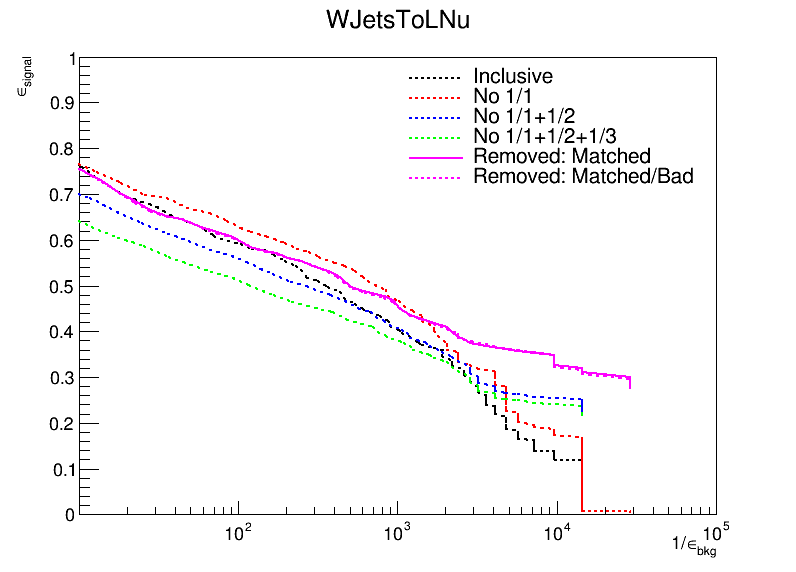

In [476]:
# Creates ROC curves for the signal efficiency of the m50ct1m signal sample against the ZeroBias samples
# using nCsc thresholds

c3 = rt.TCanvas('c3','c3', 800, 600)

h['roc_curve_noCluster'] = create_TGraph(rejection_power['WJetsToLNu']['noCluster']['csc_inclusive'], eff_ncsc['m55ct10m_wh_bbbb']['noCluster']['csc_inclusive'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])
h['roc_curve_clean_noCluster'] = create_TGraph(rejection_power['WJetsToLNu']['noCluster']['csc_noME11'], eff_ncsc['m55ct10m_wh_bbbb']['noCluster']['csc_noME11'], axis_title=['#epsilon_{bkg}', '#epsilon_{signal}'])
h['roc_curve_res_noCluster'] = create_TGraph(rejection_power['WJetsToLNu']['noCluster']['csc_noME1123'], eff_ncsc['m55ct10m_wh_bbbb']['noCluster']['csc_noME1123'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])
h['roc_curve_med_noCluster'] = create_TGraph(rejection_power['WJetsToLNu']['noCluster']['csc_noME112'], eff_ncsc['m55ct10m_wh_bbbb']['noCluster']['csc_noME112'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])
h['roc_curve_matching'] = create_TGraph(rejection_power['WJetsToLNu']['matching']['csc_inclusive'], eff_ncsc['m55ct10m_wh_bbbb']['matching']['csc_inclusive'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])
h['roc_curve_flag_matching'] = create_TGraph(rejection_power['WJetsToLNu']['flag_matching']['csc_inclusive'], eff_ncsc['m55ct10m_wh_bbbb']['flag_matching']['csc_inclusive'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])


c3.SetLogx()

h['roc_curve_noCluster'].SetTitle('WJetsToLNu')


h['roc_curve_noCluster'].SetLineWidth(2)
h['roc_curve_clean_noCluster'].SetLineWidth(2)
h['roc_curve_res_noCluster'].SetLineWidth(2)
h['roc_curve_med_noCluster'].SetLineWidth(2)
h['roc_curve_matching'].SetLineWidth(2)
h['roc_curve_flag_matching'].SetLineWidth(2)

h['roc_curve_noCluster'].SetLineColor(1)
h['roc_curve_noCluster'].SetLineStyle(2)

h['roc_curve_matching'].SetLineColor(6)
h['roc_curve_matching'].SetLineStyle(1)

h['roc_curve_flag_matching'].SetLineColor(6)
h['roc_curve_flag_matching'].SetLineStyle(2)

h['roc_curve_clean_noCluster'].SetLineColor(2)
h['roc_curve_clean_noCluster'].SetLineStyle(2)
                                          
h['roc_curve_res_noCluster'].SetLineColor(3)
h['roc_curve_res_noCluster'].SetLineStyle(2)

h['roc_curve_med_noCluster'].SetLineColor(4)
h['roc_curve_med_noCluster'].SetLineStyle(2)

h['roc_curve_noCluster'].GetXaxis().SetLimits(10, 10**5)
h['roc_curve_noCluster'].GetYaxis().SetRangeUser(0,1)

h['roc_curve_noCluster'].Draw()
h['roc_curve_clean_noCluster'].Draw('same')

h['roc_curve_res_noCluster'].Draw('same')
h['roc_curve_med_noCluster'].Draw('same')
h['roc_curve_matching'].Draw('same')
h['roc_curve_flag_matching'].Draw('same')

legend = rt.TLegend(0.70,0.70,0.7,0.7);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
legend.SetFillStyle(0);

legend.AddEntry( h['roc_curve_noCluster'], "Inclusive", 'l');
legend.AddEntry( h['roc_curve_clean_noCluster'], "No 1/1", 'l');
legend.AddEntry( h['roc_curve_med_noCluster'], "No 1/1+1/2", 'l');
legend.AddEntry( h['roc_curve_res_noCluster'], "No 1/1+1/2+1/3", 'l');
legend.AddEntry( h['roc_curve_matching'], "Removed: Matched", 'l');
legend.AddEntry( h['roc_curve_flag_matching'], "Removed: Matched/Bad", 'l');


legend.Draw();

c3.Draw()

In [319]:
# np.savez('k_means_results', ncsc_signal_inc = nCsc_cluster['m55ct10m_wh_bbbb']['csc_inclusive'], ncsc_bkg_inc = nCsc_cluster['WJetsToLNu']['csc_inclusive'], ncsc_signal_def = nCsc_cluster['m55ct10m_wh_bbbb']['csc_noME112'], ncsc_bkg_def = nCsc_cluster['WJetsToLNu']['csc_noME112'], bkg_rej_inc = rejection_power['WJetsToLNu']['noCluster']['csc_inclusive'], bkg_rej_def = rejection_power['WJetsToLNu']['noCluster']['csc_noME112'], signal_eff_inc = eff_ncsc['m55ct10m_wh_bbbb']['noCluster']['csc_inclusive'], signal_eff_def = eff_ncsc['m55ct10m_wh_bbbb']['noCluster']['csc_noME112'])

In [144]:
# Calculating Trigger Efficiency

# ncsc_thresh = ncsc_var_x[np.where(rejection_power['WJetsToLNu']['noCluster']['csc_inclusive'] > 10**4)]
ncsc_thresh = ncsc_var_x[np.where(rejection_power['WJetsToLNu']['noCluster']['csc_noME112'] > 10**4)]


signal_eff = eff_ncsc['m55ct10m_wh_bbbb']['noCluster']['csc_noME112'][np.where(rejection_power['WJetsToLNu']['noCluster']['csc_noME112'] > 7*10**4)]

print(rejection_power['WJetsToLNu']['noCluster']['csc_noME112'][np.where(rejection_power['WJetsToLNu']['noCluster']['csc_noME112'] > 7*10**4)])
print(signal_eff)

[   70686.58447489    77016.72636816    81906.67724868    87956.60227273
    97360.7672956    100521.83116883   106761.11724138   112995.34306569
   115525.08955224   126888.21311475   139462.72072072   146041.1509434
   156367.29292929   162951.17894737   168264.80434783   172004.02222222
   184290.02380952   195953.94936709   212059.75342466   224353.07246377
   234550.93939394   249683.25806452   271585.29824561   281461.12727273
   297699.26923077   315925.75510204   322507.54166667   329369.40425532
   360008.41860465   387009.05         396932.35897436   430010.05555556
   455304.76470588   499366.51612903   516012.06666667   533805.5862069
   552870.07142857   645015.08333333   737160.0952381    737160.0952381
   814755.89473684   814755.89473684   814755.89473684   814755.89473684
   814755.89473684   814755.89473684   814755.89473684   814755.89473684
   860020.11111111   910609.52941176   967522.625       1032024.13333333
  1032024.13333333  1105740.14285714  1105740.14285714

length of x and y are not equal!
length of x and y are not equal!
length of x and y are not equal!
length of x and y are not equal!
length of x and y are not equal!
length of x and y are not equal!
length of x and y are not equal!
length of x and y are not equal!


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4
Info in <TCanvas::Print>: pdf file ncsc_roc_cluster_comp.pdf has been created
Info in <TCanvas::SaveSource>: C++ Macro file: ncsc_roc_cluster_comp.C has been generated


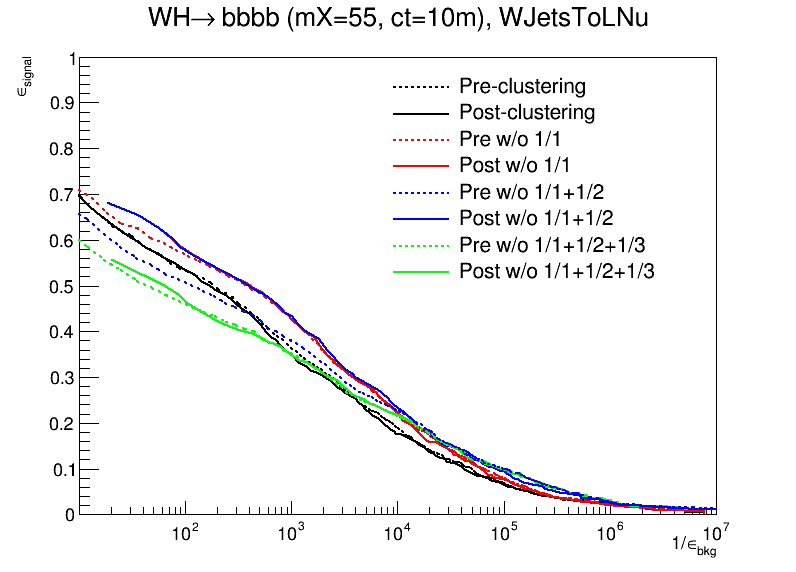

In [179]:
c4 = rt.TCanvas('c4','c4', 800, 600)

h['roc_curve_cluster'] = create_TGraph(rejection_power['WJetsToLNu']['cluster']['csc_inclusive'], eff_ncsc['m55ct10m_wh_bbbb']['cluster']['csc_inclusive'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])
h['roc_curve_noCluster'] = create_TGraph(rejection_power['WJetsToLNu']['noCluster']['csc_inclusive'], eff_ncsc['m55ct10m_wh_bbbb']['noCluster']['csc_inclusive'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])

h['roc_curve_clean_cluster'] = create_TGraph(rejection_power['WJetsToLNu']['cluster']['csc_noME11'], eff_ncsc['m55ct10m_wh_bbbb']['cluster']['csc_noME11'], axis_title=['#epsilon_{bkg}', '#epsilon_{signal}'])
h['roc_curve_clean_noCluster'] = create_TGraph(rejection_power['WJetsToLNu']['noCluster']['csc_noME11'], eff_ncsc['m55ct10m_wh_bbbb']['noCluster']['csc_noME11'], axis_title=['#epsilon_{bkg}', '#epsilon_{signal}'])

h['roc_curve_res_cluster'] = create_TGraph(rejection_power['WJetsToLNu']['cluster']['csc_noME1123'], eff_ncsc['m55ct10m_wh_bbbb']['cluster']['csc_noME1123'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])
h['roc_curve_res_noCluster'] = create_TGraph(rejection_power['WJetsToLNu']['noCluster']['csc_noME1123'], eff_ncsc['m55ct10m_wh_bbbb']['noCluster']['csc_noME1123'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])

h['roc_curve_med_cluster'] = create_TGraph(rejection_power['WJetsToLNu']['cluster']['csc_noME112'], eff_ncsc['m55ct10m_wh_bbbb']['cluster']['csc_noME112'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])
h['roc_curve_med_noCluster'] = create_TGraph(rejection_power['WJetsToLNu']['noCluster']['csc_noME112'], eff_ncsc['m55ct10m_wh_bbbb']['noCluster']['csc_noME112'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])

c4.SetLogx()
# c3.SetLogy()

h['roc_curve_noCluster'].SetTitle('WH#rightarrow bbbb (mX=55, ct=10m), WJetsToLNu')

h['roc_curve_cluster'].SetLineWidth(2)
h['roc_curve_noCluster'].SetLineWidth(2)

h['roc_curve_clean_cluster'].SetLineWidth(2)
h['roc_curve_clean_noCluster'].SetLineWidth(2)

h['roc_curve_res_cluster'].SetLineWidth(2)
h['roc_curve_res_noCluster'].SetLineWidth(2)

h['roc_curve_med_cluster'].SetLineWidth(2)
h['roc_curve_med_noCluster'].SetLineWidth(2)

h['roc_curve_cluster'].SetLineColor(1)
h['roc_curve_cluster'].SetLineStyle(1)
h['roc_curve_noCluster'].SetLineColor(1)
h['roc_curve_noCluster'].SetLineStyle(2)

h['roc_curve_clean_cluster'].SetLineColor(2)
h['roc_curve_clean_cluster'].SetLineStyle(1)
h['roc_curve_clean_noCluster'].SetLineColor(2)
h['roc_curve_clean_noCluster'].SetLineStyle(2)
                                          
h['roc_curve_res_cluster'].SetLineColor(3)
h['roc_curve_res_cluster'].SetLineStyle(1)
h['roc_curve_res_noCluster'].SetLineColor(3)
h['roc_curve_res_noCluster'].SetLineStyle(2)

h['roc_curve_med_cluster'].SetLineColor(4)
h['roc_curve_med_cluster'].SetLineStyle(1)
h['roc_curve_med_noCluster'].SetLineColor(4)
h['roc_curve_med_noCluster'].SetLineStyle(2)

h['roc_curve_noCluster'].GetXaxis().SetLimits(10, 10**7)
h['roc_curve_noCluster'].GetYaxis().SetRangeUser(0,1)



h['roc_curve_noCluster'].Draw()
h['roc_curve_cluster'].Draw('same')
h['roc_curve_clean_cluster'].Draw('same')
h['roc_curve_clean_noCluster'].Draw('same')
h['roc_curve_res_cluster'].Draw('same')
h['roc_curve_med_cluster'].Draw('same')

h['roc_curve_res_noCluster'].Draw('same')
h['roc_curve_med_noCluster'].Draw('same')

legend = rt.TLegend(0.48,0.50,0.87,0.87);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
legend.SetFillStyle(0);

legend.AddEntry( h['roc_curve_noCluster'], "Pre-clustering", 'l');
legend.AddEntry( h['roc_curve_cluster'], "Post-clustering", 'l');
legend.AddEntry( h['roc_curve_clean_noCluster'], "Pre w/o 1/1", 'l');
legend.AddEntry( h['roc_curve_clean_cluster'], "Post w/o 1/1", 'l');
legend.AddEntry( h['roc_curve_med_noCluster'], "Pre w/o 1/1+1/2", 'l');
legend.AddEntry( h['roc_curve_med_cluster'], "Post w/o 1/1+1/2", 'l');
legend.AddEntry( h['roc_curve_res_noCluster'], "Pre w/o 1/1+1/2+1/3", 'l');
legend.AddEntry( h['roc_curve_res_cluster'], "Post w/o 1/1+1/2+1/3", 'l');


legend.Draw();

c4.Draw()

c4.SaveAs("ncsc_roc_cluster_comp.pdf")
c4.SaveAs("ncsc_roc_cluster_comp.C")

length of x and y are not equal!
length of x and y are not equal!
length of x and y are not equal!


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_comp
Warning in <TLegend::Paint>: Legend to large to be automatically placed. A default position is used


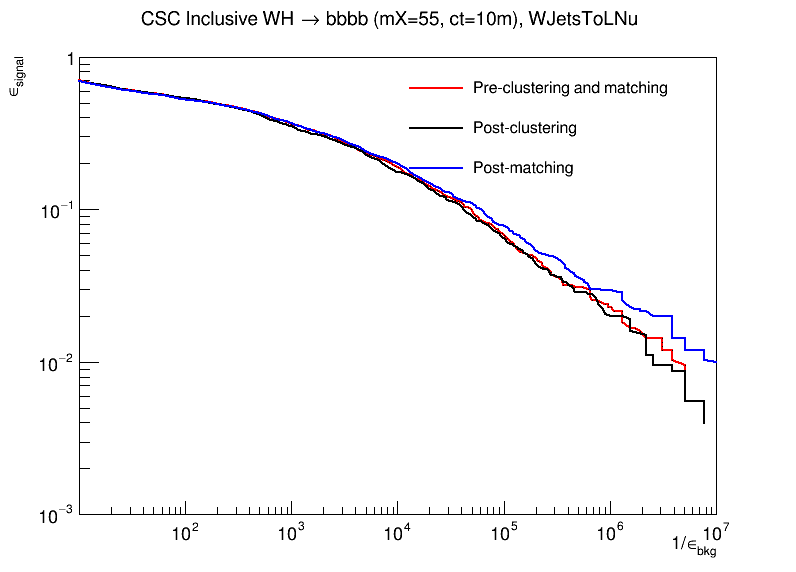

In [200]:
c_comp = rt.TCanvas('c_comp','c_comp', 800, 600)

h['roc_curve_cluster'] = create_TGraph(rejection_power['WJetsToLNu']['cluster']['csc_inclusive'], eff_ncsc['m55ct10m_wh_bbbb']['cluster']['csc_inclusive'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])
h['roc_curve_noCluster'] = create_TGraph(rejection_power['WJetsToLNu']['noCluster']['csc_inclusive'], eff_ncsc['m55ct10m_wh_bbbb']['noCluster']['csc_inclusive'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])
h['roc_curve_matching'] = create_TGraph(rejection_power['WJetsToLNu']['matching']['csc_inclusive'], eff_ncsc['m55ct10m_wh_bbbb']['matching']['csc_inclusive'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])

c_comp.SetLogx()
c_comp.SetLogy()

h['roc_curve_noCluster'].SetTitle('CSC Inclusive WH#rightarrow bbbb (mX=55, ct=10m), WJetsToLNu')

h['roc_curve_cluster'].SetLineWidth(2)
h['roc_curve_noCluster'].SetLineWidth(2)

h['roc_curve_matching'].SetLineWidth(2)

h['roc_curve_cluster'].SetLineColor(1)
h['roc_curve_noCluster'].SetLineColor(2)
h['roc_curve_matching'].SetLineColor(4)

h['roc_curve_noCluster'].GetXaxis().SetLimits(10, 10**7)
h['roc_curve_noCluster'].GetYaxis().SetRangeUser(0,1)

h['roc_curve_noCluster'].Draw()
h['roc_curve_cluster'].Draw('same')
h['roc_curve_matching'].Draw('same')

legend = rt.TLegend(0.8,0.8,0.8,0.8);
legend.SetTextSize(0.03);
legend.SetBorderSize(0);
legend.SetFillStyle(0);

legend.AddEntry( h['roc_curve_noCluster'], "Pre-clustering and matching", 'l');
legend.AddEntry( h['roc_curve_cluster'], "Post-clustering", 'l');
legend.AddEntry( h['roc_curve_matching'], "Post-matching", 'l');


legend.Draw();

c_comp.Draw()

# c_comp.SaveAs("ncsc_roc_cluster_comp.pdf")
# c_comp.SaveAs("ncsc_roc_cluster_comp.C")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c5
Warning in <TROOT::Append>: Replacing existing TH1: m55ct10m_wh_bbbb_noME112_cluster (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: nCsc_wjets_noME112_cluster (Potential memory leak).
Info in <TCanvas::Print>: pdf file ncsc_noME112_cluster_comp.pdf has been created
Info in <TCanvas::SaveSource>: C++ Macro file: ncsc_noME112_cluster_comp.C has been generated


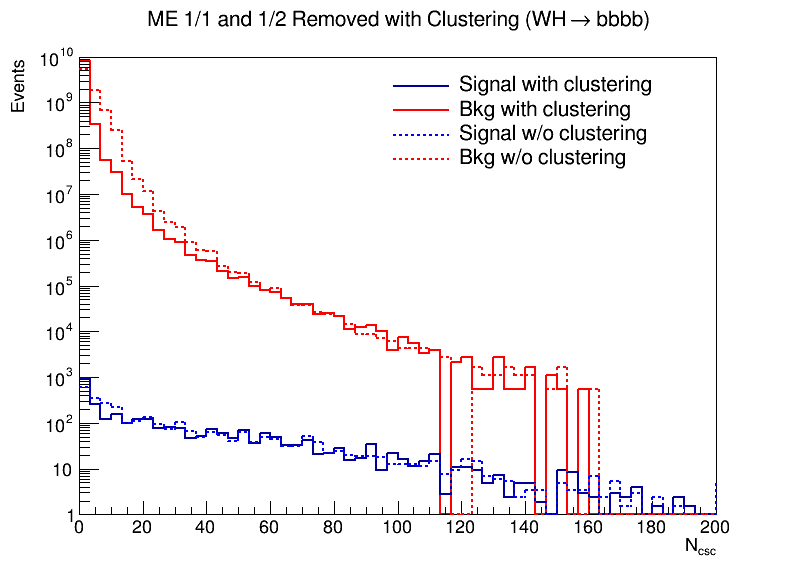

In [178]:
# Creates a 1D histogram of the number of CSC hits for the m50ct1m signal MC, QCD MC, and ZeroBias data
# after removing hits in ME 1/1

c5 = rt.TCanvas('c5','c5', 800, 600)

h['m55ct10m_wh_bbbb_noME112_cluster'] = create_TH1D(nCsc_cluster['m55ct10m_wh_bbbb']['csc_noME112'], axis_title=['m55ct10m_wh_bbbb_noME112_cluster', 'Events'], name='m55ct10m_wh_bbbb_noME112_cluster', binning=[150,0,500], weights = weight_m55ct10m)
h['m55ct10m_wh_bbbb_noME11_cluster'].SetLineColor(4)

h['nCsc_wjets_noME112_cluster'] = create_TH1D(nCsc_cluster['WJetsToLNu']['csc_noME112'], axis_title=['nCsc_wjets_noME112_cluster', 'Events'], name='nCsc_wjets_noME112_cluster', binning=[150,0,500], weights = weight_WJetsToLNu)
h['nCsc_wjets_noME112_cluster'].SetLineColor(2)
h['nCsc_wjets_noME112_cluster'].SetLineStyle(1)

# h['m55ct10m_wh_bbbb_noME112_nocluster'] = create_TH1D(nCsc_cluster['m55ct10m_wh_bbbb']['csc_noME112'], axis_title=['m55ct10m_wh_bbbb_noME112_cluster', 'Events'], name='m55ct10m_wh_bbbb_noME112_cluster', binning=[150,0,500], weights = weight_m55ct10m)
# h['m55ct10m_wh_bbbb_noME112_nocluster'].SetLineColor(4)
h['m55ct10m_wh_bbbb_noME112'].SetLineColor(4)
h['m55ct10m_wh_bbbb_noME112'].SetLineStyle(2)

h['nCsc_wjets_noME112'].SetLineColor(2)
h['nCsc_wjets_noME112'].SetLineStyle(2)

c5.SetLogy()

# h['m55ct10m_wh_bbbb_noME11_cluster'].Scale(1.0/h['m55ct10m_wh_bbbb_noME11_cluster'].Integral())
# h['nCsc_wjets_noME11_cluster'].Scale(1.0/h['nCsc_wjets_noME11_cluster'].Integral())
# h['nCsc_zeroBias_noME11'].Scale(1.0/h['nCsc_zeroBias_noME11'].Integral())


h['m55ct10m_wh_bbbb_noME112_cluster'].SetLineWidth(2)
h['nCsc_wjets_noME112_cluster'].SetLineWidth(2)
# h['nCsc_zeroBias_noME11'].SetLineWidth(2)

h['nCsc_wjets_noME112_cluster'].GetYaxis().SetRangeUser(1,10**10)
h['nCsc_wjets_noME112_cluster'].GetXaxis().SetRangeUser(0,200)
# h['nCsc_zeroBias_noME11'].GetXaxis().SetRangeUser(0,200)


h['nCsc_wjets_noME112_cluster'].SetStats(0)
h['nCsc_wjets_noME112_cluster'].SetTitle("ME 1/1 and 1/2 Removed with Clustering (WH #rightarrow bbbb)")
h['nCsc_wjets_noME112_cluster'].SetXTitle("N_{csc}")


h['nCsc_wjets_noME112_cluster'].Draw('histo')
h['m55ct10m_wh_bbbb_noME112_cluster'].Draw('histo+same')
h['m55ct10m_wh_bbbb_noME112'].Draw('histo+same')
h['nCsc_wjets_noME112'].Draw('histo+same')
# h['nCsc_zeroBias_noME11'].Draw('histo+same')

legend = rt.TLegend(0.48,0.70,0.87,0.87);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
#legend-.SetFillStyle(0);
legend.AddEntry( h['m55ct10m_wh_bbbb_noME112_cluster'], "Signal with clustering" , "L");
legend.AddEntry( h['nCsc_wjets_noME112_cluster'], "Bkg with clustering" , "L");
legend.AddEntry( h['m55ct10m_wh_bbbb_noME112'], "Signal w/o clustering" , "L");
legend.AddEntry( h['nCsc_wjets_noME112'], "Bkg w/o clustering" , "L");
# legend.AddEntry( h['nCsc_zeroBias_noME11'], "Zero Bias" , "L");

legend.Draw();

c5.Draw()

c5.SaveAs("ncsc_noME112_cluster_comp.pdf")
c5.SaveAs("ncsc_noME112_cluster_comp.C")

In [201]:
sel_cluster = {}
for data_type in data_trees.keys():
    sel_cluster[data_type] = np.array(n_c_total[data_type]['total'], dtype=bool)
sel_cluster['m55ct10m_wh_bbbb'] = np.array(n_c_total['m55ct10m_wh_bbbb']['total'], dtype=bool)
print(len(nCsc['m55ct10m_wh_bbbb']))
print(len(n_c_total['m55ct10m_wh_bbbb']['total']))
print(sel_cluster['m55ct10m_wh_bbbb'])
# print(sel_cluster['WJetsToLNu'].astype(int))
print(type(n_c_total['WJetsToLNu']['total']))
print(np.array(n_c_total['WJetsToLNu']['total'])[sel_cluster['WJetsToLNu']])

2478
2478
[ True  True False ...  True  True  True]
<class 'list'>
[4. 6. 4. ... 5. 4. 5.]


In [148]:
weight_m55ct10m_clusternonZero = (5.328 * 10**-1 * 0.324 * 137 * 1000)/len(n_c_total['m55ct10m_wh_bbbb']['total'][sel_cluster['m55ct10m_wh_bbbb']])
print(weight_m55ct10m_clusternonZero)
print(len(n_c_total['m55ct10m_wh_bbbb']['total'][sel_cluster['m55ct10m_wh_bbbb']]))
weight_m55ct10m_clusternonZero = np.full(len(n_c_total['m55ct10m_wh_bbbb']['total'][sel_cluster['m55ct10m_wh_bbbb']]), weight_m55ct10m_clusternonZero)

# weight_m55ct10m_plus_cluster = (5.328 * 10**-1 * 0.324 * 137 * 1000)/len(n_c_total['m55ct10m_wh_bbbb_plus']['total'])
# print(weight_m55ct10m_plus_cluster)
# print(len(n_c_total['m55ct10m_wh_bbbb_plus']['total']))
# weight_m55ct10m_plus_cluster = np.full(len(n_c_total['m55ct10m_wh_bbbb_plus']['total']), weight_m55ct10m_plus_cluster)

# weight_m55ct10m_cluster = np.concatenate([weight_m55ct10m_minus_cluster, weight_m55ct10m_plus_cluster])

# # weight_m15ct10m = (5.328 * 10**-1 * 0.324 * 137 * 1000)/NEvents['m15ct10000mm']
# # weight_m15ct10m = np.full(len(nCsc['m15ct10m_wh_bbbb']), weight_m15ct10m)

# # weight_m40ct10m = (61526.7 * 137 * 1000)/NEvents['m40ct10000mm']
# # weight_m40ct10m = np.full(len(nCsc['m40ct10m_wh_bbbb']), weight_m40ct10m)
# print(sel_cluster['m55ct10m_wh_bbbb'])
# print(len(n_c_total['WJetsToLNu']['total']))

weight_WJetsToLNu_clusternonZero = (5.328 * 10**-1 * 0.324 * 137 * 1000)/len(np.array(n_c_total['WJetsToLNu']['total'])[sel_cluster['WJetsToLNu']])
print(weight_WJetsToLNu_clusternonZero)
print(len(np.array(n_c_total['WJetsToLNu']['total'])[sel_cluster['WJetsToLNu']]))
weight_WJetsToLNu_clusternonZero = np.full(len(np.array(n_c_total['WJetsToLNu']['total'])[sel_cluster['WJetsToLNu']]), weight_WJetsToLNu_clusternonZero)

12.115740983606557
1952
0.005766968021148379
4100929


In [205]:
print(len(met_pt['m55ct10m_wh_bbbb'][sel_cluster['m55ct10m_wh_bbbb']]))

1952


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_met_cluster
Warning in <TROOT::Append>: Replacing existing TH1: MET_m55ct10m_wh_bbbb_cluster (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: MET_WJetsToLNu_cluster (Potential memory leak).


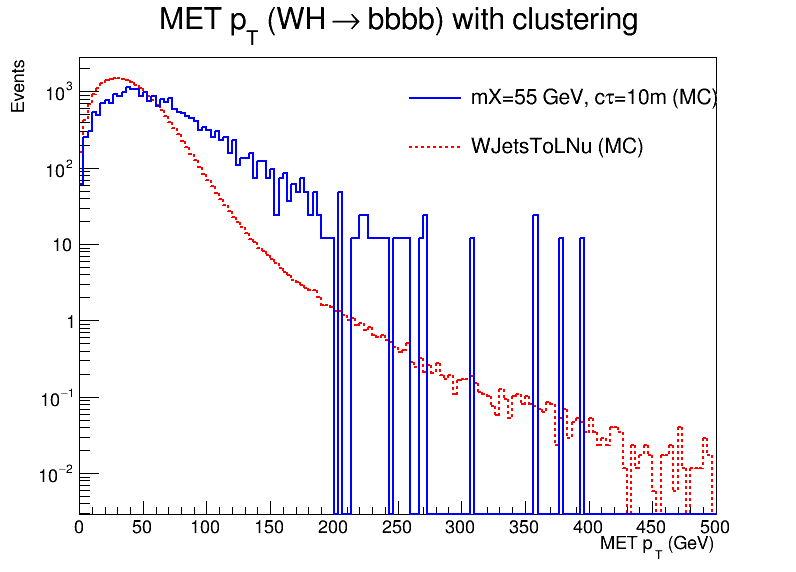

In [206]:
c_met_cluster = rt.TCanvas('c_met_cluster','c_met_cluster', 800, 600)

h['MET_m55ct10m_wh_bbbb_cluster'] = create_TH1D(met_pt['m55ct10m_wh_bbbb'][sel_cluster['m55ct10m_wh_bbbb']], axis_title=['MET_m55ct10m_wh_bbbb_cluster', 'Events'], name='MET_m55ct10m_wh_bbbb_cluster', binning=[150,0,500], weights=weight_m55ct10m_clusternonZero)
h['MET_m55ct10m_wh_bbbb_cluster'].SetLineColor(4)

h['MET_WJetsToLNu_cluster'] = create_TH1D(met_pt['WJetsToLNu'][:len(sel_cluster['WJetsToLNu'])][sel_cluster['WJetsToLNu']], axis_title=['MET_WJetsToLNu_cluster', 'Events'], name='MET_WJetsToLNu_cluster', binning=[150,0,500], weights = weight_WJetsToLNu_clusternonZero)
h['MET_WJetsToLNu_cluster'].SetLineColor(2)
h['MET_WJetsToLNu_cluster'].SetLineStyle(2)


# h['nCsc_zeroBias_noME11'] = create_TH1D(nCsc_removal['zeroBias']['ME_11'], axis_title=['nCsc_zeroBias_noME11', 'Events'], name='nCsc_zeroBias_noME11', binning=[150,0,500])
# h['nCsc_zeroBias_noME11'].SetLineColor(2)
# h['nCsc_zeroBias_noME11'].SetLineStyle(1)

c_met_cluster.SetLogy()

# h['MET_m55ct10m_wh_bbbb_cluster'].Scale(1.0/h['MET_m55ct10m_wh_bbbb_cluster'].Integral())
# h['MET_WJetsToLNu_cluster'].Scale(1.0/h['MET_WJetsToLNu_cluster'].Integral())
# h['nCsc_zeroBias_noME11'].Scale(1.0/h['nCsc_zeroBias_noME11'].Integral())


h['MET_m55ct10m_wh_bbbb_cluster'].SetLineWidth(2)
h['MET_WJetsToLNu_cluster'].SetLineWidth(2)
# h['nCsc_zeroBias_noME11'].SetLineWidth(2)

h['MET_WJetsToLNu_cluster'].GetXaxis().SetRangeUser(0,500)
# h['MET_WJetsToLNu_cluster'].GetYaxis().SetRangeUser(1,10**10)
# h['nCsc_zeroBias_noME11'].GetXaxis().SetRangeUser(0,200)


h['MET_WJetsToLNu_cluster'].SetStats(0)
h['MET_WJetsToLNu_cluster'].SetTitle("MET p_{T} (WH #rightarrow bbbb) with clustering")
h['MET_WJetsToLNu_cluster'].SetXTitle("MET p_{T} (GeV)")


h['MET_WJetsToLNu_cluster'].Draw('histo')
h['MET_m55ct10m_wh_bbbb_cluster'].Draw('histo+same')
# h['nCsc_zeroBias_noME11'].Draw('histo+same')

legend = rt.TLegend(0.50,0.70,0.87,0.87);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
#legend-.SetFillStyle(0);
legend.AddEntry( h['MET_m55ct10m_wh_bbbb_cluster'], "mX=55 GeV, c#tau=10m (MC)" , "L");
legend.AddEntry( h['MET_WJetsToLNu_cluster'], "WJetsToLNu (MC)" , "L");
# legend.AddEntry( h['nCsc_zeroBias_noME11'], "Zero Bias" , "L");

legend.Draw();

c_met_cluster.Draw()